In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('AZN.L.csv')
df.head()

Date     Open          High           Low    Close     Adj Close  \
0  2023-04-03  11260.0  11282.000000  11172.000000  11270.0  11024.715820   
1  2023-04-04  11320.0  11356.000000  11194.000000  11244.0  10999.281250   
2  2023-04-05  11244.0  11628.000000  11230.799805  11594.0  11341.664063   
3  2023-04-06  11620.0  11734.599609  11590.000000  11700.0  11445.357422   
4  2023-04-11  11738.0  11786.000000  11574.000000  11630.0  11376.879883   

    Volume  
0  1660237  
1  1885935  
2  2157931  
3  1203186  
4  4498431

In [3]:
#df=df.iloc[::-1].reset_index(drop=True)

In [4]:
df.head()

Date     Open          High           Low    Close     Adj Close  \
0  2023-04-03  11260.0  11282.000000  11172.000000  11270.0  11024.715820   
1  2023-04-04  11320.0  11356.000000  11194.000000  11244.0  10999.281250   
2  2023-04-05  11244.0  11628.000000  11230.799805  11594.0  11341.664063   
3  2023-04-06  11620.0  11734.599609  11590.000000  11700.0  11445.357422   
4  2023-04-11  11738.0  11786.000000  11574.000000  11630.0  11376.879883   

    Volume  
0  1660237  
1  1885935  
2  2157931  
3  1203186  
4  4498431

In [5]:
#df=df.drop(['Date '], axis=1)
# df=df.drop(['series '], axis=1)
# df=df.drop(['PREV. CLOSE '], axis=1)
# df=df.drop(['ltp '], axis=1)
# df=df.drop(['vwap '], axis=1)
# df=df.drop(['VALUE '], axis=1)
# df=df.drop(['No of trades '], axis=1)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

Open          High           Low    Close     Adj Close  \
Date                                                                     
2023-04-03  11260.0  11282.000000  11172.000000  11270.0  11024.715820   
2023-04-04  11320.0  11356.000000  11194.000000  11244.0  10999.281250   
2023-04-05  11244.0  11628.000000  11230.799805  11594.0  11341.664063   
2023-04-06  11620.0  11734.599609  11590.000000  11700.0  11445.357422   
2023-04-11  11738.0  11786.000000  11574.000000  11630.0  11376.879883   

             Volume  
Date                 
2023-04-03  1660237  
2023-04-04  1885935  
2023-04-05  2157931  
2023-04-06  1203186  
2023-04-11  4498431

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-03 to 2024-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [8]:
def convert(dat):
    d=dat.replace(",","")
    d=float(d)
    return d

In [9]:
def convert_int(dat):
    d=dat.replace(",","")
    d=int(d)
    return d

In [10]:
# df['OPEN '] = df['OPEN '].apply(convert)
# df['HIGH '] = df['HIGH '].apply(convert)
# df['LOW '] = df['LOW '].apply(convert)
# df['close '] = df['close '].apply(convert)
# df['52W H '] = df['52W H '].apply(convert)
# df['52W L '] = df['52W L '].apply(convert)
#df['VOLUME '] = df['VOLUME '].apply(convert_int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-03 to 2024-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [12]:
df.describe()

Open          High           Low         Close     Adj Close  \
count    251.000000    251.000000    251.000000    251.000000    251.000000   
mean   10813.685259  10912.225388  10706.588894  10807.171315  10632.132268   
std      623.339157    624.941479    629.002531    628.125005    582.156836   
min     9586.000000   9670.000000   9461.000000   9501.000000   9354.281250   
25%    10323.000000  10433.000000  10201.000000  10326.000000  10198.046387   
50%    10686.000000  10790.000000  10580.000000  10678.000000  10497.352539   
75%    11171.000000  11263.000000  11066.000000  11188.000000  10970.912597   
max    12164.000000  12392.000000  12122.066406  12294.000000  12026.428711   

             Volume  
count  2.510000e+02  
mean   2.259092e+06  
std    1.422614e+06  
min    4.559400e+05  
25%    1.362832e+06  
50%    1.800903e+06  
75%    2.625304e+06  
max    9.359776e+06

In [13]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
df['Next_Day_Close'] = df['Close'].shift(-1)

In [15]:
df.tail()

Open     High      Low    Close  Adj Close   Volume  \
Date                                                                 
2024-03-25  10434.0  10468.0  10352.0  10394.0    10394.0  1557853   
2024-03-26  10368.0  10440.0  10314.0  10440.0    10440.0  1745893   
2024-03-27  10460.0  10748.0  10454.0  10742.0    10742.0  2607662   
2024-03-28  10756.0  10780.0  10674.0  10678.0    10678.0  1759110   
2024-04-02  10810.0  10814.0  10562.0  10604.0    10604.0  1901480   

            Next_Day_Close  
Date                        
2024-03-25         10440.0  
2024-03-26         10742.0  
2024-03-27         10678.0  
2024-03-28         10604.0  
2024-04-02             NaN

In [16]:
df.shape

(251, 7)

In [17]:
#df.drop([df.shape[0]-1], axis=0, inplace=True)
df = df.drop(index="2023-11-28")

In [18]:
df.tail()

Open     High      Low    Close  Adj Close   Volume  \
Date                                                                 
2024-03-25  10434.0  10468.0  10352.0  10394.0    10394.0  1557853   
2024-03-26  10368.0  10440.0  10314.0  10440.0    10440.0  1745893   
2024-03-27  10460.0  10748.0  10454.0  10742.0    10742.0  2607662   
2024-03-28  10756.0  10780.0  10674.0  10678.0    10678.0  1759110   
2024-04-02  10810.0  10814.0  10562.0  10604.0    10604.0  1901480   

            Next_Day_Close  
Date                        
2024-03-25         10440.0  
2024-03-26         10742.0  
2024-03-27         10678.0  
2024-03-28         10604.0  
2024-04-02             NaN

In [19]:
train_data=df[0:int(len(df) * 0.8)]
test_data=df[int(len(df) * 0.8):]
train_ar = train_data['Next_Day_Close'].values
test_ar = test_data['Next_Day_Close'].values

In [20]:
X_train=train_data.drop(['Next_Day_Close'], axis=1)
X_test=test_data.drop(['Next_Day_Close'], axis=1)


In [21]:
X_train=np.expand_dims(X_train,axis=1)

In [22]:
X_test=np.expand_dims(X_test,axis=1)

In [23]:
y_train=train_data['Next_Day_Close']
y_test=test_data['Next_Day_Close']

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [25]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (1,X_train.shape[2],)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1,activation="linear"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             11400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,651
Trainable params: 31,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
filepath = 'model_azn.keras'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
ES = EarlyStopping(monitor='loss', patience=100)

In [29]:
history=model.fit(X_train, y_train, epochs=10000,validation_data=[X_test,y_test], callbacks = [checkpoint,ES])

Epoch 1/10000
1/7 [===>..........................] - ETA: 0s - loss: 119681424.0000 - mean_absolute_error: 10918.0293
Epoch 1: loss improved from inf to 119773736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 119773736.0000 - mean_absolute_error: 10926.6846 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/10000
1/7 [===>..........................] - ETA: 0s - loss: 119427896.0000 - mean_absolute_error: 10908.7725
Epoch 2: loss improved from 119773736.00000 to 119760520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 119760520.0000 - mean_absolute_error: 10926.0840 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: 117587456.0000 - mean_absolute_error: 10828.2617
Epoch 3: loss improved from 119760520.00000 to 119749640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss

1/7 [===>..........................] - ETA: 0s - loss: 118769296.0000 - mean_absolute_error: 10877.2969
Epoch 23: loss improved from 119568936.00000 to 119557448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 119557448.0000 - mean_absolute_error: 10916.7852 - val_loss: nan - val_mean_absolute_error: nan
Epoch 24/10000
1/7 [===>..........................] - ETA: 0s - loss: 119652288.0000 - mean_absolute_error: 10918.1445
Epoch 24: loss improved from 119557448.00000 to 119549920.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 119549920.0000 - mean_absolute_error: 10916.4404 - val_loss: nan - val_mean_absolute_error: nan
Epoch 25/10000
1/7 [===>..........................] - ETA: 0s - loss: 119919560.0000 - mean_absolute_error: 10932.4688
Epoch 25: loss improved from 119549920.00000 to 119542848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - los

1/7 [===>..........................] - ETA: 0s - loss: 119214688.0000 - mean_absolute_error: 10900.5605
Epoch 45: loss improved from 119391160.00000 to 119383264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 119383264.0000 - mean_absolute_error: 10908.8047 - val_loss: nan - val_mean_absolute_error: nan
Epoch 46/10000
1/7 [===>..........................] - ETA: 0s - loss: 123938888.0000 - mean_absolute_error: 11116.8047
Epoch 46: loss improved from 119383264.00000 to 119374440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 119374440.0000 - mean_absolute_error: 10908.3984 - val_loss: nan - val_mean_absolute_error: nan
Epoch 47/10000
1/7 [===>..........................] - ETA: 0s - loss: 114866528.0000 - mean_absolute_error: 10701.9297
Epoch 47: loss improved from 119374440.00000 to 119367680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 118438384.0000 - mean_absolute_error: 10868.8428
Epoch 67: loss improved from 119231184.00000 to 119223184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 119223184.0000 - mean_absolute_error: 10901.4648 - val_loss: nan - val_mean_absolute_error: nan
Epoch 68/10000
1/7 [===>..........................] - ETA: 0s - loss: 116543152.0000 - mean_absolute_error: 10782.0078
Epoch 68: loss improved from 119223184.00000 to 119216720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 119216720.0000 - mean_absolute_error: 10901.1680 - val_loss: nan - val_mean_absolute_error: nan
Epoch 69/10000
1/7 [===>..........................] - ETA: 0s - loss: 117824016.0000 - mean_absolute_error: 10833.6611
Epoch 69: loss improved from 119216720.00000 to 119211160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - lo

1/7 [===>..........................] - ETA: 0s - loss: 118347040.0000 - mean_absolute_error: 10865.1406
Epoch 89: loss improved from 119080368.00000 to 119073952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 119073952.0000 - mean_absolute_error: 10894.6211 - val_loss: nan - val_mean_absolute_error: nan
Epoch 90/10000
1/7 [===>..........................] - ETA: 0s - loss: 117722936.0000 - mean_absolute_error: 10833.4902
Epoch 90: loss improved from 119073952.00000 to 119067656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 119067656.0000 - mean_absolute_error: 10894.3301 - val_loss: nan - val_mean_absolute_error: nan
Epoch 91/10000
1/7 [===>..........................] - ETA: 0s - loss: 123771064.0000 - mean_absolute_error: 11104.8027
Epoch 91: loss improved from 119067656.00000 to 119061016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - lo

1/7 [===>..........................] - ETA: 0s - loss: 118542592.0000 - mean_absolute_error: 10873.3965
Epoch 111: loss improved from 118935488.00000 to 118929040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 118929040.0000 - mean_absolute_error: 10887.9658 - val_loss: nan - val_mean_absolute_error: nan
Epoch 112/10000
1/7 [===>..........................] - ETA: 0s - loss: 121947328.0000 - mean_absolute_error: 11024.9736
Epoch 112: loss improved from 118929040.00000 to 118922888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 118922888.0000 - mean_absolute_error: 10887.6836 - val_loss: nan - val_mean_absolute_error: nan
Epoch 113/10000
1/7 [===>..........................] - ETA: 0s - loss: 123293408.0000 - mean_absolute_error: 11084.4072
Epoch 113: loss improved from 118922888.00000 to 118916608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/ste

Epoch 133/10000
1/7 [===>..........................] - ETA: 0s - loss: 118242656.0000 - mean_absolute_error: 10853.3145
Epoch 133: loss improved from 118794288.00000 to 118787248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 118787248.0000 - mean_absolute_error: 10881.4541 - val_loss: nan - val_mean_absolute_error: nan
Epoch 134/10000
1/7 [===>..........................] - ETA: 0s - loss: 112650760.0000 - mean_absolute_error: 10596.2529
Epoch 134: loss improved from 118787248.00000 to 118781192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 118781192.0000 - mean_absolute_error: 10881.1748 - val_loss: nan - val_mean_absolute_error: nan
Epoch 135/10000
1/7 [===>..........................] - ETA: 0s - loss: 117191072.0000 - mean_absolute_error: 10810.9893
Epoch 135: loss improved from 118781192.00000 to 118774760.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 155/10000
1/7 [===>..........................] - ETA: 0s - loss: 119679608.0000 - mean_absolute_error: 10923.9736
Epoch 155: loss improved from 118654720.00000 to 118648160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 118648160.0000 - mean_absolute_error: 10875.0586 - val_loss: nan - val_mean_absolute_error: nan
Epoch 156/10000
1/7 [===>..........................] - ETA: 0s - loss: 119930192.0000 - mean_absolute_error: 10935.3818
Epoch 156: loss improved from 118648160.00000 to 118641528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 118641528.0000 - mean_absolute_error: 10874.7559 - val_loss: nan - val_mean_absolute_error: nan
Epoch 157/10000
1/7 [===>..........................] - ETA: 0s - loss: 120582008.0000 - mean_absolute_error: 10963.0703
Epoch 157: loss improved from 118641528.00000 to 118635088.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 177/10000
1/7 [===>..........................] - ETA: 0s - loss: 120434312.0000 - mean_absolute_error: 10956.5176
Epoch 177: loss improved from 118516696.00000 to 118510264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 118510264.0000 - mean_absolute_error: 10868.7158 - val_loss: nan - val_mean_absolute_error: nan
Epoch 178/10000
1/7 [===>..........................] - ETA: 0s - loss: 118943040.0000 - mean_absolute_error: 10881.9609
Epoch 178: loss improved from 118510264.00000 to 118505008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 118505008.0000 - mean_absolute_error: 10868.4736 - val_loss: nan - val_mean_absolute_error: nan
Epoch 179/10000
1/7 [===>..........................] - ETA: 0s - loss: 116792192.0000 - mean_absolute_error: 10790.3574
Epoch 179: loss improved from 118505008.00000 to 118498312.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 199/10000
1/7 [===>..........................] - ETA: 0s - loss: 118146432.0000 - mean_absolute_error: 10854.5049
Epoch 199: loss improved from 118380728.00000 to 118375192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 118375192.0000 - mean_absolute_error: 10862.5000 - val_loss: nan - val_mean_absolute_error: nan
Epoch 200/10000
1/7 [===>..........................] - ETA: 0s - loss: 115776656.0000 - mean_absolute_error: 10744.9180
Epoch 200: loss improved from 118375192.00000 to 118368256.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 118368256.0000 - mean_absolute_error: 10862.1826 - val_loss: nan - val_mean_absolute_error: nan
Epoch 201/10000
1/7 [===>..........................] - ETA: 0s - loss: 115878992.0000 - mean_absolute_error: 10754.2109
Epoch 201: loss improved from 118368256.00000 to 118362112.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 221/10000
1/7 [===>..........................] - ETA: 0s - loss: 117818312.0000 - mean_absolute_error: 10836.8203
Epoch 221: loss improved from 118245344.00000 to 118239208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 118239208.0000 - mean_absolute_error: 10856.2402 - val_loss: nan - val_mean_absolute_error: nan
Epoch 222/10000
1/7 [===>..........................] - ETA: 0s - loss: 118070176.0000 - mean_absolute_error: 10852.7520
Epoch 222: loss improved from 118239208.00000 to 118233408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 118233408.0000 - mean_absolute_error: 10855.9746 - val_loss: nan - val_mean_absolute_error: nan
Epoch 223/10000
1/7 [===>..........................] - ETA: 0s - loss: 112548080.0000 - mean_absolute_error: 10599.3164
Epoch 223: loss improved from 118233408.00000 to 118227304.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 243/10000
1/7 [===>..........................] - ETA: 0s - loss: 120848544.0000 - mean_absolute_error: 10978.4785
Epoch 243: loss improved from 118111184.00000 to 118105376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 118105376.0000 - mean_absolute_error: 10850.0742 - val_loss: nan - val_mean_absolute_error: nan
Epoch 244/10000
1/7 [===>..........................] - ETA: 0s - loss: 122933088.0000 - mean_absolute_error: 11070.9785
Epoch 244: loss improved from 118105376.00000 to 118099384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 118099384.0000 - mean_absolute_error: 10849.7988 - val_loss: nan - val_mean_absolute_error: nan
Epoch 245/10000
1/7 [===>..........................] - ETA: 0s - loss: 121174600.0000 - mean_absolute_error: 10985.5254
Epoch 245: loss improved from 118099384.00000 to 118093560.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 265/10000
1/7 [===>..........................] - ETA: 0s - loss: 119084656.0000 - mean_absolute_error: 10899.3496
Epoch 265: loss improved from 117977904.00000 to 117971600.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 117971600.0000 - mean_absolute_error: 10843.9092 - val_loss: nan - val_mean_absolute_error: nan
Epoch 266/10000
1/7 [===>..........................] - ETA: 0s - loss: 117393800.0000 - mean_absolute_error: 10820.4277
Epoch 266: loss improved from 117971600.00000 to 117965896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117965896.0000 - mean_absolute_error: 10843.6445 - val_loss: nan - val_mean_absolute_error: nan
Epoch 267/10000
1/7 [===>..........................] - ETA: 0s - loss: 118555864.0000 - mean_absolute_error: 10873.8789
Epoch 267: loss improved from 117965896.00000 to 117959392.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 287/10000
1/7 [===>..........................] - ETA: 0s - loss: 112738152.0000 - mean_absolute_error: 10602.2188
Epoch 287: loss improved from 117845368.00000 to 117838816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117838816.0000 - mean_absolute_error: 10837.7852 - val_loss: nan - val_mean_absolute_error: nan
Epoch 288/10000
1/7 [===>..........................] - ETA: 0s - loss: 118384464.0000 - mean_absolute_error: 10863.5225
Epoch 288: loss improved from 117838816.00000 to 117832640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 117832640.0000 - mean_absolute_error: 10837.4990 - val_loss: nan - val_mean_absolute_error: nan
Epoch 289/10000
1/7 [===>..........................] - ETA: 0s - loss: 119448344.0000 - mean_absolute_error: 10908.4043
Epoch 289: loss improved from 117832640.00000 to 117826808.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 309/10000
1/7 [===>..........................] - ETA: 0s - loss: 118019752.0000 - mean_absolute_error: 10844.0010
Epoch 309: loss improved from 117712688.00000 to 117706528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 117706528.0000 - mean_absolute_error: 10831.6797 - val_loss: nan - val_mean_absolute_error: nan
Epoch 310/10000
1/7 [===>..........................] - ETA: 0s - loss: 118628128.0000 - mean_absolute_error: 10875.7021
Epoch 310: loss improved from 117706528.00000 to 117700528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 117700528.0000 - mean_absolute_error: 10831.4014 - val_loss: nan - val_mean_absolute_error: nan
Epoch 311/10000
1/7 [===>..........................] - ETA: 0s - loss: 117050000.0000 - mean_absolute_error: 10803.0029
Epoch 311: loss improved from 117700528.00000 to 117694352.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 331/10000
1/7 [===>..........................] - ETA: 0s - loss: 119645744.0000 - mean_absolute_error: 10916.4229
Epoch 331: loss improved from 117580640.00000 to 117574584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117574584.0000 - mean_absolute_error: 10825.5879 - val_loss: nan - val_mean_absolute_error: nan
Epoch 332/10000
1/7 [===>..........................] - ETA: 0s - loss: 114717168.0000 - mean_absolute_error: 10695.1895
Epoch 332: loss improved from 117574584.00000 to 117568552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117568552.0000 - mean_absolute_error: 10825.3086 - val_loss: nan - val_mean_absolute_error: nan
Epoch 333/10000
1/7 [===>..........................] - ETA: 0s - loss: 116857960.0000 - mean_absolute_error: 10792.7832
Epoch 333: loss improved from 117568552.00000 to 117562400.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 353/10000
1/7 [===>..........................] - ETA: 0s - loss: 121699040.0000 - mean_absolute_error: 11012.8066
Epoch 353: loss improved from 117449056.00000 to 117443168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 117443168.0000 - mean_absolute_error: 10819.5146 - val_loss: nan - val_mean_absolute_error: nan
Epoch 354/10000
1/7 [===>..........................] - ETA: 0s - loss: 120882880.0000 - mean_absolute_error: 10973.5918
Epoch 354: loss improved from 117443168.00000 to 117437104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117437104.0000 - mean_absolute_error: 10819.2354 - val_loss: nan - val_mean_absolute_error: nan
Epoch 355/10000
1/7 [===>..........................] - ETA: 0s - loss: 118118984.0000 - mean_absolute_error: 10849.4785
Epoch 355: loss improved from 117437104.00000 to 117431080.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 375/10000
1/7 [===>..........................] - ETA: 0s - loss: 116481424.0000 - mean_absolute_error: 10772.6328
Epoch 375: loss improved from 117318008.00000 to 117311600.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117311600.0000 - mean_absolute_error: 10813.4346 - val_loss: nan - val_mean_absolute_error: nan
Epoch 376/10000
1/7 [===>..........................] - ETA: 0s - loss: 114523104.0000 - mean_absolute_error: 10684.4902
Epoch 376: loss improved from 117311600.00000 to 117306032.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117306032.0000 - mean_absolute_error: 10813.1758 - val_loss: nan - val_mean_absolute_error: nan
Epoch 377/10000
1/7 [===>..........................] - ETA: 0s - loss: 114957392.0000 - mean_absolute_error: 10703.7090
Epoch 377: loss improved from 117306032.00000 to 117299752.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 397/10000
1/7 [===>..........................] - ETA: 0s - loss: 120353440.0000 - mean_absolute_error: 10955.8242
Epoch 397: loss improved from 117186632.00000 to 117180784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 117180784.0000 - mean_absolute_error: 10807.3838 - val_loss: nan - val_mean_absolute_error: nan
Epoch 398/10000
1/7 [===>..........................] - ETA: 0s - loss: 117417168.0000 - mean_absolute_error: 10811.6055
Epoch 398: loss improved from 117180784.00000 to 117174704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 8ms/step - loss: 117174704.0000 - mean_absolute_error: 10807.1035 - val_loss: nan - val_mean_absolute_error: nan
Epoch 399/10000
1/7 [===>..........................] - ETA: 0s - loss: 117687440.0000 - mean_absolute_error: 10831.2949
Epoch 399: loss improved from 117174704.00000 to 117168920.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 419/10000
1/7 [===>..........................] - ETA: 0s - loss: 116321624.0000 - mean_absolute_error: 10765.2129
Epoch 419: loss improved from 117056080.00000 to 117050144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 117050144.0000 - mean_absolute_error: 10801.3379 - val_loss: nan - val_mean_absolute_error: nan
Epoch 420/10000
1/7 [===>..........................] - ETA: 0s - loss: 120334512.0000 - mean_absolute_error: 10950.9199
Epoch 420: loss improved from 117050144.00000 to 117044432.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 117044432.0000 - mean_absolute_error: 10801.0742 - val_loss: nan - val_mean_absolute_error: nan
Epoch 421/10000
1/7 [===>..........................] - ETA: 0s - loss: 118832856.0000 - mean_absolute_error: 10884.7363
Epoch 421: loss improved from 117044432.00000 to 117038224.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 441/10000
1/7 [===>..........................] - ETA: 0s - loss: 119847992.0000 - mean_absolute_error: 10930.6211
Epoch 441: loss improved from 116925536.00000 to 116919760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116919760.0000 - mean_absolute_error: 10795.2998 - val_loss: nan - val_mean_absolute_error: nan
Epoch 442/10000
1/7 [===>..........................] - ETA: 0s - loss: 117385216.0000 - mean_absolute_error: 10814.0293
Epoch 442: loss improved from 116919760.00000 to 116913760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116913760.0000 - mean_absolute_error: 10795.0225 - val_loss: nan - val_mean_absolute_error: nan
Epoch 443/10000
1/7 [===>..........................] - ETA: 0s - loss: 116878640.0000 - mean_absolute_error: 10792.5850
Epoch 443: loss improved from 116913760.00000 to 116907768.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 463/10000
1/7 [===>..........................] - ETA: 0s - loss: 120196208.0000 - mean_absolute_error: 10944.5781
Epoch 463: loss improved from 116795248.00000 to 116789224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 116789224.0000 - mean_absolute_error: 10789.2529 - val_loss: nan - val_mean_absolute_error: nan
Epoch 464/10000
1/7 [===>..........................] - ETA: 0s - loss: 117089200.0000 - mean_absolute_error: 10803.0527
Epoch 464: loss improved from 116789224.00000 to 116783536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 116783536.0000 - mean_absolute_error: 10788.9902 - val_loss: nan - val_mean_absolute_error: nan
Epoch 465/10000
1/7 [===>..........................] - ETA: 0s - loss: 118416240.0000 - mean_absolute_error: 10864.7236
Epoch 465: loss improved from 116783536.00000 to 116777360.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 485/10000
1/7 [===>..........................] - ETA: 0s - loss: 119752024.0000 - mean_absolute_error: 10927.3086
Epoch 485: loss improved from 116665192.00000 to 116659264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 116659264.0000 - mean_absolute_error: 10783.2285 - val_loss: nan - val_mean_absolute_error: nan
Epoch 486/10000
1/7 [===>..........................] - ETA: 0s - loss: 116053320.0000 - mean_absolute_error: 10757.9004
Epoch 486: loss improved from 116659264.00000 to 116653424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116653424.0000 - mean_absolute_error: 10782.9570 - val_loss: nan - val_mean_absolute_error: nan
Epoch 487/10000
1/7 [===>..........................] - ETA: 0s - loss: 117003600.0000 - mean_absolute_error: 10799.7676
Epoch 487: loss improved from 116653424.00000 to 116647464.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 507/10000
1/7 [===>..........................] - ETA: 0s - loss: 116427400.0000 - mean_absolute_error: 10772.2803
Epoch 507: loss improved from 116535368.00000 to 116529456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 116529456.0000 - mean_absolute_error: 10777.2070 - val_loss: nan - val_mean_absolute_error: nan
Epoch 508/10000
1/7 [===>..........................] - ETA: 0s - loss: 116939968.0000 - mean_absolute_error: 10794.8955
Epoch 508: loss improved from 116529456.00000 to 116523568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116523568.0000 - mean_absolute_error: 10776.9346 - val_loss: nan - val_mean_absolute_error: nan
Epoch 509/10000
1/7 [===>..........................] - ETA: 0s - loss: 115151968.0000 - mean_absolute_error: 10718.9814
Epoch 509: loss improved from 116523568.00000 to 116517776.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 529/10000
1/7 [===>..........................] - ETA: 0s - loss: 117378992.0000 - mean_absolute_error: 10815.6992
Epoch 529: loss improved from 116405600.00000 to 116399800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 116399800.0000 - mean_absolute_error: 10771.1914 - val_loss: nan - val_mean_absolute_error: nan
Epoch 530/10000
1/7 [===>..........................] - ETA: 0s - loss: 118069408.0000 - mean_absolute_error: 10848.8896
Epoch 530: loss improved from 116399800.00000 to 116394016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 116394016.0000 - mean_absolute_error: 10770.9209 - val_loss: nan - val_mean_absolute_error: nan
Epoch 531/10000
1/7 [===>..........................] - ETA: 0s - loss: 117812152.0000 - mean_absolute_error: 10833.6523
Epoch 531: loss improved from 116394016.00000 to 116387960.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 551/10000
1/7 [===>..........................] - ETA: 0s - loss: 115037040.0000 - mean_absolute_error: 10708.2500
Epoch 551: loss improved from 116276192.00000 to 116270384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 116270384.0000 - mean_absolute_error: 10765.1816 - val_loss: nan - val_mean_absolute_error: nan
Epoch 552/10000
1/7 [===>..........................] - ETA: 0s - loss: 115585728.0000 - mean_absolute_error: 10737.4199
Epoch 552: loss improved from 116270384.00000 to 116264408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116264408.0000 - mean_absolute_error: 10764.9033 - val_loss: nan - val_mean_absolute_error: nan
Epoch 553/10000
1/7 [===>..........................] - ETA: 0s - loss: 112968448.0000 - mean_absolute_error: 10611.7754
Epoch 553: loss improved from 116264408.00000 to 116258624.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 573/10000
1/7 [===>..........................] - ETA: 0s - loss: 113181872.0000 - mean_absolute_error: 10621.4209
Epoch 573: loss improved from 116146688.00000 to 116140936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 116140936.0000 - mean_absolute_error: 10759.1680 - val_loss: nan - val_mean_absolute_error: nan
Epoch 574/10000
1/7 [===>..........................] - ETA: 0s - loss: 116174656.0000 - mean_absolute_error: 10756.1660
Epoch 574: loss improved from 116140936.00000 to 116135024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116135024.0000 - mean_absolute_error: 10758.8936 - val_loss: nan - val_mean_absolute_error: nan
Epoch 575/10000
1/7 [===>..........................] - ETA: 0s - loss: 114895768.0000 - mean_absolute_error: 10698.4951
Epoch 575: loss improved from 116135024.00000 to 116129176.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 595/10000
1/7 [===>..........................] - ETA: 0s - loss: 116524608.0000 - mean_absolute_error: 10778.1631
Epoch 595: loss improved from 116017416.00000 to 116011512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 116011512.0000 - mean_absolute_error: 10753.1514 - val_loss: nan - val_mean_absolute_error: nan
Epoch 596/10000
1/7 [===>..........................] - ETA: 0s - loss: 112733520.0000 - mean_absolute_error: 10602.6309
Epoch 596: loss improved from 116011512.00000 to 116005656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 116005656.0000 - mean_absolute_error: 10752.8799 - val_loss: nan - val_mean_absolute_error: nan
Epoch 597/10000
1/7 [===>..........................] - ETA: 0s - loss: 109756936.0000 - mean_absolute_error: 10465.7383
Epoch 597: loss improved from 116005656.00000 to 115999744.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 617/10000
1/7 [===>..........................] - ETA: 0s - loss: 117005568.0000 - mean_absolute_error: 10802.7676
Epoch 617: loss improved from 115888152.00000 to 115882288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 115882288.0000 - mean_absolute_error: 10747.1416 - val_loss: nan - val_mean_absolute_error: nan
Epoch 618/10000
1/7 [===>..........................] - ETA: 0s - loss: 118533824.0000 - mean_absolute_error: 10870.5879
Epoch 618: loss improved from 115882288.00000 to 115876400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 115876400.0000 - mean_absolute_error: 10746.8672 - val_loss: nan - val_mean_absolute_error: nan
Epoch 619/10000
1/7 [===>..........................] - ETA: 0s - loss: 114844960.0000 - mean_absolute_error: 10698.0479
Epoch 619: loss improved from 115876400.00000 to 115870512.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 639/10000
1/7 [===>..........................] - ETA: 0s - loss: 116138224.0000 - mean_absolute_error: 10757.9492
Epoch 639: loss improved from 115758944.00000 to 115753024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115753024.0000 - mean_absolute_error: 10741.1250 - val_loss: nan - val_mean_absolute_error: nan
Epoch 640/10000
1/7 [===>..........................] - ETA: 0s - loss: 116559584.0000 - mean_absolute_error: 10779.6758
Epoch 640: loss improved from 115753024.00000 to 115747224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 115747224.0000 - mean_absolute_error: 10740.8564 - val_loss: nan - val_mean_absolute_error: nan
Epoch 641/10000
1/7 [===>..........................] - ETA: 0s - loss: 115974000.0000 - mean_absolute_error: 10754.8457
Epoch 641: loss improved from 115747224.00000 to 115741504.00000, saving model to model_azn.keras
7/7 [==============================

Epoch 661/10000
1/7 [===>..........................] - ETA: 0s - loss: 116240392.0000 - mean_absolute_error: 10762.9453
Epoch 661: loss improved from 115629816.00000 to 115624040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 115624040.0000 - mean_absolute_error: 10735.1201 - val_loss: nan - val_mean_absolute_error: nan
Epoch 662/10000
1/7 [===>..........................] - ETA: 0s - loss: 112619248.0000 - mean_absolute_error: 10596.6045
Epoch 662: loss improved from 115624040.00000 to 115618112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 115618112.0000 - mean_absolute_error: 10734.8438 - val_loss: nan - val_mean_absolute_error: nan
Epoch 663/10000
1/7 [===>..........................] - ETA: 0s - loss: 114547800.0000 - mean_absolute_error: 10683.1445
Epoch 663: loss improved from 115618112.00000 to 115612208.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 683/10000
1/7 [===>..........................] - ETA: 0s - loss: 117298480.0000 - mean_absolute_error: 10811.0088
Epoch 683: loss improved from 115501048.00000 to 115495320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115495320.0000 - mean_absolute_error: 10729.1221 - val_loss: nan - val_mean_absolute_error: nan
Epoch 684/10000
1/7 [===>..........................] - ETA: 0s - loss: 112652880.0000 - mean_absolute_error: 10598.1055
Epoch 684: loss improved from 115495320.00000 to 115489256.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 115489256.0000 - mean_absolute_error: 10728.8408 - val_loss: nan - val_mean_absolute_error: nan
Epoch 685/10000
1/7 [===>..........................] - ETA: 0s - loss: 112066384.0000 - mean_absolute_error: 10567.9531
Epoch 685: loss improved from 115489256.00000 to 115483504.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 705/10000
1/7 [===>..........................] - ETA: 0s - loss: 116180960.0000 - mean_absolute_error: 10760.0039
Epoch 705: loss improved from 115372176.00000 to 115366392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115366392.0000 - mean_absolute_error: 10723.1133 - val_loss: nan - val_mean_absolute_error: nan
Epoch 706/10000
1/7 [===>..........................] - ETA: 0s - loss: 116053248.0000 - mean_absolute_error: 10757.8447
Epoch 706: loss improved from 115366392.00000 to 115360400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115360400.0000 - mean_absolute_error: 10722.8320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 707/10000
1/7 [===>..........................] - ETA: 0s - loss: 115256464.0000 - mean_absolute_error: 10719.6406
Epoch 707: loss improved from 115360400.00000 to 115354624.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 727/10000
1/7 [===>..........................] - ETA: 0s - loss: 117518504.0000 - mean_absolute_error: 10819.4277
Epoch 727: loss improved from 115243456.00000 to 115237624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115237624.0000 - mean_absolute_error: 10717.1064 - val_loss: nan - val_mean_absolute_error: nan
Epoch 728/10000
1/7 [===>..........................] - ETA: 0s - loss: 116004416.0000 - mean_absolute_error: 10754.3613
Epoch 728: loss improved from 115237624.00000 to 115231768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115231768.0000 - mean_absolute_error: 10716.8340 - val_loss: nan - val_mean_absolute_error: nan
Epoch 729/10000
1/7 [===>..........................] - ETA: 0s - loss: 116309416.0000 - mean_absolute_error: 10768.0752
Epoch 729: loss improved from 115231768.00000 to 115225904.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 749/10000
1/7 [===>..........................] - ETA: 0s - loss: 115652040.0000 - mean_absolute_error: 10737.6074
Epoch 749: loss improved from 115114760.00000 to 115108896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 115108896.0000 - mean_absolute_error: 10711.0986 - val_loss: nan - val_mean_absolute_error: nan
Epoch 750/10000
1/7 [===>..........................] - ETA: 0s - loss: 116239944.0000 - mean_absolute_error: 10757.4668
Epoch 750: loss improved from 115108896.00000 to 115103240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 115103240.0000 - mean_absolute_error: 10710.8350 - val_loss: nan - val_mean_absolute_error: nan
Epoch 751/10000
1/7 [===>..........................] - ETA: 0s - loss: 115404696.0000 - mean_absolute_error: 10725.4414
Epoch 751: loss improved from 115103240.00000 to 115097296.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 771/10000
1/7 [===>..........................] - ETA: 0s - loss: 120590448.0000 - mean_absolute_error: 10960.4902
Epoch 771: loss improved from 114986312.00000 to 114980528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114980528.0000 - mean_absolute_error: 10705.1055 - val_loss: nan - val_mean_absolute_error: nan
Epoch 772/10000
1/7 [===>..........................] - ETA: 0s - loss: 114939528.0000 - mean_absolute_error: 10698.0283
Epoch 772: loss improved from 114980528.00000 to 114974728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114974728.0000 - mean_absolute_error: 10704.8340 - val_loss: nan - val_mean_absolute_error: nan
Epoch 773/10000
1/7 [===>..........................] - ETA: 0s - loss: 112592608.0000 - mean_absolute_error: 10595.2568
Epoch 773: loss improved from 114974728.00000 to 114968864.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 793/10000
1/7 [===>..........................] - ETA: 0s - loss: 112872424.0000 - mean_absolute_error: 10603.1152
Epoch 793: loss improved from 114857952.00000 to 114852136.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114852136.0000 - mean_absolute_error: 10699.1074 - val_loss: nan - val_mean_absolute_error: nan
Epoch 794/10000
1/7 [===>..........................] - ETA: 0s - loss: 117679968.0000 - mean_absolute_error: 10827.1523
Epoch 794: loss improved from 114852136.00000 to 114846272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114846272.0000 - mean_absolute_error: 10698.8320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 795/10000
1/7 [===>..........................] - ETA: 0s - loss: 117960760.0000 - mean_absolute_error: 10842.0098
Epoch 795: loss improved from 114846272.00000 to 114840400.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 815/10000
1/7 [===>..........................] - ETA: 0s - loss: 115871488.0000 - mean_absolute_error: 10746.2373
Epoch 815: loss improved from 114729432.00000 to 114723608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114723608.0000 - mean_absolute_error: 10693.0986 - val_loss: nan - val_mean_absolute_error: nan
Epoch 816/10000
1/7 [===>..........................] - ETA: 0s - loss: 116334152.0000 - mean_absolute_error: 10768.2764
Epoch 816: loss improved from 114723608.00000 to 114717760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114717760.0000 - mean_absolute_error: 10692.8262 - val_loss: nan - val_mean_absolute_error: nan
Epoch 817/10000
1/7 [===>..........................] - ETA: 0s - loss: 116719872.0000 - mean_absolute_error: 10787.8809
Epoch 817: loss improved from 114717760.00000 to 114711904.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 837/10000
1/7 [===>..........................] - ETA: 0s - loss: 115675896.0000 - mean_absolute_error: 10738.3555
Epoch 837: loss improved from 114601072.00000 to 114595248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114595248.0000 - mean_absolute_error: 10687.0947 - val_loss: nan - val_mean_absolute_error: nan
Epoch 838/10000
1/7 [===>..........................] - ETA: 0s - loss: 114299744.0000 - mean_absolute_error: 10673.7754
Epoch 838: loss improved from 114595248.00000 to 114589432.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114589432.0000 - mean_absolute_error: 10686.8223 - val_loss: nan - val_mean_absolute_error: nan
Epoch 839/10000
1/7 [===>..........................] - ETA: 0s - loss: 115386080.0000 - mean_absolute_error: 10719.9355
Epoch 839: loss improved from 114589432.00000 to 114583624.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 859/10000
1/7 [===>..........................] - ETA: 0s - loss: 114524320.0000 - mean_absolute_error: 10686.7930
Epoch 859: loss improved from 114472824.00000 to 114467000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114467000.0000 - mean_absolute_error: 10681.0928 - val_loss: nan - val_mean_absolute_error: nan
Epoch 860/10000
1/7 [===>..........................] - ETA: 0s - loss: 114020216.0000 - mean_absolute_error: 10663.1465
Epoch 860: loss improved from 114467000.00000 to 114461216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114461216.0000 - mean_absolute_error: 10680.8242 - val_loss: nan - val_mean_absolute_error: nan
Epoch 861/10000
1/7 [===>..........................] - ETA: 0s - loss: 116136576.0000 - mean_absolute_error: 10760.0625
Epoch 861: loss improved from 114461216.00000 to 114455520.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 881/10000
1/7 [===>..........................] - ETA: 0s - loss: 119899376.0000 - mean_absolute_error: 10929.7305
Epoch 881: loss improved from 114344744.00000 to 114338912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114338912.0000 - mean_absolute_error: 10675.0947 - val_loss: nan - val_mean_absolute_error: nan
Epoch 882/10000
1/7 [===>..........................] - ETA: 0s - loss: 116026376.0000 - mean_absolute_error: 10754.8984
Epoch 882: loss improved from 114338912.00000 to 114333080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114333080.0000 - mean_absolute_error: 10674.8213 - val_loss: nan - val_mean_absolute_error: nan
Epoch 883/10000
1/7 [===>..........................] - ETA: 0s - loss: 110818688.0000 - mean_absolute_error: 10513.3164
Epoch 883: loss improved from 114333080.00000 to 114327304.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 903/10000
1/7 [===>..........................] - ETA: 0s - loss: 114256072.0000 - mean_absolute_error: 10676.2354
Epoch 903: loss improved from 114216776.00000 to 114210936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114210936.0000 - mean_absolute_error: 10669.0996 - val_loss: nan - val_mean_absolute_error: nan
Epoch 904/10000
1/7 [===>..........................] - ETA: 0s - loss: 113649632.0000 - mean_absolute_error: 10645.5957
Epoch 904: loss improved from 114210936.00000 to 114205120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 114205120.0000 - mean_absolute_error: 10668.8262 - val_loss: nan - val_mean_absolute_error: nan
Epoch 905/10000
1/7 [===>..........................] - ETA: 0s - loss: 111711376.0000 - mean_absolute_error: 10555.3809
Epoch 905: loss improved from 114205120.00000 to 114199288.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 925/10000
1/7 [===>..........................] - ETA: 0s - loss: 114885560.0000 - mean_absolute_error: 10702.3672
Epoch 925: loss improved from 114088840.00000 to 114083024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114083024.0000 - mean_absolute_error: 10663.1035 - val_loss: nan - val_mean_absolute_error: nan
Epoch 926/10000
1/7 [===>..........................] - ETA: 0s - loss: 114519984.0000 - mean_absolute_error: 10682.5908
Epoch 926: loss improved from 114083024.00000 to 114077208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 114077208.0000 - mean_absolute_error: 10662.8301 - val_loss: nan - val_mean_absolute_error: nan
Epoch 927/10000
1/7 [===>..........................] - ETA: 0s - loss: 117280536.0000 - mean_absolute_error: 10811.7539
Epoch 927: loss improved from 114077208.00000 to 114071360.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 947/10000
1/7 [===>..........................] - ETA: 0s - loss: 115575304.0000 - mean_absolute_error: 10734.7441
Epoch 947: loss improved from 113960984.00000 to 113955144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 113955144.0000 - mean_absolute_error: 10657.1055 - val_loss: nan - val_mean_absolute_error: nan
Epoch 948/10000
1/7 [===>..........................] - ETA: 0s - loss: 113466288.0000 - mean_absolute_error: 10631.0322
Epoch 948: loss improved from 113955144.00000 to 113949328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113949328.0000 - mean_absolute_error: 10656.8320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 949/10000
1/7 [===>..........................] - ETA: 0s - loss: 112245328.0000 - mean_absolute_error: 10581.5107
Epoch 949: loss improved from 113949328.00000 to 113943520.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 969/10000
1/7 [===>..........................] - ETA: 0s - loss: 113878992.0000 - mean_absolute_error: 10652.7510
Epoch 969: loss improved from 113833184.00000 to 113827400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 113827400.0000 - mean_absolute_error: 10651.1113 - val_loss: nan - val_mean_absolute_error: nan
Epoch 970/10000
1/7 [===>..........................] - ETA: 0s - loss: 113268640.0000 - mean_absolute_error: 10626.2871
Epoch 970: loss improved from 113827400.00000 to 113821560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 113821560.0000 - mean_absolute_error: 10650.8379 - val_loss: nan - val_mean_absolute_error: nan
Epoch 971/10000
1/7 [===>..........................] - ETA: 0s - loss: 115864304.0000 - mean_absolute_error: 10747.3906
Epoch 971: loss improved from 113821560.00000 to 113815800.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 991/10000
1/7 [===>..........................] - ETA: 0s - loss: 113324944.0000 - mean_absolute_error: 10626.3184
Epoch 991: loss improved from 113705568.00000 to 113699744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113699744.0000 - mean_absolute_error: 10645.1172 - val_loss: nan - val_mean_absolute_error: nan
Epoch 992/10000
1/7 [===>..........................] - ETA: 0s - loss: 116208504.0000 - mean_absolute_error: 10757.6680
Epoch 992: loss improved from 113699744.00000 to 113693976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113693976.0000 - mean_absolute_error: 10644.8447 - val_loss: nan - val_mean_absolute_error: nan
Epoch 993/10000
1/7 [===>..........................] - ETA: 0s - loss: 113229584.0000 - mean_absolute_error: 10623.7129
Epoch 993: loss improved from 113693976.00000 to 113688136.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 1013/10000
1/7 [===>..........................] - ETA: 0s - loss: 112937304.0000 - mean_absolute_error: 10611.5625
Epoch 1013: loss improved from 113577768.00000 to 113571984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 113571984.0000 - mean_absolute_error: 10639.1123 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1014/10000
1/7 [===>..........................] - ETA: 0s - loss: 112427880.0000 - mean_absolute_error: 10591.1641
Epoch 1014: loss improved from 113571984.00000 to 113566160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113566160.0000 - mean_absolute_error: 10638.8398 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1015/10000
1/7 [===>..........................] - ETA: 0s - loss: 116729576.0000 - mean_absolute_error: 10785.3301
Epoch 1015: loss improved from 113566160.00000 to 113560416.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1035/10000
1/7 [===>..........................] - ETA: 0s - loss: 117737232.0000 - mean_absolute_error: 10834.5000
Epoch 1035: loss improved from 113450120.00000 to 113444344.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 113444344.0000 - mean_absolute_error: 10633.1123 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1036/10000
1/7 [===>..........................] - ETA: 0s - loss: 115060864.0000 - mean_absolute_error: 10709.2266
Epoch 1036: loss improved from 113444344.00000 to 113438488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 113438488.0000 - mean_absolute_error: 10632.8379 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1037/10000
1/7 [===>..........................] - ETA: 0s - loss: 119213856.0000 - mean_absolute_error: 10900.0850
Epoch 1037: loss improved from 113438488.00000 to 113432736.00000, saving model to model_azn.keras
7/7 [========================

Epoch 1057/10000
1/7 [===>..........................] - ETA: 0s - loss: 114978480.0000 - mean_absolute_error: 10705.0645
Epoch 1057: loss improved from 113322616.00000 to 113316872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113316872.0000 - mean_absolute_error: 10627.1172 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1058/10000
1/7 [===>..........................] - ETA: 0s - loss: 114811384.0000 - mean_absolute_error: 10698.5459
Epoch 1058: loss improved from 113316872.00000 to 113311056.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 113311056.0000 - mean_absolute_error: 10626.8438 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1059/10000
1/7 [===>..........................] - ETA: 0s - loss: 115919024.0000 - mean_absolute_error: 10748.8301
Epoch 1059: loss improved from 113311056.00000 to 113305248.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1079/10000
1/7 [===>..........................] - ETA: 0s - loss: 112344168.0000 - mean_absolute_error: 10582.5127
Epoch 1079: loss improved from 113195312.00000 to 113189488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113189488.0000 - mean_absolute_error: 10621.1221 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1080/10000
1/7 [===>..........................] - ETA: 0s - loss: 112049504.0000 - mean_absolute_error: 10566.3027
Epoch 1080: loss improved from 113189488.00000 to 113183720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 113183720.0000 - mean_absolute_error: 10620.8516 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1081/10000
1/7 [===>..........................] - ETA: 0s - loss: 115872976.0000 - mean_absolute_error: 10744.4043
Epoch 1081: loss improved from 113183720.00000 to 113177936.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1101/10000
1/7 [===>..........................] - ETA: 0s - loss: 112528880.0000 - mean_absolute_error: 10592.3262
Epoch 1101: loss improved from 113067928.00000 to 113062120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 113062120.0000 - mean_absolute_error: 10615.1250 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1102/10000
1/7 [===>..........................] - ETA: 0s - loss: 112471016.0000 - mean_absolute_error: 10586.7393
Epoch 1102: loss improved from 113062120.00000 to 113056328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 113056328.0000 - mean_absolute_error: 10614.8525 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1103/10000
1/7 [===>..........................] - ETA: 0s - loss: 114987040.0000 - mean_absolute_error: 10707.1533
Epoch 1103: loss improved from 113056328.00000 to 113050560.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1123/10000
1/7 [===>..........................] - ETA: 0s - loss: 115823096.0000 - mean_absolute_error: 10740.7627
Epoch 1123: loss improved from 112940592.00000 to 112934792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 112934792.0000 - mean_absolute_error: 10609.1250 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1124/10000
1/7 [===>..........................] - ETA: 0s - loss: 115780496.0000 - mean_absolute_error: 10738.6221
Epoch 1124: loss improved from 112934792.00000 to 112929032.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112929032.0000 - mean_absolute_error: 10608.8525 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1125/10000
1/7 [===>..........................] - ETA: 0s - loss: 110266512.0000 - mean_absolute_error: 10478.6562
Epoch 1125: loss improved from 112929032.00000 to 112923240.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1145/10000
1/7 [===>..........................] - ETA: 0s - loss: 112845496.0000 - mean_absolute_error: 10602.8271
Epoch 1145: loss improved from 112813336.00000 to 112807528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112807528.0000 - mean_absolute_error: 10603.1260 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1146/10000
1/7 [===>..........................] - ETA: 0s - loss: 109886872.0000 - mean_absolute_error: 10466.3643
Epoch 1146: loss improved from 112807528.00000 to 112801752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112801752.0000 - mean_absolute_error: 10602.8525 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1147/10000
1/7 [===>..........................] - ETA: 0s - loss: 112356648.0000 - mean_absolute_error: 10583.2793
Epoch 1147: loss improved from 112801752.00000 to 112795968.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1167/10000
1/7 [===>..........................] - ETA: 0s - loss: 118826912.0000 - mean_absolute_error: 10885.3945
Epoch 1167: loss improved from 112686176.00000 to 112680408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112680408.0000 - mean_absolute_error: 10597.1289 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1168/10000
1/7 [===>..........................] - ETA: 0s - loss: 114592136.0000 - mean_absolute_error: 10686.1182
Epoch 1168: loss improved from 112680408.00000 to 112674624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 112674624.0000 - mean_absolute_error: 10596.8564 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1169/10000
1/7 [===>..........................] - ETA: 0s - loss: 110387768.0000 - mean_absolute_error: 10491.7832
Epoch 1169: loss improved from 112674624.00000 to 112668848.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1189/10000
1/7 [===>..........................] - ETA: 0s - loss: 114608360.0000 - mean_absolute_error: 10687.3965
Epoch 1189: loss improved from 112559144.00000 to 112553392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112553392.0000 - mean_absolute_error: 10591.1348 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1190/10000
1/7 [===>..........................] - ETA: 0s - loss: 113641936.0000 - mean_absolute_error: 10634.9375
Epoch 1190: loss improved from 112553392.00000 to 112547608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 112547608.0000 - mean_absolute_error: 10590.8623 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1191/10000
1/7 [===>..........................] - ETA: 0s - loss: 116383904.0000 - mean_absolute_error: 10767.9160
Epoch 1191: loss improved from 112547608.00000 to 112541880.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1211/10000
1/7 [===>..........................] - ETA: 0s - loss: 112361016.0000 - mean_absolute_error: 10582.5859
Epoch 1211: loss improved from 112432128.00000 to 112426320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112426320.0000 - mean_absolute_error: 10585.1338 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1212/10000
1/7 [===>..........................] - ETA: 0s - loss: 113817696.0000 - mean_absolute_error: 10650.8145
Epoch 1212: loss improved from 112426320.00000 to 112420584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 112420584.0000 - mean_absolute_error: 10584.8652 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1213/10000
1/7 [===>..........................] - ETA: 0s - loss: 114474496.0000 - mean_absolute_error: 10681.9766
Epoch 1213: loss improved from 112420584.00000 to 112414824.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1233/10000
1/7 [===>..........................] - ETA: 0s - loss: 109342816.0000 - mean_absolute_error: 10439.1494
Epoch 1233: loss improved from 112305216.00000 to 112299408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112299408.0000 - mean_absolute_error: 10579.1377 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1234/10000
1/7 [===>..........................] - ETA: 0s - loss: 111808816.0000 - mean_absolute_error: 10557.3770
Epoch 1234: loss improved from 112299408.00000 to 112293632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 112293632.0000 - mean_absolute_error: 10578.8662 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1235/10000
1/7 [===>..........................] - ETA: 0s - loss: 112041016.0000 - mean_absolute_error: 10563.9180
Epoch 1235: loss improved from 112293632.00000 to 112287880.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1255/10000
1/7 [===>..........................] - ETA: 0s - loss: 112616480.0000 - mean_absolute_error: 10594.4648
Epoch 1255: loss improved from 112178280.00000 to 112172520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112172520.0000 - mean_absolute_error: 10573.1387 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1256/10000
1/7 [===>..........................] - ETA: 0s - loss: 111337672.0000 - mean_absolute_error: 10533.4434
Epoch 1256: loss improved from 112172520.00000 to 112166760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 112166760.0000 - mean_absolute_error: 10572.8662 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1257/10000
1/7 [===>..........................] - ETA: 0s - loss: 113361008.0000 - mean_absolute_error: 10627.3564
Epoch 1257: loss improved from 112166760.00000 to 112160992.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1277/10000
1/7 [===>..........................] - ETA: 0s - loss: 113812128.0000 - mean_absolute_error: 10651.8398
Epoch 1277: loss improved from 112051464.00000 to 112045648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 112045648.0000 - mean_absolute_error: 10567.1387 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1278/10000
1/7 [===>..........................] - ETA: 0s - loss: 116069648.0000 - mean_absolute_error: 10756.0654
Epoch 1278: loss improved from 112045648.00000 to 112039904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 112039904.0000 - mean_absolute_error: 10566.8652 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1279/10000
1/7 [===>..........................] - ETA: 0s - loss: 114351960.0000 - mean_absolute_error: 10676.6680
Epoch 1279: loss improved from 112039904.00000 to 112034128.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1299/10000
1/7 [===>..........................] - ETA: 0s - loss: 113095376.0000 - mean_absolute_error: 10617.4053
Epoch 1299: loss improved from 111924744.00000 to 111918960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111918960.0000 - mean_absolute_error: 10561.1416 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1300/10000
1/7 [===>..........................] - ETA: 0s - loss: 112347120.0000 - mean_absolute_error: 10583.6943
Epoch 1300: loss improved from 111918960.00000 to 111913192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111913192.0000 - mean_absolute_error: 10560.8691 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1301/10000
1/7 [===>..........................] - ETA: 0s - loss: 111725984.0000 - mean_absolute_error: 10545.6094
Epoch 1301: loss improved from 111913192.00000 to 111907472.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1321/10000
1/7 [===>..........................] - ETA: 0s - loss: 112360464.0000 - mean_absolute_error: 10584.5977
Epoch 1321: loss improved from 111798120.00000 to 111792448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111792448.0000 - mean_absolute_error: 10555.1504 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1322/10000
1/7 [===>..........................] - ETA: 0s - loss: 107578784.0000 - mean_absolute_error: 10354.2637
Epoch 1322: loss improved from 111792448.00000 to 111786640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111786640.0000 - mean_absolute_error: 10554.8760 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1323/10000
1/7 [===>..........................] - ETA: 0s - loss: 105910416.0000 - mean_absolute_error: 10282.9297
Epoch 1323: loss improved from 111786640.00000 to 111780904.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1343/10000
1/7 [===>..........................] - ETA: 0s - loss: 107223472.0000 - mean_absolute_error: 10339.7910
Epoch 1343: loss improved from 111671648.00000 to 111665896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111665896.0000 - mean_absolute_error: 10549.1553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1344/10000
1/7 [===>..........................] - ETA: 0s - loss: 113266592.0000 - mean_absolute_error: 10632.7109
Epoch 1344: loss improved from 111665896.00000 to 111660168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111660168.0000 - mean_absolute_error: 10548.8828 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1345/10000
1/7 [===>..........................] - ETA: 0s - loss: 111719568.0000 - mean_absolute_error: 10547.1211
Epoch 1345: loss improved from 111660168.00000 to 111654376.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1365/10000
1/7 [===>..........................] - ETA: 0s - loss: 109927296.0000 - mean_absolute_error: 10468.4229
Epoch 1365: loss improved from 111545120.00000 to 111539392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 8ms/step - loss: 111539392.0000 - mean_absolute_error: 10543.1562 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1366/10000
1/7 [===>..........................] - ETA: 0s - loss: 114811752.0000 - mean_absolute_error: 10697.4580
Epoch 1366: loss improved from 111539392.00000 to 111533616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111533616.0000 - mean_absolute_error: 10542.8828 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1367/10000
1/7 [===>..........................] - ETA: 0s - loss: 109817128.0000 - mean_absolute_error: 10470.4980
Epoch 1367: loss improved from 111533616.00000 to 111527856.00000, saving model to model_azn.keras
7/7 [========================

Epoch 1387/10000
1/7 [===>..........................] - ETA: 0s - loss: 110491296.0000 - mean_absolute_error: 10494.2334
Epoch 1387: loss improved from 111418688.00000 to 111412896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111412896.0000 - mean_absolute_error: 10537.1553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1388/10000
1/7 [===>..........................] - ETA: 0s - loss: 112342880.0000 - mean_absolute_error: 10583.0820
Epoch 1388: loss improved from 111412896.00000 to 111407152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 111407152.0000 - mean_absolute_error: 10536.8828 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1389/10000
1/7 [===>..........................] - ETA: 0s - loss: 113563392.0000 - mean_absolute_error: 10635.4355
Epoch 1389: loss improved from 111407152.00000 to 111401408.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1409/10000
1/7 [===>..........................] - ETA: 0s - loss: 109269080.0000 - mean_absolute_error: 10435.1094
Epoch 1409: loss improved from 111292304.00000 to 111286536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111286536.0000 - mean_absolute_error: 10531.1592 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1410/10000
1/7 [===>..........................] - ETA: 0s - loss: 112954600.0000 - mean_absolute_error: 10610.5244
Epoch 1410: loss improved from 111286536.00000 to 111280824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111280824.0000 - mean_absolute_error: 10530.8867 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1411/10000
1/7 [===>..........................] - ETA: 0s - loss: 114256784.0000 - mean_absolute_error: 10668.8145
Epoch 1411: loss improved from 111280824.00000 to 111275080.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1431/10000
1/7 [===>..........................] - ETA: 0s - loss: 110182000.0000 - mean_absolute_error: 10482.9902
Epoch 1431: loss improved from 111166064.00000 to 111160320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111160320.0000 - mean_absolute_error: 10525.1650 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1432/10000
1/7 [===>..........................] - ETA: 0s - loss: 110477496.0000 - mean_absolute_error: 10493.2168
Epoch 1432: loss improved from 111160320.00000 to 111154584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111154584.0000 - mean_absolute_error: 10524.8916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1433/10000
1/7 [===>..........................] - ETA: 0s - loss: 113759024.0000 - mean_absolute_error: 10645.5723
Epoch 1433: loss improved from 111154584.00000 to 111148864.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1453/10000
1/7 [===>..........................] - ETA: 0s - loss: 110546368.0000 - mean_absolute_error: 10494.4941
Epoch 1453: loss improved from 111039888.00000 to 111034176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 111034176.0000 - mean_absolute_error: 10519.1689 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1454/10000
1/7 [===>..........................] - ETA: 0s - loss: 108516104.0000 - mean_absolute_error: 10400.5977
Epoch 1454: loss improved from 111034176.00000 to 111028440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 111028440.0000 - mean_absolute_error: 10518.8975 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1455/10000
1/7 [===>..........................] - ETA: 0s - loss: 111313688.0000 - mean_absolute_error: 10532.2656
Epoch 1455: loss improved from 111028440.00000 to 111022744.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1475/10000
1/7 [===>..........................] - ETA: 0s - loss: 110958504.0000 - mean_absolute_error: 10517.9414
Epoch 1475: loss improved from 110913904.00000 to 110908184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110908184.0000 - mean_absolute_error: 10513.1787 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1476/10000
1/7 [===>..........................] - ETA: 0s - loss: 112029152.0000 - mean_absolute_error: 10570.1680
Epoch 1476: loss improved from 110908184.00000 to 110902496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110902496.0000 - mean_absolute_error: 10512.9092 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1477/10000
1/7 [===>..........................] - ETA: 0s - loss: 112440672.0000 - mean_absolute_error: 10581.5215
Epoch 1477: loss improved from 110902496.00000 to 110896720.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1497/10000
1/7 [===>..........................] - ETA: 0s - loss: 112129792.0000 - mean_absolute_error: 10570.3203
Epoch 1497: loss improved from 110787888.00000 to 110782160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110782160.0000 - mean_absolute_error: 10507.1826 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1498/10000
1/7 [===>..........................] - ETA: 0s - loss: 110020832.0000 - mean_absolute_error: 10471.6094
Epoch 1498: loss improved from 110782160.00000 to 110776416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110776416.0000 - mean_absolute_error: 10506.9092 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1499/10000
1/7 [===>..........................] - ETA: 0s - loss: 109507664.0000 - mean_absolute_error: 10446.1504
Epoch 1499: loss improved from 110776416.00000 to 110770680.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1519/10000
1/7 [===>..........................] - ETA: 0s - loss: 110758576.0000 - mean_absolute_error: 10508.2012
Epoch 1519: loss improved from 110661936.00000 to 110656192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 110656192.0000 - mean_absolute_error: 10501.1885 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1520/10000
1/7 [===>..........................] - ETA: 0s - loss: 112747656.0000 - mean_absolute_error: 10595.0537
Epoch 1520: loss improved from 110656192.00000 to 110650464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110650464.0000 - mean_absolute_error: 10500.9150 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1521/10000
1/7 [===>..........................] - ETA: 0s - loss: 111365488.0000 - mean_absolute_error: 10538.3418
Epoch 1521: loss improved from 110650464.00000 to 110644744.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1541/10000
1/7 [===>..........................] - ETA: 0s - loss: 111109344.0000 - mean_absolute_error: 10521.9531
Epoch 1541: loss improved from 110535976.00000 to 110530240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110530240.0000 - mean_absolute_error: 10495.1904 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1542/10000
1/7 [===>..........................] - ETA: 0s - loss: 109815728.0000 - mean_absolute_error: 10463.4297
Epoch 1542: loss improved from 110530240.00000 to 110524528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110524528.0000 - mean_absolute_error: 10494.9160 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1543/10000
1/7 [===>..........................] - ETA: 0s - loss: 107422416.0000 - mean_absolute_error: 10345.1582
Epoch 1543: loss improved from 110524528.00000 to 110518808.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1563/10000
1/7 [===>..........................] - ETA: 0s - loss: 109130936.0000 - mean_absolute_error: 10427.6445
Epoch 1563: loss improved from 110410176.00000 to 110404456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110404456.0000 - mean_absolute_error: 10489.1953 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1564/10000
1/7 [===>..........................] - ETA: 0s - loss: 110633696.0000 - mean_absolute_error: 10501.3105
Epoch 1564: loss improved from 110404456.00000 to 110398728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110398728.0000 - mean_absolute_error: 10488.9229 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1565/10000
1/7 [===>..........................] - ETA: 0s - loss: 110890480.0000 - mean_absolute_error: 10512.4121
Epoch 1565: loss improved from 110398728.00000 to 110393040.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1585/10000
1/7 [===>..........................] - ETA: 0s - loss: 109972704.0000 - mean_absolute_error: 10468.4053
Epoch 1585: loss improved from 110284480.00000 to 110278792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 110278792.0000 - mean_absolute_error: 10483.2031 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1586/10000
1/7 [===>..........................] - ETA: 0s - loss: 112474512.0000 - mean_absolute_error: 10588.1934
Epoch 1586: loss improved from 110278792.00000 to 110273088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110273088.0000 - mean_absolute_error: 10482.9307 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1587/10000
1/7 [===>..........................] - ETA: 0s - loss: 110125136.0000 - mean_absolute_error: 10475.4824
Epoch 1587: loss improved from 110273088.00000 to 110267344.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1607/10000
1/7 [===>..........................] - ETA: 0s - loss: 107123192.0000 - mean_absolute_error: 10335.5332
Epoch 1607: loss improved from 110158816.00000 to 110153120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110153120.0000 - mean_absolute_error: 10477.2070 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1608/10000
1/7 [===>..........................] - ETA: 0s - loss: 109508224.0000 - mean_absolute_error: 10445.3223
Epoch 1608: loss improved from 110153120.00000 to 110147400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110147400.0000 - mean_absolute_error: 10476.9336 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1609/10000
1/7 [===>..........................] - ETA: 0s - loss: 108437888.0000 - mean_absolute_error: 10402.8613
Epoch 1609: loss improved from 110147400.00000 to 110141696.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1629/10000
1/7 [===>..........................] - ETA: 0s - loss: 110587624.0000 - mean_absolute_error: 10496.1016
Epoch 1629: loss improved from 110033248.00000 to 110027544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110027544.0000 - mean_absolute_error: 10471.2139 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1630/10000
1/7 [===>..........................] - ETA: 0s - loss: 109121328.0000 - mean_absolute_error: 10429.2656
Epoch 1630: loss improved from 110027544.00000 to 110021848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 110021848.0000 - mean_absolute_error: 10470.9414 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1631/10000
1/7 [===>..........................] - ETA: 0s - loss: 109620400.0000 - mean_absolute_error: 10452.4316
Epoch 1631: loss improved from 110021848.00000 to 110016152.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1651/10000
1/7 [===>..........................] - ETA: 0s - loss: 108993192.0000 - mean_absolute_error: 10427.2969
Epoch 1651: loss improved from 109907792.00000 to 109902088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 109902088.0000 - mean_absolute_error: 10465.2217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1652/10000
1/7 [===>..........................] - ETA: 0s - loss: 109352048.0000 - mean_absolute_error: 10437.2109
Epoch 1652: loss improved from 109902088.00000 to 109896384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 109896384.0000 - mean_absolute_error: 10464.9482 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1653/10000
1/7 [===>..........................] - ETA: 0s - loss: 108153824.0000 - mean_absolute_error: 10382.5000
Epoch 1653: loss improved from 109896384.00000 to 109890704.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1673/10000
1/7 [===>..........................] - ETA: 0s - loss: 108807776.0000 - mean_absolute_error: 10413.3594
Epoch 1673: loss improved from 109782232.00000 to 109776544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 109776544.0000 - mean_absolute_error: 10459.2217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1674/10000
1/7 [===>..........................] - ETA: 0s - loss: 105749896.0000 - mean_absolute_error: 10266.5869
Epoch 1674: loss improved from 109776544.00000 to 109770824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 109770824.0000 - mean_absolute_error: 10458.9473 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1675/10000
1/7 [===>..........................] - ETA: 0s - loss: 106647560.0000 - mean_absolute_error: 10310.6250
Epoch 1675: loss improved from 109770824.00000 to 109765128.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1695/10000
1/7 [===>..........................] - ETA: 0s - loss: 104795376.0000 - mean_absolute_error: 10230.6133
Epoch 1695: loss improved from 109656896.00000 to 109651176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 109651176.0000 - mean_absolute_error: 10453.2266 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1696/10000
1/7 [===>..........................] - ETA: 0s - loss: 109919656.0000 - mean_absolute_error: 10464.8428
Epoch 1696: loss improved from 109651176.00000 to 109645496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 109645496.0000 - mean_absolute_error: 10452.9541 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1697/10000
1/7 [===>..........................] - ETA: 0s - loss: 111526480.0000 - mean_absolute_error: 10543.1953
Epoch 1697: loss improved from 109645496.00000 to 109639816.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1717/10000
1/7 [===>..........................] - ETA: 0s - loss: 109884504.0000 - mean_absolute_error: 10468.8047
Epoch 1717: loss improved from 109531544.00000 to 109525840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 109525840.0000 - mean_absolute_error: 10447.2285 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1718/10000
1/7 [===>..........................] - ETA: 0s - loss: 110971280.0000 - mean_absolute_error: 10518.5938
Epoch 1718: loss improved from 109525840.00000 to 109520128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 109520128.0000 - mean_absolute_error: 10446.9561 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1719/10000
1/7 [===>..........................] - ETA: 0s - loss: 109311744.0000 - mean_absolute_error: 10438.3828
Epoch 1719: loss improved from 109520128.00000 to 109514432.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1739/10000
1/7 [===>..........................] - ETA: 0s - loss: 110635040.0000 - mean_absolute_error: 10498.0605
Epoch 1739: loss improved from 109406304.00000 to 109400624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 109400624.0000 - mean_absolute_error: 10441.2354 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1740/10000
1/7 [===>..........................] - ETA: 0s - loss: 108763792.0000 - mean_absolute_error: 10414.8496
Epoch 1740: loss improved from 109400624.00000 to 109394936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 109394936.0000 - mean_absolute_error: 10440.9629 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1741/10000
1/7 [===>..........................] - ETA: 0s - loss: 106372864.0000 - mean_absolute_error: 10297.7031
Epoch 1741: loss improved from 109394936.00000 to 109389248.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1761/10000
1/7 [===>..........................] - ETA: 0s - loss: 113996016.0000 - mean_absolute_error: 10659.5684
Epoch 1761: loss improved from 109281216.00000 to 109275528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 109275528.0000 - mean_absolute_error: 10435.2422 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1762/10000
1/7 [===>..........................] - ETA: 0s - loss: 109714720.0000 - mean_absolute_error: 10456.8574
Epoch 1762: loss improved from 109275528.00000 to 109269832.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 109269832.0000 - mean_absolute_error: 10434.9697 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1763/10000
1/7 [===>..........................] - ETA: 0s - loss: 104633792.0000 - mean_absolute_error: 10215.5215
Epoch 1763: loss improved from 109269832.00000 to 109264136.00000, saving model to model_azn.keras
7/7 [========================

Epoch 1783/10000
1/7 [===>..........................] - ETA: 0s - loss: 111858016.0000 - mean_absolute_error: 10557.0059
Epoch 1783: loss improved from 109156024.00000 to 109150328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 109150328.0000 - mean_absolute_error: 10429.2432 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1784/10000
1/7 [===>..........................] - ETA: 0s - loss: 108501808.0000 - mean_absolute_error: 10400.4199
Epoch 1784: loss improved from 109150328.00000 to 109144656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 109144656.0000 - mean_absolute_error: 10428.9697 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1785/10000
1/7 [===>..........................] - ETA: 0s - loss: 111529632.0000 - mean_absolute_error: 10542.2090
Epoch 1785: loss improved from 109144656.00000 to 109138952.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1805/10000
1/7 [===>..........................] - ETA: 0s - loss: 109487208.0000 - mean_absolute_error: 10444.1934
Epoch 1805: loss improved from 109030944.00000 to 109025240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 109025240.0000 - mean_absolute_error: 10423.2432 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1806/10000
1/7 [===>..........................] - ETA: 0s - loss: 107920776.0000 - mean_absolute_error: 10371.2324
Epoch 1806: loss improved from 109025240.00000 to 109019544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 109019544.0000 - mean_absolute_error: 10422.9707 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1807/10000
1/7 [===>..........................] - ETA: 0s - loss: 111860624.0000 - mean_absolute_error: 10556.7109
Epoch 1807: loss improved from 109019544.00000 to 109013872.00000, saving model to model_azn.keras
7/7 [========================

Epoch 1827/10000
1/7 [===>..........................] - ETA: 0s - loss: 113485408.0000 - mean_absolute_error: 10633.3848
Epoch 1827: loss improved from 108905944.00000 to 108900272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108900272.0000 - mean_absolute_error: 10417.2461 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1828/10000
1/7 [===>..........................] - ETA: 0s - loss: 107031424.0000 - mean_absolute_error: 10329.2373
Epoch 1828: loss improved from 108900272.00000 to 108894608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 108894608.0000 - mean_absolute_error: 10416.9746 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1829/10000
1/7 [===>..........................] - ETA: 0s - loss: 108420992.0000 - mean_absolute_error: 10396.7773
Epoch 1829: loss improved from 108894608.00000 to 108888928.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1849/10000
1/7 [===>..........................] - ETA: 0s - loss: 109680752.0000 - mean_absolute_error: 10455.8906
Epoch 1849: loss improved from 108781080.00000 to 108775424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108775424.0000 - mean_absolute_error: 10411.2529 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1850/10000
1/7 [===>..........................] - ETA: 0s - loss: 108249192.0000 - mean_absolute_error: 10385.9297
Epoch 1850: loss improved from 108775424.00000 to 108769752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 108769752.0000 - mean_absolute_error: 10410.9795 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1851/10000
1/7 [===>..........................] - ETA: 0s - loss: 109922864.0000 - mean_absolute_error: 10466.6582
Epoch 1851: loss improved from 108769752.00000 to 108764088.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1871/10000
1/7 [===>..........................] - ETA: 0s - loss: 103890448.0000 - mean_absolute_error: 10175.5840
Epoch 1871: loss improved from 108656320.00000 to 108650632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 108650632.0000 - mean_absolute_error: 10405.2588 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1872/10000
1/7 [===>..........................] - ETA: 0s - loss: 107318320.0000 - mean_absolute_error: 10342.6230
Epoch 1872: loss improved from 108650632.00000 to 108644976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108644976.0000 - mean_absolute_error: 10404.9863 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1873/10000
1/7 [===>..........................] - ETA: 0s - loss: 107423888.0000 - mean_absolute_error: 10342.6641
Epoch 1873: loss improved from 108644976.00000 to 108639304.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1893/10000
1/7 [===>..........................] - ETA: 0s - loss: 109869056.0000 - mean_absolute_error: 10460.6523
Epoch 1893: loss improved from 108531632.00000 to 108525976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108525976.0000 - mean_absolute_error: 10399.2656 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1894/10000
1/7 [===>..........................] - ETA: 0s - loss: 110863208.0000 - mean_absolute_error: 10507.5684
Epoch 1894: loss improved from 108525976.00000 to 108520288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108520288.0000 - mean_absolute_error: 10398.9932 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1895/10000
1/7 [===>..........................] - ETA: 0s - loss: 107809024.0000 - mean_absolute_error: 10365.5449
Epoch 1895: loss improved from 108520288.00000 to 108514624.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1915/10000
1/7 [===>..........................] - ETA: 0s - loss: 107516296.0000 - mean_absolute_error: 10351.7852
Epoch 1915: loss improved from 108407016.00000 to 108401336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108401336.0000 - mean_absolute_error: 10393.2715 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1916/10000
1/7 [===>..........................] - ETA: 0s - loss: 106964792.0000 - mean_absolute_error: 10328.3867
Epoch 1916: loss improved from 108401336.00000 to 108395680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 108395680.0000 - mean_absolute_error: 10392.9990 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1917/10000
1/7 [===>..........................] - ETA: 0s - loss: 109575736.0000 - mean_absolute_error: 10442.9258
Epoch 1917: loss improved from 108395680.00000 to 108390000.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1937/10000
1/7 [===>..........................] - ETA: 0s - loss: 105665000.0000 - mean_absolute_error: 10264.3516
Epoch 1937: loss improved from 108282416.00000 to 108276760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108276760.0000 - mean_absolute_error: 10387.2764 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1938/10000
1/7 [===>..........................] - ETA: 0s - loss: 110712512.0000 - mean_absolute_error: 10506.2051
Epoch 1938: loss improved from 108276760.00000 to 108271104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108271104.0000 - mean_absolute_error: 10387.0039 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1939/10000
1/7 [===>..........................] - ETA: 0s - loss: 113315192.0000 - mean_absolute_error: 10630.3066
Epoch 1939: loss improved from 108271104.00000 to 108265440.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1959/10000
1/7 [===>..........................] - ETA: 0s - loss: 111097056.0000 - mean_absolute_error: 10523.9805
Epoch 1959: loss improved from 108157848.00000 to 108152200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108152200.0000 - mean_absolute_error: 10381.2803 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1960/10000
1/7 [===>..........................] - ETA: 0s - loss: 110477112.0000 - mean_absolute_error: 10491.0195
Epoch 1960: loss improved from 108152200.00000 to 108146528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 108146528.0000 - mean_absolute_error: 10381.0059 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1961/10000
1/7 [===>..........................] - ETA: 0s - loss: 105371184.0000 - mean_absolute_error: 10250.9336
Epoch 1961: loss improved from 108146528.00000 to 108140864.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 1981/10000
1/7 [===>..........................] - ETA: 0s - loss: 107293776.0000 - mean_absolute_error: 10338.3008
Epoch 1981: loss improved from 108033536.00000 to 108027840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 108027840.0000 - mean_absolute_error: 10375.2871 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1982/10000
1/7 [===>..........................] - ETA: 0s - loss: 106282632.0000 - mean_absolute_error: 10295.2783
Epoch 1982: loss improved from 108027840.00000 to 108022176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 108022176.0000 - mean_absolute_error: 10375.0156 - val_loss: nan - val_mean_absolute_error: nan
Epoch 1983/10000
1/7 [===>..........................] - ETA: 0s - loss: 112469472.0000 - mean_absolute_error: 10589.1299
Epoch 1983: loss improved from 108022176.00000 to 108016528.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2003/10000
1/7 [===>..........................] - ETA: 0s - loss: 110978592.0000 - mean_absolute_error: 10517.9277
Epoch 2003: loss improved from 107909056.00000 to 107903440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107903440.0000 - mean_absolute_error: 10369.2910 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2004/10000
1/7 [===>..........................] - ETA: 0s - loss: 104284192.0000 - mean_absolute_error: 10196.4043
Epoch 2004: loss improved from 107903440.00000 to 107897744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107897744.0000 - mean_absolute_error: 10369.0166 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2005/10000
1/7 [===>..........................] - ETA: 0s - loss: 107659376.0000 - mean_absolute_error: 10358.7568
Epoch 2005: loss improved from 107897744.00000 to 107892088.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2025/10000
1/7 [===>..........................] - ETA: 0s - loss: 107739840.0000 - mean_absolute_error: 10355.4922
Epoch 2025: loss improved from 107784696.00000 to 107779064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107779064.0000 - mean_absolute_error: 10363.2920 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2026/10000
1/7 [===>..........................] - ETA: 0s - loss: 109161216.0000 - mean_absolute_error: 10428.3457
Epoch 2026: loss improved from 107779064.00000 to 107773416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 107773416.0000 - mean_absolute_error: 10363.0195 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2027/10000
1/7 [===>..........................] - ETA: 0s - loss: 109014384.0000 - mean_absolute_error: 10421.8223
Epoch 2027: loss improved from 107773416.00000 to 107767768.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2047/10000
1/7 [===>..........................] - ETA: 0s - loss: 107868632.0000 - mean_absolute_error: 10365.4355
Epoch 2047: loss improved from 107660472.00000 to 107654840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107654840.0000 - mean_absolute_error: 10357.2969 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2048/10000
1/7 [===>..........................] - ETA: 0s - loss: 109689120.0000 - mean_absolute_error: 10454.9746
Epoch 2048: loss improved from 107654840.00000 to 107649208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 107649208.0000 - mean_absolute_error: 10357.0254 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2049/10000
1/7 [===>..........................] - ETA: 0s - loss: 108631328.0000 - mean_absolute_error: 10404.9531
Epoch 2049: loss improved from 107649208.00000 to 107643568.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2069/10000
1/7 [===>..........................] - ETA: 0s - loss: 105706456.0000 - mean_absolute_error: 10267.2539
Epoch 2069: loss improved from 107536384.00000 to 107530744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107530744.0000 - mean_absolute_error: 10351.3037 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2070/10000
1/7 [===>..........................] - ETA: 0s - loss: 106037784.0000 - mean_absolute_error: 10281.2959
Epoch 2070: loss improved from 107530744.00000 to 107525112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 107525112.0000 - mean_absolute_error: 10351.0322 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2071/10000
1/7 [===>..........................] - ETA: 0s - loss: 107461960.0000 - mean_absolute_error: 10347.4609
Epoch 2071: loss improved from 107525112.00000 to 107519464.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2091/10000
1/7 [===>..........................] - ETA: 0s - loss: 103138928.0000 - mean_absolute_error: 10142.6328
Epoch 2091: loss improved from 107412264.00000 to 107406616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 107406616.0000 - mean_absolute_error: 10345.3076 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2092/10000
1/7 [===>..........................] - ETA: 0s - loss: 106539592.0000 - mean_absolute_error: 10303.6094
Epoch 2092: loss improved from 107406616.00000 to 107400992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107400992.0000 - mean_absolute_error: 10345.0342 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2093/10000
1/7 [===>..........................] - ETA: 0s - loss: 104854960.0000 - mean_absolute_error: 10227.2129
Epoch 2093: loss improved from 107400992.00000 to 107395328.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2113/10000
1/7 [===>..........................] - ETA: 0s - loss: 109192784.0000 - mean_absolute_error: 10431.6348
Epoch 2113: loss improved from 107288168.00000 to 107282552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107282552.0000 - mean_absolute_error: 10339.3086 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2114/10000
1/7 [===>..........................] - ETA: 0s - loss: 107743464.0000 - mean_absolute_error: 10362.1738
Epoch 2114: loss improved from 107282552.00000 to 107276920.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 107276920.0000 - mean_absolute_error: 10339.0361 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2115/10000
1/7 [===>..........................] - ETA: 0s - loss: 108842992.0000 - mean_absolute_error: 10409.7148
Epoch 2115: loss improved from 107276920.00000 to 107271280.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2135/10000
1/7 [===>..........................] - ETA: 0s - loss: 107471008.0000 - mean_absolute_error: 10349.3887
Epoch 2135: loss improved from 107164240.00000 to 107158608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 107158608.0000 - mean_absolute_error: 10333.3135 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2136/10000
1/7 [===>..........................] - ETA: 0s - loss: 105981032.0000 - mean_absolute_error: 10275.8037
Epoch 2136: loss improved from 107158608.00000 to 107152976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 107152976.0000 - mean_absolute_error: 10333.0410 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2137/10000
1/7 [===>..........................] - ETA: 0s - loss: 108070648.0000 - mean_absolute_error: 10376.8438
Epoch 2137: loss improved from 107152976.00000 to 107147360.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2157/10000
1/7 [===>..........................] - ETA: 0s - loss: 106595616.0000 - mean_absolute_error: 10305.2031
Epoch 2157: loss improved from 107040352.00000 to 107034688.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 107034688.0000 - mean_absolute_error: 10327.3154 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2158/10000
1/7 [===>..........................] - ETA: 0s - loss: 107242720.0000 - mean_absolute_error: 10340.1816
Epoch 2158: loss improved from 107034688.00000 to 107029064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 107029064.0000 - mean_absolute_error: 10327.0430 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2159/10000
1/7 [===>..........................] - ETA: 0s - loss: 106579856.0000 - mean_absolute_error: 10304.4707
Epoch 2159: loss improved from 107029064.00000 to 107023432.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2179/10000
1/7 [===>..........................] - ETA: 0s - loss: 103325088.0000 - mean_absolute_error: 10152.0850
Epoch 2179: loss improved from 106916560.00000 to 106910944.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106910944.0000 - mean_absolute_error: 10321.3223 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2180/10000
1/7 [===>..........................] - ETA: 0s - loss: 106217768.0000 - mean_absolute_error: 10284.0625
Epoch 2180: loss improved from 106910944.00000 to 106905312.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 106905312.0000 - mean_absolute_error: 10321.0498 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2181/10000
1/7 [===>..........................] - ETA: 0s - loss: 109136016.0000 - mean_absolute_error: 10431.7891
Epoch 2181: loss improved from 106905312.00000 to 106899672.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2201/10000
1/7 [===>..........................] - ETA: 0s - loss: 108437904.0000 - mean_absolute_error: 10391.9023
Epoch 2201: loss improved from 106792824.00000 to 106787224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106787224.0000 - mean_absolute_error: 10315.3271 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2202/10000
1/7 [===>..........................] - ETA: 0s - loss: 108878240.0000 - mean_absolute_error: 10414.8164
Epoch 2202: loss improved from 106787224.00000 to 106781584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 106781584.0000 - mean_absolute_error: 10315.0527 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2203/10000
1/7 [===>..........................] - ETA: 0s - loss: 105874904.0000 - mean_absolute_error: 10274.2324
Epoch 2203: loss improved from 106781584.00000 to 106775968.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2223/10000
1/7 [===>..........................] - ETA: 0s - loss: 105358120.0000 - mean_absolute_error: 10248.6533
Epoch 2223: loss improved from 106669120.00000 to 106663472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106663472.0000 - mean_absolute_error: 10309.3291 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2224/10000
1/7 [===>..........................] - ETA: 0s - loss: 106191376.0000 - mean_absolute_error: 10282.7559
Epoch 2224: loss improved from 106663472.00000 to 106657864.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 106657864.0000 - mean_absolute_error: 10309.0557 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2225/10000
1/7 [===>..........................] - ETA: 0s - loss: 105453104.0000 - mean_absolute_error: 10249.5459
Epoch 2225: loss improved from 106657864.00000 to 106652264.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2245/10000
1/7 [===>..........................] - ETA: 0s - loss: 110198656.0000 - mean_absolute_error: 10479.7891
Epoch 2245: loss improved from 106545640.00000 to 106540040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 106540040.0000 - mean_absolute_error: 10303.3389 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2246/10000
1/7 [===>..........................] - ETA: 0s - loss: 103896928.0000 - mean_absolute_error: 10178.5156
Epoch 2246: loss improved from 106540040.00000 to 106534400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 106534400.0000 - mean_absolute_error: 10303.0654 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2247/10000
1/7 [===>..........................] - ETA: 0s - loss: 102044624.0000 - mean_absolute_error: 10090.3057
Epoch 2247: loss improved from 106534400.00000 to 106528776.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2267/10000
1/7 [===>..........................] - ETA: 0s - loss: 105195112.0000 - mean_absolute_error: 10237.4199
Epoch 2267: loss improved from 106422152.00000 to 106416536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106416536.0000 - mean_absolute_error: 10297.3447 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2268/10000
1/7 [===>..........................] - ETA: 0s - loss: 106128448.0000 - mean_absolute_error: 10287.4590
Epoch 2268: loss improved from 106416536.00000 to 106410936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106410936.0000 - mean_absolute_error: 10297.0723 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2269/10000
1/7 [===>..........................] - ETA: 0s - loss: 103912560.0000 - mean_absolute_error: 10175.3750
Epoch 2269: loss improved from 106410936.00000 to 106405312.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2289/10000
1/7 [===>..........................] - ETA: 0s - loss: 109770432.0000 - mean_absolute_error: 10459.9902
Epoch 2289: loss improved from 106298784.00000 to 106293152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106293152.0000 - mean_absolute_error: 10291.3525 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2290/10000
1/7 [===>..........................] - ETA: 0s - loss: 107672264.0000 - mean_absolute_error: 10356.2168
Epoch 2290: loss improved from 106293152.00000 to 106287520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 106287520.0000 - mean_absolute_error: 10291.0791 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2291/10000
1/7 [===>..........................] - ETA: 0s - loss: 103039472.0000 - mean_absolute_error: 10138.2559
Epoch 2291: loss improved from 106287520.00000 to 106281912.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2311/10000
1/7 [===>..........................] - ETA: 0s - loss: 106839464.0000 - mean_absolute_error: 10318.3633
Epoch 2311: loss improved from 106175280.00000 to 106169664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 106169664.0000 - mean_absolute_error: 10285.3496 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2312/10000
1/7 [===>..........................] - ETA: 0s - loss: 101950680.0000 - mean_absolute_error: 10078.8418
Epoch 2312: loss improved from 106169664.00000 to 106164048.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106164048.0000 - mean_absolute_error: 10285.0791 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2313/10000
1/7 [===>..........................] - ETA: 0s - loss: 108316400.0000 - mean_absolute_error: 10389.7559
Epoch 2313: loss improved from 106164048.00000 to 106158456.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2333/10000
1/7 [===>..........................] - ETA: 0s - loss: 106041872.0000 - mean_absolute_error: 10282.0537
Epoch 2333: loss improved from 106051976.00000 to 106046360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106046360.0000 - mean_absolute_error: 10279.3535 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2334/10000
1/7 [===>..........................] - ETA: 0s - loss: 107281968.0000 - mean_absolute_error: 10337.6562
Epoch 2334: loss improved from 106046360.00000 to 106040760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 106040760.0000 - mean_absolute_error: 10279.0811 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2335/10000
1/7 [===>..........................] - ETA: 0s - loss: 103256232.0000 - mean_absolute_error: 10146.8848
Epoch 2335: loss improved from 106040760.00000 to 106035152.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2355/10000
1/7 [===>..........................] - ETA: 0s - loss: 104465680.0000 - mean_absolute_error: 10202.8691
Epoch 2355: loss improved from 105928680.00000 to 105923096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 105923096.0000 - mean_absolute_error: 10273.3555 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2356/10000
1/7 [===>..........................] - ETA: 0s - loss: 106437136.0000 - mean_absolute_error: 10293.4707
Epoch 2356: loss improved from 105923096.00000 to 105917480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105917480.0000 - mean_absolute_error: 10273.0830 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2357/10000
1/7 [===>..........................] - ETA: 0s - loss: 101689760.0000 - mean_absolute_error: 10066.1982
Epoch 2357: loss improved from 105917480.00000 to 105911888.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2377/10000
1/7 [===>..........................] - ETA: 0s - loss: 105560544.0000 - mean_absolute_error: 10257.9355
Epoch 2377: loss improved from 105805544.00000 to 105799944.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105799944.0000 - mean_absolute_error: 10267.3613 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2378/10000
1/7 [===>..........................] - ETA: 0s - loss: 108463440.0000 - mean_absolute_error: 10401.4766
Epoch 2378: loss improved from 105799944.00000 to 105794352.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105794352.0000 - mean_absolute_error: 10267.0889 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2379/10000
1/7 [===>..........................] - ETA: 0s - loss: 105092416.0000 - mean_absolute_error: 10234.0801
Epoch 2379: loss improved from 105794352.00000 to 105788776.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2399/10000
1/7 [===>..........................] - ETA: 0s - loss: 105237664.0000 - mean_absolute_error: 10241.5684
Epoch 2399: loss improved from 105682544.00000 to 105676920.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 105676920.0000 - mean_absolute_error: 10261.3691 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2400/10000
1/7 [===>..........................] - ETA: 0s - loss: 108136704.0000 - mean_absolute_error: 10380.3594
Epoch 2400: loss improved from 105676920.00000 to 105671344.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 105671344.0000 - mean_absolute_error: 10261.0967 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2401/10000
1/7 [===>..........................] - ETA: 0s - loss: 107136280.0000 - mean_absolute_error: 10334.6484
Epoch 2401: loss improved from 105671344.00000 to 105665760.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2421/10000
1/7 [===>..........................] - ETA: 0s - loss: 106204184.0000 - mean_absolute_error: 10292.0117
Epoch 2421: loss improved from 105559488.00000 to 105553912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105553912.0000 - mean_absolute_error: 10255.3740 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2422/10000
1/7 [===>..........................] - ETA: 0s - loss: 106041776.0000 - mean_absolute_error: 10280.6133
Epoch 2422: loss improved from 105553912.00000 to 105548328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105548328.0000 - mean_absolute_error: 10255.0996 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2423/10000
1/7 [===>..........................] - ETA: 0s - loss: 107814584.0000 - mean_absolute_error: 10368.0898
Epoch 2423: loss improved from 105548328.00000 to 105542704.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2443/10000
1/7 [===>..........................] - ETA: 0s - loss: 101215184.0000 - mean_absolute_error: 10043.2637
Epoch 2443: loss improved from 105436552.00000 to 105430960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105430960.0000 - mean_absolute_error: 10249.3770 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2444/10000
1/7 [===>..........................] - ETA: 0s - loss: 104731632.0000 - mean_absolute_error: 10215.2422
Epoch 2444: loss improved from 105430960.00000 to 105425360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105425360.0000 - mean_absolute_error: 10249.1035 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2445/10000
1/7 [===>..........................] - ETA: 0s - loss: 106959312.0000 - mean_absolute_error: 10320.9688
Epoch 2445: loss improved from 105425360.00000 to 105419784.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2465/10000
1/7 [===>..........................] - ETA: 0s - loss: 106598080.0000 - mean_absolute_error: 10309.2676
Epoch 2465: loss improved from 105313640.00000 to 105308080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105308080.0000 - mean_absolute_error: 10243.3789 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2466/10000
1/7 [===>..........................] - ETA: 0s - loss: 102379232.0000 - mean_absolute_error: 10101.3711
Epoch 2466: loss improved from 105308080.00000 to 105302496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 105302496.0000 - mean_absolute_error: 10243.1084 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2467/10000
1/7 [===>..........................] - ETA: 0s - loss: 104008128.0000 - mean_absolute_error: 10181.7227
Epoch 2467: loss improved from 105302496.00000 to 105296904.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2487/10000
1/7 [===>..........................] - ETA: 0s - loss: 105222400.0000 - mean_absolute_error: 10240.9561
Epoch 2487: loss improved from 105190808.00000 to 105185216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 105185216.0000 - mean_absolute_error: 10237.3809 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2488/10000
1/7 [===>..........................] - ETA: 0s - loss: 104819504.0000 - mean_absolute_error: 10220.8086
Epoch 2488: loss improved from 105185216.00000 to 105179624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105179624.0000 - mean_absolute_error: 10237.1084 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2489/10000
1/7 [===>..........................] - ETA: 0s - loss: 103911096.0000 - mean_absolute_error: 10173.7236
Epoch 2489: loss improved from 105179624.00000 to 105174048.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2509/10000
1/7 [===>..........................] - ETA: 0s - loss: 106189904.0000 - mean_absolute_error: 10288.3994
Epoch 2509: loss improved from 105068080.00000 to 105062520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105062520.0000 - mean_absolute_error: 10231.3867 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2510/10000
1/7 [===>..........................] - ETA: 0s - loss: 102725112.0000 - mean_absolute_error: 10118.7539
Epoch 2510: loss improved from 105062520.00000 to 105056960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 105056960.0000 - mean_absolute_error: 10231.1152 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2511/10000
1/7 [===>..........................] - ETA: 0s - loss: 107197392.0000 - mean_absolute_error: 10335.2939
Epoch 2511: loss improved from 105056960.00000 to 105051424.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2531/10000
1/7 [===>..........................] - ETA: 0s - loss: 101697840.0000 - mean_absolute_error: 10065.1592
Epoch 2531: loss improved from 104945552.00000 to 104939960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 104939960.0000 - mean_absolute_error: 10225.3965 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2532/10000
1/7 [===>..........................] - ETA: 0s - loss: 107730896.0000 - mean_absolute_error: 10358.6992
Epoch 2532: loss improved from 104939960.00000 to 104934408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104934408.0000 - mean_absolute_error: 10225.1240 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2533/10000
1/7 [===>..........................] - ETA: 0s - loss: 103878680.0000 - mean_absolute_error: 10173.8633
Epoch 2533: loss improved from 104934408.00000 to 104928816.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2553/10000
1/7 [===>..........................] - ETA: 0s - loss: 104842872.0000 - mean_absolute_error: 10219.7256
Epoch 2553: loss improved from 104822944.00000 to 104817400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 7ms/step - loss: 104817400.0000 - mean_absolute_error: 10219.4014 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2554/10000
1/7 [===>..........................] - ETA: 0s - loss: 103991520.0000 - mean_absolute_error: 10185.8906
Epoch 2554: loss improved from 104817400.00000 to 104811816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104811816.0000 - mean_absolute_error: 10219.1279 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2555/10000
1/7 [===>..........................] - ETA: 0s - loss: 102294856.0000 - mean_absolute_error: 10097.1807
Epoch 2555: loss improved from 104811816.00000 to 104806248.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2575/10000
1/7 [===>..........................] - ETA: 0s - loss: 104159352.0000 - mean_absolute_error: 10188.2949
Epoch 2575: loss improved from 104700488.00000 to 104694936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 104694936.0000 - mean_absolute_error: 10213.4072 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2576/10000
1/7 [===>..........................] - ETA: 0s - loss: 107316384.0000 - mean_absolute_error: 10339.4600
Epoch 2576: loss improved from 104694936.00000 to 104689384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104689384.0000 - mean_absolute_error: 10213.1348 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2577/10000
1/7 [===>..........................] - ETA: 0s - loss: 100177760.0000 - mean_absolute_error: 10001.4375
Epoch 2577: loss improved from 104689384.00000 to 104683800.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2597/10000
1/7 [===>..........................] - ETA: 0s - loss: 103893008.0000 - mean_absolute_error: 10170.7373
Epoch 2597: loss improved from 104578056.00000 to 104572512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104572512.0000 - mean_absolute_error: 10207.4121 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2598/10000
1/7 [===>..........................] - ETA: 0s - loss: 103630984.0000 - mean_absolute_error: 10163.2773
Epoch 2598: loss improved from 104572512.00000 to 104566936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104566936.0000 - mean_absolute_error: 10207.1396 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2599/10000
1/7 [===>..........................] - ETA: 0s - loss: 107418544.0000 - mean_absolute_error: 10349.9414
Epoch 2599: loss improved from 104566936.00000 to 104561376.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2619/10000
1/7 [===>..........................] - ETA: 0s - loss: 106699240.0000 - mean_absolute_error: 10308.6768
Epoch 2619: loss improved from 104455648.00000 to 104450080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 104450080.0000 - mean_absolute_error: 10201.4141 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2620/10000
1/7 [===>..........................] - ETA: 0s - loss: 107230656.0000 - mean_absolute_error: 10340.4043
Epoch 2620: loss improved from 104450080.00000 to 104444528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104444528.0000 - mean_absolute_error: 10201.1416 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2621/10000
1/7 [===>..........................] - ETA: 0s - loss: 103840312.0000 - mean_absolute_error: 10169.4443
Epoch 2621: loss improved from 104444528.00000 to 104438968.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2641/10000
1/7 [===>..........................] - ETA: 0s - loss: 106163712.0000 - mean_absolute_error: 10285.0566
Epoch 2641: loss improved from 104333384.00000 to 104327824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 104327824.0000 - mean_absolute_error: 10195.4199 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2642/10000
1/7 [===>..........................] - ETA: 0s - loss: 106633056.0000 - mean_absolute_error: 10306.0342
Epoch 2642: loss improved from 104327824.00000 to 104322272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104322272.0000 - mean_absolute_error: 10195.1465 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2643/10000
1/7 [===>..........................] - ETA: 0s - loss: 105099128.0000 - mean_absolute_error: 10236.2617
Epoch 2643: loss improved from 104322272.00000 to 104316696.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2663/10000
1/7 [===>..........................] - ETA: 0s - loss: 105544048.0000 - mean_absolute_error: 10252.3809
Epoch 2663: loss improved from 104211296.00000 to 104205752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 104205752.0000 - mean_absolute_error: 10189.4316 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2664/10000
1/7 [===>..........................] - ETA: 0s - loss: 103021904.0000 - mean_absolute_error: 10131.7969
Epoch 2664: loss improved from 104205752.00000 to 104200200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 104200200.0000 - mean_absolute_error: 10189.1592 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2665/10000
1/7 [===>..........................] - ETA: 0s - loss: 104432480.0000 - mean_absolute_error: 10195.2744
Epoch 2665: loss improved from 104200200.00000 to 104194640.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2685/10000
1/7 [===>..........................] - ETA: 0s - loss: 102180272.0000 - mean_absolute_error: 10089.8848
Epoch 2685: loss improved from 104089152.00000 to 104083592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 104083592.0000 - mean_absolute_error: 10183.4346 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2686/10000
1/7 [===>..........................] - ETA: 0s - loss: 105428448.0000 - mean_absolute_error: 10248.4248
Epoch 2686: loss improved from 104083592.00000 to 104078040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 104078040.0000 - mean_absolute_error: 10183.1621 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2687/10000
1/7 [===>..........................] - ETA: 0s - loss: 108116840.0000 - mean_absolute_error: 10379.9658
Epoch 2687: loss improved from 104078040.00000 to 104072480.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2707/10000
1/7 [===>..........................] - ETA: 0s - loss: 102548920.0000 - mean_absolute_error: 10107.1357
Epoch 2707: loss improved from 103966984.00000 to 103961448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103961448.0000 - mean_absolute_error: 10177.4365 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2708/10000
1/7 [===>..........................] - ETA: 0s - loss: 101603456.0000 - mean_absolute_error: 10069.1133
Epoch 2708: loss improved from 103961448.00000 to 103955888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103955888.0000 - mean_absolute_error: 10177.1621 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2709/10000
1/7 [===>..........................] - ETA: 0s - loss: 103534656.0000 - mean_absolute_error: 10154.0293
Epoch 2709: loss improved from 103955888.00000 to 103950368.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2729/10000
1/7 [===>..........................] - ETA: 0s - loss: 106836528.0000 - mean_absolute_error: 10312.3301
Epoch 2729: loss improved from 103845024.00000 to 103839488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103839488.0000 - mean_absolute_error: 10171.4414 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2730/10000
1/7 [===>..........................] - ETA: 0s - loss: 104581144.0000 - mean_absolute_error: 10213.2441
Epoch 2730: loss improved from 103839488.00000 to 103833928.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 103833928.0000 - mean_absolute_error: 10171.1689 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2731/10000
1/7 [===>..........................] - ETA: 0s - loss: 103062320.0000 - mean_absolute_error: 10133.9717
Epoch 2731: loss improved from 103833928.00000 to 103828376.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2751/10000
1/7 [===>..........................] - ETA: 0s - loss: 106867376.0000 - mean_absolute_error: 10321.4570
Epoch 2751: loss improved from 103723048.00000 to 103717488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103717488.0000 - mean_absolute_error: 10165.4434 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2752/10000
1/7 [===>..........................] - ETA: 0s - loss: 103718192.0000 - mean_absolute_error: 10166.7471
Epoch 2752: loss improved from 103717488.00000 to 103711968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103711968.0000 - mean_absolute_error: 10165.1719 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2753/10000
1/7 [===>..........................] - ETA: 0s - loss: 105592600.0000 - mean_absolute_error: 10254.7871
Epoch 2753: loss improved from 103711968.00000 to 103706440.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2773/10000
1/7 [===>..........................] - ETA: 0s - loss: 102246464.0000 - mean_absolute_error: 10094.1533
Epoch 2773: loss improved from 103601256.00000 to 103595736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103595736.0000 - mean_absolute_error: 10159.4521 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2774/10000
1/7 [===>..........................] - ETA: 0s - loss: 104488288.0000 - mean_absolute_error: 10199.5049
Epoch 2774: loss improved from 103595736.00000 to 103590168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103590168.0000 - mean_absolute_error: 10159.1787 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2775/10000
1/7 [===>..........................] - ETA: 0s - loss: 103346672.0000 - mean_absolute_error: 10143.9189
Epoch 2775: loss improved from 103590168.00000 to 103584608.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2795/10000
1/7 [===>..........................] - ETA: 0s - loss: 100245728.0000 - mean_absolute_error: 9994.7764
Epoch 2795: loss improved from 103479344.00000 to 103473816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103473816.0000 - mean_absolute_error: 10153.4512 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2796/10000
1/7 [===>..........................] - ETA: 0s - loss: 103753352.0000 - mean_absolute_error: 10164.5039
Epoch 2796: loss improved from 103473816.00000 to 103468288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 103468288.0000 - mean_absolute_error: 10153.1777 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2797/10000
1/7 [===>..........................] - ETA: 0s - loss: 102899184.0000 - mean_absolute_error: 10124.0439
Epoch 2797: loss improved from 103468288.00000 to 103462760.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2817/10000
1/7 [===>..........................] - ETA: 0s - loss: 104433512.0000 - mean_absolute_error: 10202.2217
Epoch 2817: loss improved from 103357688.00000 to 103352160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103352160.0000 - mean_absolute_error: 10147.4590 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2818/10000
1/7 [===>..........................] - ETA: 0s - loss: 106042144.0000 - mean_absolute_error: 10275.6367
Epoch 2818: loss improved from 103352160.00000 to 103346648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103346648.0000 - mean_absolute_error: 10147.1865 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2819/10000
1/7 [===>..........................] - ETA: 0s - loss: 106344024.0000 - mean_absolute_error: 10291.9893
Epoch 2819: loss improved from 103346648.00000 to 103341104.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2839/10000
1/7 [===>..........................] - ETA: 0s - loss: 101158448.0000 - mean_absolute_error: 10040.0391
Epoch 2839: loss improved from 103236064.00000 to 103230544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103230544.0000 - mean_absolute_error: 10141.4639 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2840/10000
1/7 [===>..........................] - ETA: 0s - loss: 102195200.0000 - mean_absolute_error: 10092.9551
Epoch 2840: loss improved from 103230544.00000 to 103225024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 103225024.0000 - mean_absolute_error: 10141.1924 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2841/10000
1/7 [===>..........................] - ETA: 0s - loss: 105160400.0000 - mean_absolute_error: 10238.1826
Epoch 2841: loss improved from 103225024.00000 to 103219504.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2861/10000
1/7 [===>..........................] - ETA: 0s - loss: 106272920.0000 - mean_absolute_error: 10291.6699
Epoch 2861: loss improved from 103114528.00000 to 103109000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 103109000.0000 - mean_absolute_error: 10135.4697 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2862/10000
1/7 [===>..........................] - ETA: 0s - loss: 100622936.0000 - mean_absolute_error: 10015.8350
Epoch 2862: loss improved from 103109000.00000 to 103103464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 103103464.0000 - mean_absolute_error: 10135.1973 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2863/10000
1/7 [===>..........................] - ETA: 0s - loss: 99291344.0000 - mean_absolute_error: 9948.1250
Epoch 2863: loss improved from 103103464.00000 to 103097960.00000, saving model to model_azn.keras
7/7 [===========================

Epoch 2883/10000
1/7 [===>..........................] - ETA: 0s - loss: 105528992.0000 - mean_absolute_error: 10251.2383
Epoch 2883: loss improved from 102993040.00000 to 102987520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102987520.0000 - mean_absolute_error: 10129.4746 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2884/10000
1/7 [===>..........................] - ETA: 0s - loss: 105320680.0000 - mean_absolute_error: 10239.9658
Epoch 2884: loss improved from 102987520.00000 to 102982000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102982000.0000 - mean_absolute_error: 10129.2021 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2885/10000
1/7 [===>..........................] - ETA: 0s - loss: 101034800.0000 - mean_absolute_error: 10033.1309
Epoch 2885: loss improved from 102982000.00000 to 102976472.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2905/10000
1/7 [===>..........................] - ETA: 0s - loss: 102437664.0000 - mean_absolute_error: 10102.9893
Epoch 2905: loss improved from 102871552.00000 to 102866024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102866024.0000 - mean_absolute_error: 10123.4775 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2906/10000
1/7 [===>..........................] - ETA: 0s - loss: 105814080.0000 - mean_absolute_error: 10266.5918
Epoch 2906: loss improved from 102866024.00000 to 102860512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102860512.0000 - mean_absolute_error: 10123.2041 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2907/10000
1/7 [===>..........................] - ETA: 0s - loss: 102989536.0000 - mean_absolute_error: 10132.0059
Epoch 2907: loss improved from 102860512.00000 to 102854976.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 2927/10000
1/7 [===>..........................] - ETA: 0s - loss: 100109448.0000 - mean_absolute_error: 9991.9326
Epoch 2927: loss improved from 102750232.00000 to 102744696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102744696.0000 - mean_absolute_error: 10117.4834 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2928/10000
1/7 [===>..........................] - ETA: 0s - loss: 104772752.0000 - mean_absolute_error: 10219.1602
Epoch 2928: loss improved from 102744696.00000 to 102739168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102739168.0000 - mean_absolute_error: 10117.2090 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2929/10000
1/7 [===>..........................] - ETA: 0s - loss: 102795504.0000 - mean_absolute_error: 10120.5742
Epoch 2929: loss improved from 102739168.00000 to 102733664.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2949/10000
1/7 [===>..........................] - ETA: 0s - loss: 101334000.0000 - mean_absolute_error: 10051.0635
Epoch 2949: loss improved from 102628960.00000 to 102623424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102623424.0000 - mean_absolute_error: 10111.4883 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2950/10000
1/7 [===>..........................] - ETA: 0s - loss: 103278272.0000 - mean_absolute_error: 10144.7295
Epoch 2950: loss improved from 102623424.00000 to 102617936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 102617936.0000 - mean_absolute_error: 10111.2168 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2951/10000
1/7 [===>..........................] - ETA: 0s - loss: 102758944.0000 - mean_absolute_error: 10114.3311
Epoch 2951: loss improved from 102617936.00000 to 102612408.00000, saving model to model_azn.keras
7/7 [========================

Epoch 2971/10000
1/7 [===>..........................] - ETA: 0s - loss: 102854464.0000 - mean_absolute_error: 10121.2520
Epoch 2971: loss improved from 102507664.00000 to 102502152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102502152.0000 - mean_absolute_error: 10105.4883 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2972/10000
1/7 [===>..........................] - ETA: 0s - loss: 106068952.0000 - mean_absolute_error: 10278.9170
Epoch 2972: loss improved from 102502152.00000 to 102496656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102496656.0000 - mean_absolute_error: 10105.2168 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2973/10000
1/7 [===>..........................] - ETA: 0s - loss: 98393872.0000 - mean_absolute_error: 9903.7070
Epoch 2973: loss improved from 102496656.00000 to 102491128.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 2993/10000
1/7 [===>..........................] - ETA: 0s - loss: 105552304.0000 - mean_absolute_error: 10252.6299
Epoch 2993: loss improved from 102386480.00000 to 102380992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102380992.0000 - mean_absolute_error: 10099.4932 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2994/10000
1/7 [===>..........................] - ETA: 0s - loss: 99691568.0000 - mean_absolute_error: 9967.5449
Epoch 2994: loss improved from 102380992.00000 to 102375496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 102375496.0000 - mean_absolute_error: 10099.2207 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2995/10000
1/7 [===>..........................] - ETA: 0s - loss: 100919312.0000 - mean_absolute_error: 10031.4609
Epoch 2995: loss improved from 102375496.00000 to 102370008.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3015/10000
1/7 [===>..........................] - ETA: 0s - loss: 102861344.0000 - mean_absolute_error: 10122.0137
Epoch 3015: loss improved from 102265496.00000 to 102260008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 102260008.0000 - mean_absolute_error: 10093.5020 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3016/10000
1/7 [===>..........................] - ETA: 0s - loss: 100960024.0000 - mean_absolute_error: 10035.2412
Epoch 3016: loss improved from 102260008.00000 to 102254512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 102254512.0000 - mean_absolute_error: 10093.2285 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3017/10000
1/7 [===>..........................] - ETA: 0s - loss: 103614848.0000 - mean_absolute_error: 10163.2812
Epoch 3017: loss improved from 102254512.00000 to 102249000.00000, saving model to model_azn.keras
7/7 [========================

Epoch 3037/10000
1/7 [===>..........................] - ETA: 0s - loss: 101024384.0000 - mean_absolute_error: 10034.2070
Epoch 3037: loss improved from 102144520.00000 to 102139032.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 102139032.0000 - mean_absolute_error: 10087.5059 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3038/10000
1/7 [===>..........................] - ETA: 0s - loss: 101127712.0000 - mean_absolute_error: 10037.4971
Epoch 3038: loss improved from 102139032.00000 to 102133536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 102133536.0000 - mean_absolute_error: 10087.2334 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3039/10000
1/7 [===>..........................] - ETA: 0s - loss: 106045696.0000 - mean_absolute_error: 10283.4121
Epoch 3039: loss improved from 102133536.00000 to 102128032.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 3059/10000
1/7 [===>..........................] - ETA: 0s - loss: 100003232.0000 - mean_absolute_error: 9982.4639
Epoch 3059: loss improved from 102023648.00000 to 102018152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 102018152.0000 - mean_absolute_error: 10081.5137 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3060/10000
1/7 [===>..........................] - ETA: 0s - loss: 103866928.0000 - mean_absolute_error: 10169.6914
Epoch 3060: loss improved from 102018152.00000 to 102012664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 102012664.0000 - mean_absolute_error: 10081.2402 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3061/10000
1/7 [===>..........................] - ETA: 0s - loss: 105149112.0000 - mean_absolute_error: 10236.1055
Epoch 3061: loss improved from 102012664.00000 to 102007152.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3081/10000
1/7 [===>..........................] - ETA: 0s - loss: 103538304.0000 - mean_absolute_error: 10155.9668
Epoch 3081: loss improved from 101902768.00000 to 101897288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 101897288.0000 - mean_absolute_error: 10075.5166 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3082/10000
1/7 [===>..........................] - ETA: 0s - loss: 102074960.0000 - mean_absolute_error: 10085.1943
Epoch 3082: loss improved from 101897288.00000 to 101891800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 101891800.0000 - mean_absolute_error: 10075.2441 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3083/10000
1/7 [===>..........................] - ETA: 0s - loss: 100087256.0000 - mean_absolute_error: 9988.3594
Epoch 3083: loss improved from 101891800.00000 to 101886320.00000, saving model to model_azn.keras
7/7 [========================

Epoch 3103/10000
1/7 [===>..........................] - ETA: 0s - loss: 103241320.0000 - mean_absolute_error: 10142.6602
Epoch 3103: loss improved from 101782008.00000 to 101776528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 101776528.0000 - mean_absolute_error: 10069.5215 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3104/10000
1/7 [===>..........................] - ETA: 0s - loss: 98599936.0000 - mean_absolute_error: 9915.7627
Epoch 3104: loss improved from 101776528.00000 to 101771016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101771016.0000 - mean_absolute_error: 10069.2500 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3105/10000
1/7 [===>..........................] - ETA: 0s - loss: 104083600.0000 - mean_absolute_error: 10180.7402
Epoch 3105: loss improved from 101771016.00000 to 101765552.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3125/10000
1/7 [===>..........................] - ETA: 0s - loss: 102318424.0000 - mean_absolute_error: 10093.7285
Epoch 3125: loss improved from 101661344.00000 to 101655840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 101655840.0000 - mean_absolute_error: 10063.5273 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3126/10000
1/7 [===>..........................] - ETA: 0s - loss: 103534120.0000 - mean_absolute_error: 10156.0186
Epoch 3126: loss improved from 101655840.00000 to 101650360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101650360.0000 - mean_absolute_error: 10063.2559 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3127/10000
1/7 [===>..........................] - ETA: 0s - loss: 99870328.0000 - mean_absolute_error: 9979.1211
Epoch 3127: loss improved from 101650360.00000 to 101644864.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3147/10000
1/7 [===>..........................] - ETA: 0s - loss: 99195128.0000 - mean_absolute_error: 9944.9189
Epoch 3147: loss improved from 101540640.00000 to 101535160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 101535160.0000 - mean_absolute_error: 10057.5312 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3148/10000
1/7 [===>..........................] - ETA: 0s - loss: 104730912.0000 - mean_absolute_error: 10212.6465
Epoch 3148: loss improved from 101535160.00000 to 101529680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101529680.0000 - mean_absolute_error: 10057.2588 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3149/10000
1/7 [===>..........................] - ETA: 0s - loss: 100817648.0000 - mean_absolute_error: 10020.5615
Epoch 3149: loss improved from 101529680.00000 to 101524216.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3169/10000
1/7 [===>..........................] - ETA: 0s - loss: 98417912.0000 - mean_absolute_error: 9905.7969
Epoch 3169: loss improved from 101420072.00000 to 101414608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101414608.0000 - mean_absolute_error: 10051.5352 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3170/10000
1/7 [===>..........................] - ETA: 0s - loss: 103241976.0000 - mean_absolute_error: 10136.7754
Epoch 3170: loss improved from 101414608.00000 to 101409128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101409128.0000 - mean_absolute_error: 10051.2637 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3171/10000
1/7 [===>..........................] - ETA: 0s - loss: 101141136.0000 - mean_absolute_error: 10040.3164
Epoch 3171: loss improved from 101409128.00000 to 101403648.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3191/10000
1/7 [===>..........................] - ETA: 0s - loss: 102652672.0000 - mean_absolute_error: 10111.4922
Epoch 3191: loss improved from 101299632.00000 to 101294160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101294160.0000 - mean_absolute_error: 10045.5420 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3192/10000
1/7 [===>..........................] - ETA: 0s - loss: 99689168.0000 - mean_absolute_error: 9966.0947
Epoch 3192: loss improved from 101294160.00000 to 101288680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101288680.0000 - mean_absolute_error: 10045.2695 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3193/10000
1/7 [===>..........................] - ETA: 0s - loss: 104401392.0000 - mean_absolute_error: 10194.5723
Epoch 3193: loss improved from 101288680.00000 to 101283216.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3213/10000
1/7 [===>..........................] - ETA: 0s - loss: 101988128.0000 - mean_absolute_error: 10080.6855
Epoch 3213: loss improved from 101179240.00000 to 101173768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101173768.0000 - mean_absolute_error: 10039.5479 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3214/10000
1/7 [===>..........................] - ETA: 0s - loss: 101411592.0000 - mean_absolute_error: 10052.6631
Epoch 3214: loss improved from 101173768.00000 to 101168288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101168288.0000 - mean_absolute_error: 10039.2754 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3215/10000
1/7 [===>..........................] - ETA: 0s - loss: 101482352.0000 - mean_absolute_error: 10054.6406
Epoch 3215: loss improved from 101168288.00000 to 101162832.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 3235/10000
1/7 [===>..........................] - ETA: 0s - loss: 97835072.0000 - mean_absolute_error: 9878.2529
Epoch 3235: loss improved from 101058880.00000 to 101053416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 101053416.0000 - mean_absolute_error: 10033.5527 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3236/10000
1/7 [===>..........................] - ETA: 0s - loss: 101120208.0000 - mean_absolute_error: 10039.8555
Epoch 3236: loss improved from 101053416.00000 to 101047952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 101047952.0000 - mean_absolute_error: 10033.2803 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3237/10000
1/7 [===>..........................] - ETA: 0s - loss: 100525264.0000 - mean_absolute_error: 10004.3320
Epoch 3237: loss improved from 101047952.00000 to 101042480.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3257/10000
1/7 [===>..........................] - ETA: 0s - loss: 102074512.0000 - mean_absolute_error: 10082.0088
Epoch 3257: loss improved from 100938648.00000 to 100933168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100933168.0000 - mean_absolute_error: 10027.5586 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3258/10000
1/7 [===>..........................] - ETA: 0s - loss: 99019120.0000 - mean_absolute_error: 9934.6729
Epoch 3258: loss improved from 100933168.00000 to 100927696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100927696.0000 - mean_absolute_error: 10027.2852 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3259/10000
1/7 [===>..........................] - ETA: 0s - loss: 101536352.0000 - mean_absolute_error: 10056.2129
Epoch 3259: loss improved from 100927696.00000 to 100922224.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3279/10000
1/7 [===>..........................] - ETA: 0s - loss: 104010416.0000 - mean_absolute_error: 10183.2627
Epoch 3279: loss improved from 100818408.00000 to 100812976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 100812976.0000 - mean_absolute_error: 10021.5635 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3280/10000
1/7 [===>..........................] - ETA: 0s - loss: 100810816.0000 - mean_absolute_error: 10022.7402
Epoch 3280: loss improved from 100812976.00000 to 100807504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100807504.0000 - mean_absolute_error: 10021.2910 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3281/10000
1/7 [===>..........................] - ETA: 0s - loss: 100382264.0000 - mean_absolute_error: 10002.9062
Epoch 3281: loss improved from 100807504.00000 to 100802056.00000, saving model to model_azn.keras
7/7 [=======================

Epoch 3301/10000
1/7 [===>..........................] - ETA: 0s - loss: 99717320.0000 - mean_absolute_error: 9965.5234
Epoch 3301: loss improved from 100698392.00000 to 100692944.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100692944.0000 - mean_absolute_error: 10015.5732 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3302/10000
1/7 [===>..........................] - ETA: 0s - loss: 103755872.0000 - mean_absolute_error: 10164.5635
Epoch 3302: loss improved from 100692944.00000 to 100687504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100687504.0000 - mean_absolute_error: 10015.3008 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3303/10000
1/7 [===>..........................] - ETA: 0s - loss: 102879768.0000 - mean_absolute_error: 10123.9785
Epoch 3303: loss improved from 100687504.00000 to 100682056.00000, saving model to model_azn.keras
7/7 [=========================

Epoch 3323/10000
1/7 [===>..........................] - ETA: 0s - loss: 99862336.0000 - mean_absolute_error: 9973.4697
Epoch 3323: loss improved from 100578424.00000 to 100572968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 100572968.0000 - mean_absolute_error: 10009.5820 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3324/10000
1/7 [===>..........................] - ETA: 0s - loss: 99514936.0000 - mean_absolute_error: 9958.7598
Epoch 3324: loss improved from 100572968.00000 to 100567512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 100567512.0000 - mean_absolute_error: 10009.3086 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3325/10000
1/7 [===>..........................] - ETA: 0s - loss: 101448664.0000 - mean_absolute_error: 10055.2988
Epoch 3325: loss improved from 100567512.00000 to 100562056.00000, saving model to model_azn.keras
7/7 [===========================

Epoch 3345/10000
1/7 [===>..........................] - ETA: 0s - loss: 99632128.0000 - mean_absolute_error: 9964.1641
Epoch 3345: loss improved from 100458488.00000 to 100453016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100453016.0000 - mean_absolute_error: 10003.5889 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3346/10000
1/7 [===>..........................] - ETA: 0s - loss: 98688176.0000 - mean_absolute_error: 9921.5156
Epoch 3346: loss improved from 100453016.00000 to 100447552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100447552.0000 - mean_absolute_error: 10003.3154 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3347/10000
1/7 [===>..........................] - ETA: 0s - loss: 95969048.0000 - mean_absolute_error: 9784.5547
Epoch 3347: loss improved from 100447552.00000 to 100442104.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 3367/10000
1/7 [===>..........................] - ETA: 0s - loss: 99709072.0000 - mean_absolute_error: 9963.7930
Epoch 3367: loss improved from 100338544.00000 to 100333096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100333096.0000 - mean_absolute_error: 9997.5928 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3368/10000
1/7 [===>..........................] - ETA: 0s - loss: 103312520.0000 - mean_absolute_error: 10143.7080
Epoch 3368: loss improved from 100333096.00000 to 100327648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100327648.0000 - mean_absolute_error: 9997.3193 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3369/10000
1/7 [===>..........................] - ETA: 0s - loss: 99108312.0000 - mean_absolute_error: 9941.4355
Epoch 3369: loss improved from 100327648.00000 to 100322208.00000, saving model to model_azn.keras
7/7 [=============================

Epoch 3389/10000
1/7 [===>..........................] - ETA: 0s - loss: 98741888.0000 - mean_absolute_error: 9921.0479
Epoch 3389: loss improved from 100218728.00000 to 100213280.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 100213280.0000 - mean_absolute_error: 9991.5977 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3390/10000
1/7 [===>..........................] - ETA: 0s - loss: 103510472.0000 - mean_absolute_error: 10151.1504
Epoch 3390: loss improved from 100213280.00000 to 100207824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 100207824.0000 - mean_absolute_error: 9991.3242 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3391/10000
1/7 [===>..........................] - ETA: 0s - loss: 100949392.0000 - mean_absolute_error: 10026.8779
Epoch 3391: loss improved from 100207824.00000 to 100202352.00000, saving model to model_azn.keras
7/7 [===========================

Epoch 3411/10000
1/7 [===>..........................] - ETA: 0s - loss: 101409904.0000 - mean_absolute_error: 10049.9863
Epoch 3411: loss improved from 100098880.00000 to 100093416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100093416.0000 - mean_absolute_error: 9985.5986 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3412/10000
1/7 [===>..........................] - ETA: 0s - loss: 100242120.0000 - mean_absolute_error: 9995.5889
Epoch 3412: loss improved from 100093416.00000 to 100087992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 100087992.0000 - mean_absolute_error: 9985.3271 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3413/10000
1/7 [===>..........................] - ETA: 0s - loss: 103225584.0000 - mean_absolute_error: 10136.1914
Epoch 3413: loss improved from 100087992.00000 to 100082544.00000, saving model to model_azn.keras
7/7 [==========================

Epoch 3433/10000
1/7 [===>..........................] - ETA: 0s - loss: 101105824.0000 - mean_absolute_error: 10039.7432
Epoch 3433: loss improved from 99979200.00000 to 99973792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 99973792.0000 - mean_absolute_error: 9979.6055 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3434/10000
1/7 [===>..........................] - ETA: 0s - loss: 100670752.0000 - mean_absolute_error: 10020.0967
Epoch 3434: loss improved from 99973792.00000 to 99968360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99968360.0000 - mean_absolute_error: 9979.3340 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3435/10000
1/7 [===>..........................] - ETA: 0s - loss: 100827088.0000 - mean_absolute_error: 10022.8242
Epoch 3435: loss improved from 99968360.00000 to 99962920.00000, saving model to model_azn.keras
7/7 [==============================] -

1/7 [===>..........................] - ETA: 0s - loss: 99111840.0000 - mean_absolute_error: 9938.2510
Epoch 3455: loss improved from 99859632.00000 to 99854216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99854216.0000 - mean_absolute_error: 9973.6133 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3456/10000
1/7 [===>..........................] - ETA: 0s - loss: 101322000.0000 - mean_absolute_error: 10037.6660
Epoch 3456: loss improved from 99854216.00000 to 99848776.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99848776.0000 - mean_absolute_error: 9973.3408 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3457/10000
1/7 [===>..........................] - ETA: 0s - loss: 99106000.0000 - mean_absolute_error: 9937.8936
Epoch 3457: loss improved from 99848776.00000 to 99843336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss:

1/7 [===>..........................] - ETA: 0s - loss: 99892232.0000 - mean_absolute_error: 9974.1299
Epoch 3477: loss improved from 99740080.00000 to 99734632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99734632.0000 - mean_absolute_error: 9967.6162 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3478/10000
1/7 [===>..........................] - ETA: 0s - loss: 101131104.0000 - mean_absolute_error: 10032.2324
Epoch 3478: loss improved from 99734632.00000 to 99729216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99729216.0000 - mean_absolute_error: 9967.3447 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3479/10000
1/7 [===>..........................] - ETA: 0s - loss: 103112048.0000 - mean_absolute_error: 10136.5215
Epoch 3479: loss improved from 99729216.00000 to 99723752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - los

1/7 [===>..........................] - ETA: 0s - loss: 99842640.0000 - mean_absolute_error: 9972.0098
Epoch 3499: loss improved from 99620600.00000 to 99615160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 99615160.0000 - mean_absolute_error: 9961.6221 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3500/10000
1/7 [===>..........................] - ETA: 0s - loss: 99461504.0000 - mean_absolute_error: 9953.0508
Epoch 3500: loss improved from 99615160.00000 to 99609752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99609752.0000 - mean_absolute_error: 9961.3496 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3501/10000
1/7 [===>..........................] - ETA: 0s - loss: 100314728.0000 - mean_absolute_error: 9994.3408
Epoch 3501: loss improved from 99609752.00000 to 99604328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 

1/7 [===>..........................] - ETA: 0s - loss: 102805216.0000 - mean_absolute_error: 10119.7695
Epoch 3521: loss improved from 99501272.00000 to 99495856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 99495856.0000 - mean_absolute_error: 9955.6309 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3522/10000
1/7 [===>..........................] - ETA: 0s - loss: 99407408.0000 - mean_absolute_error: 9948.8096
Epoch 3522: loss improved from 99495856.00000 to 99490424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99490424.0000 - mean_absolute_error: 9955.3604 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3523/10000
1/7 [===>..........................] - ETA: 0s - loss: 98162592.0000 - mean_absolute_error: 9893.4121
Epoch 3523: loss improved from 99490424.00000 to 99485000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss:

1/7 [===>..........................] - ETA: 0s - loss: 98129688.0000 - mean_absolute_error: 9890.0273
Epoch 3543: loss improved from 99382008.00000 to 99376568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 99376568.0000 - mean_absolute_error: 9949.6396 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3544/10000
1/7 [===>..........................] - ETA: 0s - loss: 99658224.0000 - mean_absolute_error: 9962.7549
Epoch 3544: loss improved from 99376568.00000 to 99371152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 99371152.0000 - mean_absolute_error: 9949.3682 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3545/10000
1/7 [===>..........................] - ETA: 0s - loss: 96089152.0000 - mean_absolute_error: 9787.0449
Epoch 3545: loss improved from 99371152.00000 to 99365728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 100291504.0000 - mean_absolute_error: 9994.7188
Epoch 3565: loss improved from 99262720.00000 to 99257296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 99257296.0000 - mean_absolute_error: 9943.6436 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3566/10000
1/7 [===>..........................] - ETA: 0s - loss: 99304016.0000 - mean_absolute_error: 9942.2588
Epoch 3566: loss improved from 99257296.00000 to 99251864.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 99251864.0000 - mean_absolute_error: 9943.3711 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3567/10000
1/7 [===>..........................] - ETA: 0s - loss: 103384272.0000 - mean_absolute_error: 10142.6738
Epoch 3567: loss improved from 99251864.00000 to 99246448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss:

1/7 [===>..........................] - ETA: 0s - loss: 100983728.0000 - mean_absolute_error: 10027.4111
Epoch 3587: loss improved from 99143520.00000 to 99138112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 99138112.0000 - mean_absolute_error: 9937.6494 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3588/10000
1/7 [===>..........................] - ETA: 0s - loss: 101652912.0000 - mean_absolute_error: 10066.7637
Epoch 3588: loss improved from 99138112.00000 to 99132696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 99132696.0000 - mean_absolute_error: 9937.3770 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3589/10000
1/7 [===>..........................] - ETA: 0s - loss: 101075272.0000 - mean_absolute_error: 10035.7422
Epoch 3589: loss improved from 99132696.00000 to 99127288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - l

1/7 [===>..........................] - ETA: 0s - loss: 99334032.0000 - mean_absolute_error: 9945.8525
Epoch 3609: loss improved from 99024384.00000 to 99018960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 99018960.0000 - mean_absolute_error: 9931.6523 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3610/10000
1/7 [===>..........................] - ETA: 0s - loss: 97907648.0000 - mean_absolute_error: 9879.6426
Epoch 3610: loss improved from 99018960.00000 to 99013536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 99013536.0000 - mean_absolute_error: 9931.3789 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3611/10000
1/7 [===>..........................] - ETA: 0s - loss: 97176280.0000 - mean_absolute_error: 9837.1191
Epoch 3611: loss improved from 99013536.00000 to 99008120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96207704.0000 - mean_absolute_error: 9792.3564
Epoch 3631: loss improved from 98905320.00000 to 98899888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 98899888.0000 - mean_absolute_error: 9925.6553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3632/10000
1/7 [===>..........................] - ETA: 0s - loss: 97301112.0000 - mean_absolute_error: 9846.0840
Epoch 3632: loss improved from 98899888.00000 to 98894480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 98894480.0000 - mean_absolute_error: 9925.3838 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3633/10000
1/7 [===>..........................] - ETA: 0s - loss: 98954192.0000 - mean_absolute_error: 9922.0605
Epoch 3633: loss improved from 98894480.00000 to 98889064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 102256544.0000 - mean_absolute_error: 10090.3643
Epoch 3653: loss improved from 98786384.00000 to 98780976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 98780976.0000 - mean_absolute_error: 9919.6650 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3654/10000
1/7 [===>..........................] - ETA: 0s - loss: 104576432.0000 - mean_absolute_error: 10207.6543
Epoch 3654: loss improved from 98780976.00000 to 98775576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 98775576.0000 - mean_absolute_error: 9919.3916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3655/10000
1/7 [===>..........................] - ETA: 0s - loss: 97321664.0000 - mean_absolute_error: 9847.3193
Epoch 3655: loss improved from 98775576.00000 to 98770152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss

1/7 [===>..........................] - ETA: 0s - loss: 98105168.0000 - mean_absolute_error: 9884.3047
Epoch 3675: loss improved from 98667440.00000 to 98662032.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 98662032.0000 - mean_absolute_error: 9913.6670 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3676/10000
1/7 [===>..........................] - ETA: 0s - loss: 96902160.0000 - mean_absolute_error: 9825.6572
Epoch 3676: loss improved from 98662032.00000 to 98656624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 98656624.0000 - mean_absolute_error: 9913.3936 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3677/10000
1/7 [===>..........................] - ETA: 0s - loss: 98358696.0000 - mean_absolute_error: 9897.8848
Epoch 3677: loss improved from 98656624.00000 to 98651232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 97311480.0000 - mean_absolute_error: 9849.0586
Epoch 3697: loss improved from 98548584.00000 to 98543200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 98543200.0000 - mean_absolute_error: 9907.6709 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3698/10000
1/7 [===>..........................] - ETA: 0s - loss: 98474240.0000 - mean_absolute_error: 9902.6621
Epoch 3698: loss improved from 98543200.00000 to 98537808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 98537808.0000 - mean_absolute_error: 9907.3994 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3699/10000
1/7 [===>..........................] - ETA: 0s - loss: 97703520.0000 - mean_absolute_error: 9860.5762
Epoch 3699: loss improved from 98537808.00000 to 98532392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 102278640.0000 - mean_absolute_error: 10095.6279
Epoch 3719: loss improved from 98429856.00000 to 98424464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 98424464.0000 - mean_absolute_error: 9901.6777 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3720/10000
1/7 [===>..........................] - ETA: 0s - loss: 98907216.0000 - mean_absolute_error: 9922.7305
Epoch 3720: loss improved from 98424464.00000 to 98419064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 98419064.0000 - mean_absolute_error: 9901.4053 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3721/10000
1/7 [===>..........................] - ETA: 0s - loss: 95351632.0000 - mean_absolute_error: 9743.9570
Epoch 3721: loss improved from 98419064.00000 to 98413648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss:

1/7 [===>..........................] - ETA: 0s - loss: 97136608.0000 - mean_absolute_error: 9834.0713
Epoch 3741: loss improved from 98311192.00000 to 98305792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 98305792.0000 - mean_absolute_error: 9895.6836 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3742/10000
1/7 [===>..........................] - ETA: 0s - loss: 97653376.0000 - mean_absolute_error: 9866.1738
Epoch 3742: loss improved from 98305792.00000 to 98300392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 98300392.0000 - mean_absolute_error: 9895.4102 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3743/10000
1/7 [===>..........................] - ETA: 0s - loss: 97105904.0000 - mean_absolute_error: 9832.9639
Epoch 3743: loss improved from 98300392.00000 to 98295000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 100797392.0000 - mean_absolute_error: 10020.1367
Epoch 3763: loss improved from 98192544.00000 to 98187128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 98187128.0000 - mean_absolute_error: 9889.6865 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3764/10000
1/7 [===>..........................] - ETA: 0s - loss: 98572000.0000 - mean_absolute_error: 9905.8018
Epoch 3764: loss improved from 98187128.00000 to 98181752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 98181752.0000 - mean_absolute_error: 9889.4141 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3765/10000
1/7 [===>..........................] - ETA: 0s - loss: 100251712.0000 - mean_absolute_error: 9992.4668
Epoch 3765: loss improved from 98181752.00000 to 98176360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss

1/7 [===>..........................] - ETA: 0s - loss: 98618624.0000 - mean_absolute_error: 9912.9502
Epoch 3785: loss improved from 98073904.00000 to 98068528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 98068528.0000 - mean_absolute_error: 9883.6885 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3786/10000
1/7 [===>..........................] - ETA: 0s - loss: 96763584.0000 - mean_absolute_error: 9820.8027
Epoch 3786: loss improved from 98068528.00000 to 98063144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 98063144.0000 - mean_absolute_error: 9883.4160 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3787/10000
1/7 [===>..........................] - ETA: 0s - loss: 98168440.0000 - mean_absolute_error: 9892.0312
Epoch 3787: loss improved from 98063144.00000 to 98057776.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 99526264.0000 - mean_absolute_error: 9954.3330
Epoch 3807: loss improved from 97955504.00000 to 97950112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 97950112.0000 - mean_absolute_error: 9877.6963 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3808/10000
1/7 [===>..........................] - ETA: 0s - loss: 95274560.0000 - mean_absolute_error: 9744.4355
Epoch 3808: loss improved from 97950112.00000 to 97944728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 97944728.0000 - mean_absolute_error: 9877.4238 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3809/10000
1/7 [===>..........................] - ETA: 0s - loss: 99102152.0000 - mean_absolute_error: 9939.5391
Epoch 3809: loss improved from 97944728.00000 to 97939360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 98701840.0000 - mean_absolute_error: 9914.4033
Epoch 3829: loss improved from 97837152.00000 to 97831752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 97831752.0000 - mean_absolute_error: 9871.7021 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3830/10000
1/7 [===>..........................] - ETA: 0s - loss: 99249120.0000 - mean_absolute_error: 9949.5684
Epoch 3830: loss improved from 97831752.00000 to 97826376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97826376.0000 - mean_absolute_error: 9871.4307 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3831/10000
1/7 [===>..........................] - ETA: 0s - loss: 96529472.0000 - mean_absolute_error: 9814.8574
Epoch 3831: loss improved from 97826376.00000 to 97820992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96237632.0000 - mean_absolute_error: 9790.9727
Epoch 3851: loss improved from 97718848.00000 to 97713456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97713456.0000 - mean_absolute_error: 9865.7090 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3852/10000
1/7 [===>..........................] - ETA: 0s - loss: 98600080.0000 - mean_absolute_error: 9907.6992
Epoch 3852: loss improved from 97713456.00000 to 97708080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 97708080.0000 - mean_absolute_error: 9865.4365 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3853/10000
1/7 [===>..........................] - ETA: 0s - loss: 97923248.0000 - mean_absolute_error: 9878.3633
Epoch 3853: loss improved from 97708080.00000 to 97702680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 98675304.0000 - mean_absolute_error: 9917.2861
Epoch 3873: loss improved from 97600520.00000 to 97595160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97595160.0000 - mean_absolute_error: 9859.7119 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3874/10000
1/7 [===>..........................] - ETA: 0s - loss: 100617088.0000 - mean_absolute_error: 10010.2637
Epoch 3874: loss improved from 97595160.00000 to 97589768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97589768.0000 - mean_absolute_error: 9859.4385 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3875/10000
1/7 [===>..........................] - ETA: 0s - loss: 95964864.0000 - mean_absolute_error: 9779.1797
Epoch 3875: loss improved from 97589768.00000 to 97584392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss:

1/7 [===>..........................] - ETA: 0s - loss: 96019360.0000 - mean_absolute_error: 9780.4160
Epoch 3895: loss improved from 97482320.00000 to 97476968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97476968.0000 - mean_absolute_error: 9853.7158 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3896/10000
1/7 [===>..........................] - ETA: 0s - loss: 97155248.0000 - mean_absolute_error: 9841.1436
Epoch 3896: loss improved from 97476968.00000 to 97471592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97471592.0000 - mean_absolute_error: 9853.4434 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3897/10000
1/7 [===>..........................] - ETA: 0s - loss: 94231920.0000 - mean_absolute_error: 9690.4961
Epoch 3897: loss improved from 97471592.00000 to 97466224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 101938112.0000 - mean_absolute_error: 10080.6729
Epoch 3917: loss improved from 97364256.00000 to 97358896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97358896.0000 - mean_absolute_error: 9847.7217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3918/10000
1/7 [===>..........................] - ETA: 0s - loss: 98839616.0000 - mean_absolute_error: 9919.3369
Epoch 3918: loss improved from 97358896.00000 to 97353512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 97353512.0000 - mean_absolute_error: 9847.4492 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3919/10000
1/7 [===>..........................] - ETA: 0s - loss: 98404944.0000 - mean_absolute_error: 9900.6895
Epoch 3919: loss improved from 97353512.00000 to 97348144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss:

1/7 [===>..........................] - ETA: 0s - loss: 97055960.0000 - mean_absolute_error: 9831.8682
Epoch 3939: loss improved from 97246272.00000 to 97240904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 97240904.0000 - mean_absolute_error: 9841.7305 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3940/10000
1/7 [===>..........................] - ETA: 0s - loss: 94934544.0000 - mean_absolute_error: 9726.1582
Epoch 3940: loss improved from 97240904.00000 to 97235560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 97235560.0000 - mean_absolute_error: 9841.4590 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3941/10000
1/7 [===>..........................] - ETA: 0s - loss: 94592120.0000 - mean_absolute_error: 9708.0742
Epoch 3941: loss improved from 97235560.00000 to 97230184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 97

1/7 [===>..........................] - ETA: 0s - loss: 96508384.0000 - mean_absolute_error: 9803.7520
Epoch 3961: loss improved from 97128352.00000 to 97123000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 97123000.0000 - mean_absolute_error: 9835.7383 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3962/10000
1/7 [===>..........................] - ETA: 0s - loss: 95984352.0000 - mean_absolute_error: 9776.3545
Epoch 3962: loss improved from 97123000.00000 to 97117656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 97117656.0000 - mean_absolute_error: 9835.4678 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3963/10000
1/7 [===>..........................] - ETA: 0s - loss: 97318568.0000 - mean_absolute_error: 9851.2695
Epoch 3963: loss improved from 97117656.00000 to 97112288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 97

1/7 [===>..........................] - ETA: 0s - loss: 94319912.0000 - mean_absolute_error: 9693.6328
Epoch 3983: loss improved from 97010512.00000 to 97005104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 97005104.0000 - mean_absolute_error: 9829.7451 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3984/10000
1/7 [===>..........................] - ETA: 0s - loss: 99548848.0000 - mean_absolute_error: 9957.8604
Epoch 3984: loss improved from 97005104.00000 to 96999776.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96999776.0000 - mean_absolute_error: 9829.4717 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3985/10000
1/7 [===>..........................] - ETA: 0s - loss: 100250664.0000 - mean_absolute_error: 9992.0244
Epoch 3985: loss improved from 96999776.00000 to 96994384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 

1/7 [===>..........................] - ETA: 0s - loss: 94092392.0000 - mean_absolute_error: 9683.8252
Epoch 4005: loss improved from 96892640.00000 to 96887304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 96887304.0000 - mean_absolute_error: 9823.7510 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4006/10000
1/7 [===>..........................] - ETA: 0s - loss: 95361168.0000 - mean_absolute_error: 9746.5527
Epoch 4006: loss improved from 96887304.00000 to 96881952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96881952.0000 - mean_absolute_error: 9823.4775 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4007/10000
1/7 [===>..........................] - ETA: 0s - loss: 98153560.0000 - mean_absolute_error: 9889.7178
Epoch 4007: loss improved from 96881952.00000 to 96876592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95906136.0000 - mean_absolute_error: 9773.5186
Epoch 4027: loss improved from 96774912.00000 to 96769560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 96769560.0000 - mean_absolute_error: 9817.7559 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4028/10000
1/7 [===>..........................] - ETA: 0s - loss: 98633840.0000 - mean_absolute_error: 9910.9336
Epoch 4028: loss improved from 96769560.00000 to 96764232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 96764232.0000 - mean_absolute_error: 9817.4834 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4029/10000
1/7 [===>..........................] - ETA: 0s - loss: 95229136.0000 - mean_absolute_error: 9740.4727
Epoch 4029: loss improved from 96764232.00000 to 96758856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 99734512.0000 - mean_absolute_error: 9971.7754
Epoch 4049: loss improved from 96657288.00000 to 96651928.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96651928.0000 - mean_absolute_error: 9811.7617 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4050/10000
1/7 [===>..........................] - ETA: 0s - loss: 97211712.0000 - mean_absolute_error: 9843.2520
Epoch 4050: loss improved from 96651928.00000 to 96646560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 96646560.0000 - mean_absolute_error: 9811.4902 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4051/10000
1/7 [===>..........................] - ETA: 0s - loss: 95160072.0000 - mean_absolute_error: 9739.4805
Epoch 4051: loss improved from 96646560.00000 to 96641232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 97648184.0000 - mean_absolute_error: 9862.4658
Epoch 4071: loss improved from 96539616.00000 to 96534280.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96534280.0000 - mean_absolute_error: 9805.7666 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4072/10000
1/7 [===>..........................] - ETA: 0s - loss: 95261400.0000 - mean_absolute_error: 9746.5684
Epoch 4072: loss improved from 96534280.00000 to 96528936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96528936.0000 - mean_absolute_error: 9805.4941 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4073/10000
1/7 [===>..........................] - ETA: 0s - loss: 98596216.0000 - mean_absolute_error: 9907.2334
Epoch 4073: loss improved from 96528936.00000 to 96523624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95605224.0000 - mean_absolute_error: 9761.2812
Epoch 4093: loss improved from 96422048.00000 to 96416720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 96416720.0000 - mean_absolute_error: 9799.7686 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4094/10000
1/7 [===>..........................] - ETA: 0s - loss: 98081784.0000 - mean_absolute_error: 9882.8223
Epoch 4094: loss improved from 96416720.00000 to 96411384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96411384.0000 - mean_absolute_error: 9799.4961 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4095/10000
1/7 [===>..........................] - ETA: 0s - loss: 96808600.0000 - mean_absolute_error: 9817.2988
Epoch 4095: loss improved from 96411384.00000 to 96406024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94849736.0000 - mean_absolute_error: 9716.5391
Epoch 4115: loss improved from 96304640.00000 to 96299296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96299296.0000 - mean_absolute_error: 9793.7764 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4116/10000
1/7 [===>..........................] - ETA: 0s - loss: 97803696.0000 - mean_absolute_error: 9874.7041
Epoch 4116: loss improved from 96299296.00000 to 96293960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 96293960.0000 - mean_absolute_error: 9793.5039 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4117/10000
1/7 [===>..........................] - ETA: 0s - loss: 99414256.0000 - mean_absolute_error: 9950.1816
Epoch 4117: loss improved from 96293960.00000 to 96288616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95853872.0000 - mean_absolute_error: 9770.1074
Epoch 4137: loss improved from 96187248.00000 to 96181920.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 96181920.0000 - mean_absolute_error: 9787.7822 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4138/10000
1/7 [===>..........................] - ETA: 0s - loss: 96557168.0000 - mean_absolute_error: 9809.6475
Epoch 4138: loss improved from 96181920.00000 to 96176608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 96176608.0000 - mean_absolute_error: 9787.5098 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4139/10000
1/7 [===>..........................] - ETA: 0s - loss: 95215648.0000 - mean_absolute_error: 9738.3135
Epoch 4139: loss improved from 96176608.00000 to 96171272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94409376.0000 - mean_absolute_error: 9696.3652
Epoch 4159: loss improved from 96069992.00000 to 96064656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 96064656.0000 - mean_absolute_error: 9781.7910 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4160/10000
1/7 [===>..........................] - ETA: 0s - loss: 97238928.0000 - mean_absolute_error: 9841.6562
Epoch 4160: loss improved from 96064656.00000 to 96059352.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 96059352.0000 - mean_absolute_error: 9781.5186 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4161/10000
1/7 [===>..........................] - ETA: 0s - loss: 95984504.0000 - mean_absolute_error: 9776.4453
Epoch 4161: loss improved from 96059352.00000 to 96054008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 97289792.0000 - mean_absolute_error: 9844.6201
Epoch 4181: loss improved from 95952736.00000 to 95947408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95947408.0000 - mean_absolute_error: 9775.7949 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4182/10000
1/7 [===>..........................] - ETA: 0s - loss: 94937888.0000 - mean_absolute_error: 9719.9092
Epoch 4182: loss improved from 95947408.00000 to 95942072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 95942072.0000 - mean_absolute_error: 9775.5215 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4183/10000
1/7 [===>..........................] - ETA: 0s - loss: 96791264.0000 - mean_absolute_error: 9817.8242
Epoch 4183: loss improved from 95942072.00000 to 95936736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 100627992.0000 - mean_absolute_error: 10015.8115
Epoch 4203: loss improved from 95835536.00000 to 95830224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95830224.0000 - mean_absolute_error: 9769.7988 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4204/10000
1/7 [===>..........................] - ETA: 0s - loss: 96029184.0000 - mean_absolute_error: 9779.2266
Epoch 4204: loss improved from 95830224.00000 to 95824904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95824904.0000 - mean_absolute_error: 9769.5264 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4205/10000
1/7 [===>..........................] - ETA: 0s - loss: 96934432.0000 - mean_absolute_error: 9829.0166
Epoch 4205: loss improved from 95824904.00000 to 95819584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 

1/7 [===>..........................] - ETA: 0s - loss: 92438632.0000 - mean_absolute_error: 9597.7559
Epoch 4225: loss improved from 95718472.00000 to 95713160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95713160.0000 - mean_absolute_error: 9763.8066 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4226/10000
1/7 [===>..........................] - ETA: 0s - loss: 94845360.0000 - mean_absolute_error: 9723.6094
Epoch 4226: loss improved from 95713160.00000 to 95707840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95707840.0000 - mean_absolute_error: 9763.5342 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4227/10000
1/7 [===>..........................] - ETA: 0s - loss: 92228320.0000 - mean_absolute_error: 9587.7119
Epoch 4227: loss improved from 95707840.00000 to 95702520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95038736.0000 - mean_absolute_error: 9734.7617
Epoch 4247: loss improved from 95601440.00000 to 95596128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95596128.0000 - mean_absolute_error: 9757.8115 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4248/10000
1/7 [===>..........................] - ETA: 0s - loss: 93669288.0000 - mean_absolute_error: 9658.1768
Epoch 4248: loss improved from 95596128.00000 to 95590800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95590800.0000 - mean_absolute_error: 9757.5391 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4249/10000
1/7 [===>..........................] - ETA: 0s - loss: 92445464.0000 - mean_absolute_error: 9595.7168
Epoch 4249: loss improved from 95590800.00000 to 95585472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95114432.0000 - mean_absolute_error: 9733.0752
Epoch 4269: loss improved from 95484416.00000 to 95479088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95479088.0000 - mean_absolute_error: 9751.8135 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4270/10000
1/7 [===>..........................] - ETA: 0s - loss: 94887424.0000 - mean_absolute_error: 9717.6777
Epoch 4270: loss improved from 95479088.00000 to 95473784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 95473784.0000 - mean_absolute_error: 9751.5400 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4271/10000
1/7 [===>..........................] - ETA: 0s - loss: 95883520.0000 - mean_absolute_error: 9771.6553
Epoch 4271: loss improved from 95473784.00000 to 95468464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 95

1/7 [===>..........................] - ETA: 0s - loss: 94809608.0000 - mean_absolute_error: 9721.9570
Epoch 4291: loss improved from 95367560.00000 to 95362240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 95362240.0000 - mean_absolute_error: 9745.8184 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4292/10000
1/7 [===>..........................] - ETA: 0s - loss: 96586800.0000 - mean_absolute_error: 9804.8721
Epoch 4292: loss improved from 95362240.00000 to 95356928.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 95356928.0000 - mean_absolute_error: 9745.5479 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4293/10000
1/7 [===>..........................] - ETA: 0s - loss: 95269920.0000 - mean_absolute_error: 9743.2871
Epoch 4293: loss improved from 95356928.00000 to 95351624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96409792.0000 - mean_absolute_error: 9802.9023
Epoch 4313: loss improved from 95250792.00000 to 95245496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 95245496.0000 - mean_absolute_error: 9739.8271 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4314/10000
1/7 [===>..........................] - ETA: 0s - loss: 90864008.0000 - mean_absolute_error: 9516.3174
Epoch 4314: loss improved from 95245496.00000 to 95240160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 95240160.0000 - mean_absolute_error: 9739.5557 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4315/10000
1/7 [===>..........................] - ETA: 0s - loss: 96138912.0000 - mean_absolute_error: 9784.7959
Epoch 4315: loss improved from 95240160.00000 to 95234880.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95688264.0000 - mean_absolute_error: 9762.2832
Epoch 4335: loss improved from 95134048.00000 to 95128736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95128736.0000 - mean_absolute_error: 9733.8330 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4336/10000
1/7 [===>..........................] - ETA: 0s - loss: 95657400.0000 - mean_absolute_error: 9761.8232
Epoch 4336: loss improved from 95128736.00000 to 95123456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 95123456.0000 - mean_absolute_error: 9733.5615 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4337/10000
1/7 [===>..........................] - ETA: 0s - loss: 95156368.0000 - mean_absolute_error: 9735.9258
Epoch 4337: loss improved from 95123456.00000 to 95118128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96895184.0000 - mean_absolute_error: 9822.2207
Epoch 4357: loss improved from 95017264.00000 to 95011976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 95011976.0000 - mean_absolute_error: 9727.8320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4358/10000
1/7 [===>..........................] - ETA: 0s - loss: 94636280.0000 - mean_absolute_error: 9708.0098
Epoch 4358: loss improved from 95011976.00000 to 95006672.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 95006672.0000 - mean_absolute_error: 9727.5605 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4359/10000
1/7 [===>..........................] - ETA: 0s - loss: 95404088.0000 - mean_absolute_error: 9747.1748
Epoch 4359: loss improved from 95006672.00000 to 95001368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94319296.0000 - mean_absolute_error: 9689.9775
Epoch 4379: loss improved from 94900704.00000 to 94895424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94895424.0000 - mean_absolute_error: 9721.8398 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4380/10000
1/7 [===>..........................] - ETA: 0s - loss: 93683760.0000 - mean_absolute_error: 9660.8301
Epoch 4380: loss improved from 94895424.00000 to 94890120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94890120.0000 - mean_absolute_error: 9721.5664 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4381/10000
1/7 [===>..........................] - ETA: 0s - loss: 96747984.0000 - mean_absolute_error: 9817.6191
Epoch 4381: loss improved from 94890120.00000 to 94884800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 94

1/7 [===>..........................] - ETA: 0s - loss: 96038904.0000 - mean_absolute_error: 9782.3594
Epoch 4401: loss improved from 94784208.00000 to 94778904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94778904.0000 - mean_absolute_error: 9715.8467 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4402/10000
1/7 [===>..........................] - ETA: 0s - loss: 93443096.0000 - mean_absolute_error: 9646.3359
Epoch 4402: loss improved from 94778904.00000 to 94773608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94773608.0000 - mean_absolute_error: 9715.5732 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4403/10000
1/7 [===>..........................] - ETA: 0s - loss: 94936288.0000 - mean_absolute_error: 9728.8760
Epoch 4403: loss improved from 94773608.00000 to 94768304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95734264.0000 - mean_absolute_error: 9763.4297
Epoch 4423: loss improved from 94667808.00000 to 94662504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94662504.0000 - mean_absolute_error: 9709.8535 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4424/10000
1/7 [===>..........................] - ETA: 0s - loss: 92958720.0000 - mean_absolute_error: 9624.8438
Epoch 4424: loss improved from 94662504.00000 to 94657200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 23ms/step - loss: 94657200.0000 - mean_absolute_error: 9709.5811 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4425/10000
1/7 [===>..........................] - ETA: 0s - loss: 92491056.0000 - mean_absolute_error: 9598.6338
Epoch 4425: loss improved from 94657200.00000 to 94651928.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95146112.0000 - mean_absolute_error: 9735.9961
Epoch 4445: loss improved from 94551408.00000 to 94546128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 94546128.0000 - mean_absolute_error: 9703.8584 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4446/10000
1/7 [===>..........................] - ETA: 0s - loss: 95769248.0000 - mean_absolute_error: 9759.5996
Epoch 4446: loss improved from 94546128.00000 to 94540832.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 94540832.0000 - mean_absolute_error: 9703.5869 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4447/10000
1/7 [===>..........................] - ETA: 0s - loss: 98650784.0000 - mean_absolute_error: 9915.5146
Epoch 4447: loss improved from 94540832.00000 to 94535560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94496800.0000 - mean_absolute_error: 9702.4414
Epoch 4467: loss improved from 94435144.00000 to 94429856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 94429856.0000 - mean_absolute_error: 9697.8652 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4468/10000
1/7 [===>..........................] - ETA: 0s - loss: 94920904.0000 - mean_absolute_error: 9720.4824
Epoch 4468: loss improved from 94429856.00000 to 94424568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 94424568.0000 - mean_absolute_error: 9697.5947 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4469/10000
1/7 [===>..........................] - ETA: 0s - loss: 94876848.0000 - mean_absolute_error: 9717.0234
Epoch 4469: loss improved from 94424568.00000 to 94419320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96374408.0000 - mean_absolute_error: 9799.5742
Epoch 4489: loss improved from 94318968.00000 to 94313664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94313664.0000 - mean_absolute_error: 9691.8740 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4490/10000
1/7 [===>..........................] - ETA: 0s - loss: 94577328.0000 - mean_absolute_error: 9698.8643
Epoch 4490: loss improved from 94313664.00000 to 94308384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 94308384.0000 - mean_absolute_error: 9691.6025 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4491/10000
1/7 [===>..........................] - ETA: 0s - loss: 90638184.0000 - mean_absolute_error: 9503.0918
Epoch 4491: loss improved from 94308384.00000 to 94303096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 97057024.0000 - mean_absolute_error: 9825.3955
Epoch 4511: loss improved from 94202840.00000 to 94197576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 94197576.0000 - mean_absolute_error: 9685.8838 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4512/10000
1/7 [===>..........................] - ETA: 0s - loss: 92722784.0000 - mean_absolute_error: 9604.1855
Epoch 4512: loss improved from 94197576.00000 to 94192288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 94192288.0000 - mean_absolute_error: 9685.6113 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4513/10000
1/7 [===>..........................] - ETA: 0s - loss: 93991768.0000 - mean_absolute_error: 9676.0391
Epoch 4513: loss improved from 94192288.00000 to 94187040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96894112.0000 - mean_absolute_error: 9824.4658
Epoch 4533: loss improved from 94086808.00000 to 94081536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 94081536.0000 - mean_absolute_error: 9679.8916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4534/10000
1/7 [===>..........................] - ETA: 0s - loss: 96392392.0000 - mean_absolute_error: 9799.5693
Epoch 4534: loss improved from 94081536.00000 to 94076264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 94076264.0000 - mean_absolute_error: 9679.6191 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4535/10000
1/7 [===>..........................] - ETA: 0s - loss: 94486528.0000 - mean_absolute_error: 9702.4219
Epoch 4535: loss improved from 94076264.00000 to 94071000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 92202384.0000 - mean_absolute_error: 9584.8486
Epoch 4555: loss improved from 93970824.00000 to 93965560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 93965560.0000 - mean_absolute_error: 9673.8994 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4556/10000
1/7 [===>..........................] - ETA: 0s - loss: 93192336.0000 - mean_absolute_error: 9633.5762
Epoch 4556: loss improved from 93965560.00000 to 93960272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 93960272.0000 - mean_absolute_error: 9673.6260 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4557/10000
1/7 [===>..........................] - ETA: 0s - loss: 95687080.0000 - mean_absolute_error: 9762.9277
Epoch 4557: loss improved from 93960272.00000 to 93954992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 92671984.0000 - mean_absolute_error: 9603.4775
Epoch 4577: loss improved from 93854840.00000 to 93849568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 93849568.0000 - mean_absolute_error: 9667.9023 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4578/10000
1/7 [===>..........................] - ETA: 0s - loss: 92279160.0000 - mean_absolute_error: 9590.5166
Epoch 4578: loss improved from 93849568.00000 to 93844288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 93844288.0000 - mean_absolute_error: 9667.6279 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4579/10000
1/7 [===>..........................] - ETA: 0s - loss: 93554352.0000 - mean_absolute_error: 9652.2441
Epoch 4579: loss improved from 93844288.00000 to 93839008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 90447552.0000 - mean_absolute_error: 9489.7344
Epoch 4599: loss improved from 93739000.00000 to 93733728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 93733728.0000 - mean_absolute_error: 9661.9092 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4600/10000
1/7 [===>..........................] - ETA: 0s - loss: 91106808.0000 - mean_absolute_error: 9528.0869
Epoch 4600: loss improved from 93733728.00000 to 93728472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 93728472.0000 - mean_absolute_error: 9661.6367 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4601/10000
1/7 [===>..........................] - ETA: 0s - loss: 91620336.0000 - mean_absolute_error: 9558.2520
Epoch 4601: loss improved from 93728472.00000 to 93723208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94497192.0000 - mean_absolute_error: 9706.5537
Epoch 4621: loss improved from 93623216.00000 to 93617968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 93617968.0000 - mean_absolute_error: 9655.9160 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4622/10000
1/7 [===>..........................] - ETA: 0s - loss: 93889168.0000 - mean_absolute_error: 9674.4062
Epoch 4622: loss improved from 93617968.00000 to 93612704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 93612704.0000 - mean_absolute_error: 9655.6436 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4623/10000
1/7 [===>..........................] - ETA: 0s - loss: 93703712.0000 - mean_absolute_error: 9659.6963
Epoch 4623: loss improved from 93612704.00000 to 93607448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 92858656.0000 - mean_absolute_error: 9619.3721
Epoch 4643: loss improved from 93507488.00000 to 93502232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 93502232.0000 - mean_absolute_error: 9649.9229 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4644/10000
1/7 [===>..........................] - ETA: 0s - loss: 92105440.0000 - mean_absolute_error: 9583.3496
Epoch 4644: loss improved from 93502232.00000 to 93496984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 93496984.0000 - mean_absolute_error: 9649.6504 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4645/10000
1/7 [===>..........................] - ETA: 0s - loss: 94610640.0000 - mean_absolute_error: 9704.3906
Epoch 4645: loss improved from 93496984.00000 to 93491736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96926096.0000 - mean_absolute_error: 9823.1934
Epoch 4665: loss improved from 93391904.00000 to 93386648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 93386648.0000 - mean_absolute_error: 9643.9307 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4666/10000
1/7 [===>..........................] - ETA: 0s - loss: 94055024.0000 - mean_absolute_error: 9676.2324
Epoch 4666: loss improved from 93386648.00000 to 93381376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 93381376.0000 - mean_absolute_error: 9643.6582 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4667/10000
1/7 [===>..........................] - ETA: 0s - loss: 92704048.0000 - mean_absolute_error: 9609.3359
Epoch 4667: loss improved from 93381376.00000 to 93376136.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91870136.0000 - mean_absolute_error: 9568.3281
Epoch 4687: loss improved from 93276384.00000 to 93271120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 93271120.0000 - mean_absolute_error: 9637.9404 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4688/10000
1/7 [===>..........................] - ETA: 0s - loss: 93078552.0000 - mean_absolute_error: 9624.8672
Epoch 4688: loss improved from 93271120.00000 to 93265848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 93265848.0000 - mean_absolute_error: 9637.6660 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4689/10000
1/7 [===>..........................] - ETA: 0s - loss: 92650672.0000 - mean_absolute_error: 9608.1562
Epoch 4689: loss improved from 93265848.00000 to 93260592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 96858728.0000 - mean_absolute_error: 9821.5762
Epoch 4709: loss improved from 93160736.00000 to 93155472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 93155472.0000 - mean_absolute_error: 9631.9385 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4710/10000
1/7 [===>..........................] - ETA: 0s - loss: 93632384.0000 - mean_absolute_error: 9647.4912
Epoch 4710: loss improved from 93155472.00000 to 93150248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 93150248.0000 - mean_absolute_error: 9631.6660 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4711/10000
1/7 [===>..........................] - ETA: 0s - loss: 91301776.0000 - mean_absolute_error: 9536.8438
Epoch 4711: loss improved from 93150248.00000 to 93144984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 93639536.0000 - mean_absolute_error: 9654.0820
Epoch 4731: loss improved from 93045312.00000 to 93040064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 93040064.0000 - mean_absolute_error: 9625.9434 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4732/10000
1/7 [===>..........................] - ETA: 0s - loss: 88957824.0000 - mean_absolute_error: 9414.4980
Epoch 4732: loss improved from 93040064.00000 to 93034824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 93034824.0000 - mean_absolute_error: 9625.6729 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4733/10000
1/7 [===>..........................] - ETA: 0s - loss: 89457632.0000 - mean_absolute_error: 9441.1006
Epoch 4733: loss improved from 93034824.00000 to 93029568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 92086520.0000 - mean_absolute_error: 9579.1533
Epoch 4753: loss improved from 92929976.00000 to 92924752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92924752.0000 - mean_absolute_error: 9619.9541 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4754/10000
1/7 [===>..........................] - ETA: 0s - loss: 95595432.0000 - mean_absolute_error: 9753.3184
Epoch 4754: loss improved from 92924752.00000 to 92919520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92919520.0000 - mean_absolute_error: 9619.6816 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4755/10000
1/7 [===>..........................] - ETA: 0s - loss: 93699216.0000 - mean_absolute_error: 9656.7344
Epoch 4755: loss improved from 92919520.00000 to 92914288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 92866384.0000 - mean_absolute_error: 9613.6602
Epoch 4775: loss improved from 92814704.00000 to 92809464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 92809464.0000 - mean_absolute_error: 9613.9590 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4776/10000
1/7 [===>..........................] - ETA: 0s - loss: 94483760.0000 - mean_absolute_error: 9698.5117
Epoch 4776: loss improved from 92809464.00000 to 92804208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 92804208.0000 - mean_absolute_error: 9613.6865 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4777/10000
1/7 [===>..........................] - ETA: 0s - loss: 95299520.0000 - mean_absolute_error: 9741.1143
Epoch 4777: loss improved from 92804208.00000 to 92798952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 89727160.0000 - mean_absolute_error: 9457.9102
Epoch 4797: loss improved from 92699384.00000 to 92694128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 92694128.0000 - mean_absolute_error: 9607.9590 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4798/10000
1/7 [===>..........................] - ETA: 0s - loss: 93650040.0000 - mean_absolute_error: 9655.1377
Epoch 4798: loss improved from 92694128.00000 to 92688920.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92688920.0000 - mean_absolute_error: 9607.6885 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4799/10000
1/7 [===>..........................] - ETA: 0s - loss: 90924616.0000 - mean_absolute_error: 9518.7402
Epoch 4799: loss improved from 92688920.00000 to 92683656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91899352.0000 - mean_absolute_error: 9569.8516
Epoch 4819: loss improved from 92584200.00000 to 92578960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 92578960.0000 - mean_absolute_error: 9601.9639 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4820/10000
1/7 [===>..........................] - ETA: 0s - loss: 88285440.0000 - mean_absolute_error: 9381.0156
Epoch 4820: loss improved from 92578960.00000 to 92573696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92573696.0000 - mean_absolute_error: 9601.6904 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4821/10000
1/7 [===>..........................] - ETA: 0s - loss: 93685360.0000 - mean_absolute_error: 9663.8066
Epoch 4821: loss improved from 92573696.00000 to 92568480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91535184.0000 - mean_absolute_error: 9546.1660
Epoch 4841: loss improved from 92469064.00000 to 92463808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92463808.0000 - mean_absolute_error: 9595.9668 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4842/10000
1/7 [===>..........................] - ETA: 0s - loss: 90288656.0000 - mean_absolute_error: 9481.0820
Epoch 4842: loss improved from 92463808.00000 to 92458592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 92458592.0000 - mean_absolute_error: 9595.6934 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4843/10000
1/7 [===>..........................] - ETA: 0s - loss: 96128744.0000 - mean_absolute_error: 9785.3096
Epoch 4843: loss improved from 92458592.00000 to 92453376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 93213120.0000 - mean_absolute_error: 9631.3057
Epoch 4863: loss improved from 92354192.00000 to 92348976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 92348976.0000 - mean_absolute_error: 9589.9805 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4864/10000
1/7 [===>..........................] - ETA: 0s - loss: 89026080.0000 - mean_absolute_error: 9423.8457
Epoch 4864: loss improved from 92348976.00000 to 92343744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 92343744.0000 - mean_absolute_error: 9589.7090 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4865/10000
1/7 [===>..........................] - ETA: 0s - loss: 93568912.0000 - mean_absolute_error: 9652.1992
Epoch 4865: loss improved from 92343744.00000 to 92338528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94569696.0000 - mean_absolute_error: 9702.0674
Epoch 4885: loss improved from 92239384.00000 to 92234160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92234160.0000 - mean_absolute_error: 9583.9932 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4886/10000
1/7 [===>..........................] - ETA: 0s - loss: 93219192.0000 - mean_absolute_error: 9633.9209
Epoch 4886: loss improved from 92234160.00000 to 92228960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 92228960.0000 - mean_absolute_error: 9583.7207 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4887/10000
1/7 [===>..........................] - ETA: 0s - loss: 93747136.0000 - mean_absolute_error: 9665.8984
Epoch 4887: loss improved from 92228960.00000 to 92223736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 94028872.0000 - mean_absolute_error: 9675.0078
Epoch 4907: loss improved from 92124456.00000 to 92119248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 92119248.0000 - mean_absolute_error: 9577.9951 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4908/10000
1/7 [===>..........................] - ETA: 0s - loss: 92739392.0000 - mean_absolute_error: 9612.0479
Epoch 4908: loss improved from 92119248.00000 to 92114024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 92114024.0000 - mean_absolute_error: 9577.7227 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4909/10000
1/7 [===>..........................] - ETA: 0s - loss: 91288560.0000 - mean_absolute_error: 9533.0254
Epoch 4909: loss improved from 92114024.00000 to 92108808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 89334776.0000 - mean_absolute_error: 9434.6426
Epoch 4929: loss improved from 92009720.00000 to 92004512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 92004512.0000 - mean_absolute_error: 9572.0039 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4930/10000
1/7 [===>..........................] - ETA: 0s - loss: 90070880.0000 - mean_absolute_error: 9472.6191
Epoch 4930: loss improved from 92004512.00000 to 91999304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 91999304.0000 - mean_absolute_error: 9571.7324 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4931/10000
1/7 [===>..........................] - ETA: 0s - loss: 92393312.0000 - mean_absolute_error: 9592.0977
Epoch 4931: loss improved from 91999304.00000 to 91994080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 90505952.0000 - mean_absolute_error: 9498.9609
Epoch 4951: loss improved from 91895032.00000 to 91889808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91889808.0000 - mean_absolute_error: 9566.0107 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4952/10000
1/7 [===>..........................] - ETA: 0s - loss: 91583520.0000 - mean_absolute_error: 9552.5635
Epoch 4952: loss improved from 91889808.00000 to 91884592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91884592.0000 - mean_absolute_error: 9565.7383 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4953/10000
1/7 [===>..........................] - ETA: 0s - loss: 95474184.0000 - mean_absolute_error: 9746.1035
Epoch 4953: loss improved from 91884592.00000 to 91879384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 90665040.0000 - mean_absolute_error: 9503.7783
Epoch 4973: loss improved from 91780352.00000 to 91775136.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 91775136.0000 - mean_absolute_error: 9560.0166 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4974/10000
1/7 [===>..........................] - ETA: 0s - loss: 91710792.0000 - mean_absolute_error: 9553.8184
Epoch 4974: loss improved from 91775136.00000 to 91769928.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 91769928.0000 - mean_absolute_error: 9559.7441 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4975/10000
1/7 [===>..........................] - ETA: 0s - loss: 93036432.0000 - mean_absolute_error: 9625.2969
Epoch 4975: loss improved from 91769928.00000 to 91764736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 90586608.0000 - mean_absolute_error: 9495.3457
Epoch 4995: loss improved from 91665760.00000 to 91660552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 91660552.0000 - mean_absolute_error: 9554.0215 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4996/10000
1/7 [===>..........................] - ETA: 0s - loss: 92212704.0000 - mean_absolute_error: 9580.6982
Epoch 4996: loss improved from 91660552.00000 to 91655344.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 91655344.0000 - mean_absolute_error: 9553.7490 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4997/10000
1/7 [===>..........................] - ETA: 0s - loss: 93121152.0000 - mean_absolute_error: 9629.8633
Epoch 4997: loss improved from 91655344.00000 to 91650144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 89711824.0000 - mean_absolute_error: 9456.7275
Epoch 5017: loss improved from 91551264.00000 to 91546088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 91546088.0000 - mean_absolute_error: 9548.0273 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5018/10000
1/7 [===>..........................] - ETA: 0s - loss: 92348600.0000 - mean_absolute_error: 9594.2061
Epoch 5018: loss improved from 91546088.00000 to 91540888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 91540888.0000 - mean_absolute_error: 9547.7559 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5019/10000
1/7 [===>..........................] - ETA: 0s - loss: 93969920.0000 - mean_absolute_error: 9673.3086
Epoch 5019: loss improved from 91540888.00000 to 91535712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 93298240.0000 - mean_absolute_error: 9638.1113
Epoch 5039: loss improved from 91436880.00000 to 91431688.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 91431688.0000 - mean_absolute_error: 9542.0352 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5040/10000
1/7 [===>..........................] - ETA: 0s - loss: 92402608.0000 - mean_absolute_error: 9589.7754
Epoch 5040: loss improved from 91431688.00000 to 91426480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91426480.0000 - mean_absolute_error: 9541.7617 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5041/10000
1/7 [===>..........................] - ETA: 0s - loss: 94222320.0000 - mean_absolute_error: 9684.6904
Epoch 5041: loss improved from 91426480.00000 to 91421280.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 89804016.0000 - mean_absolute_error: 9454.7422
Epoch 5061: loss improved from 91322544.00000 to 91317328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91317328.0000 - mean_absolute_error: 9536.0420 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5062/10000
1/7 [===>..........................] - ETA: 0s - loss: 89614672.0000 - mean_absolute_error: 9446.5322
Epoch 5062: loss improved from 91317328.00000 to 91312152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91312152.0000 - mean_absolute_error: 9535.7695 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5063/10000
1/7 [===>..........................] - ETA: 0s - loss: 89764112.0000 - mean_absolute_error: 9454.8848
Epoch 5063: loss improved from 91312152.00000 to 91306960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 90356912.0000 - mean_absolute_error: 9481.7529
Epoch 5083: loss improved from 91208336.00000 to 91203144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91203144.0000 - mean_absolute_error: 9530.0527 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5084/10000
1/7 [===>..........................] - ETA: 0s - loss: 87549728.0000 - mean_absolute_error: 9338.6680
Epoch 5084: loss improved from 91203144.00000 to 91197952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 91197952.0000 - mean_absolute_error: 9529.7803 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5085/10000
1/7 [===>..........................] - ETA: 0s - loss: 92950936.0000 - mean_absolute_error: 9618.3965
Epoch 5085: loss improved from 91197952.00000 to 91192768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91818376.0000 - mean_absolute_error: 9559.3809
Epoch 5105: loss improved from 91094056.00000 to 91088872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 91088872.0000 - mean_absolute_error: 9524.0557 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5106/10000
1/7 [===>..........................] - ETA: 0s - loss: 90847864.0000 - mean_absolute_error: 9512.5459
Epoch 5106: loss improved from 91088872.00000 to 91083696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 91083696.0000 - mean_absolute_error: 9523.7832 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5107/10000
1/7 [===>..........................] - ETA: 0s - loss: 89096568.0000 - mean_absolute_error: 9421.3359
Epoch 5107: loss improved from 91083696.00000 to 91078496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 90648264.0000 - mean_absolute_error: 9500.7607
Epoch 5127: loss improved from 90979912.00000 to 90974728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 90974728.0000 - mean_absolute_error: 9518.0615 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5128/10000
1/7 [===>..........................] - ETA: 0s - loss: 91854192.0000 - mean_absolute_error: 9561.3008
Epoch 5128: loss improved from 90974728.00000 to 90969536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90969536.0000 - mean_absolute_error: 9517.7871 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5129/10000
1/7 [===>..........................] - ETA: 0s - loss: 92565312.0000 - mean_absolute_error: 9602.2793
Epoch 5129: loss improved from 90969536.00000 to 90964368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 88580848.0000 - mean_absolute_error: 9395.2002
Epoch 5149: loss improved from 90865784.00000 to 90860584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90860584.0000 - mean_absolute_error: 9512.0635 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5150/10000
1/7 [===>..........................] - ETA: 0s - loss: 90423680.0000 - mean_absolute_error: 9489.2402
Epoch 5150: loss improved from 90860584.00000 to 90855416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 90855416.0000 - mean_absolute_error: 9511.7910 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5151/10000
1/7 [===>..........................] - ETA: 0s - loss: 92281072.0000 - mean_absolute_error: 9580.5938
Epoch 5151: loss improved from 90855416.00000 to 90850240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91763496.0000 - mean_absolute_error: 9560.3330
Epoch 5171: loss improved from 90751776.00000 to 90746624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90746624.0000 - mean_absolute_error: 9506.0713 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5172/10000
1/7 [===>..........................] - ETA: 0s - loss: 90764176.0000 - mean_absolute_error: 9505.8730
Epoch 5172: loss improved from 90746624.00000 to 90741456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 90741456.0000 - mean_absolute_error: 9505.7988 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5173/10000
1/7 [===>..........................] - ETA: 0s - loss: 91609504.0000 - mean_absolute_error: 9556.1016
Epoch 5173: loss improved from 90741456.00000 to 90736272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 95309456.0000 - mean_absolute_error: 9741.5273
Epoch 5193: loss improved from 90637872.00000 to 90632704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90632704.0000 - mean_absolute_error: 9500.0771 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5194/10000
1/7 [===>..........................] - ETA: 0s - loss: 88301296.0000 - mean_absolute_error: 9378.3789
Epoch 5194: loss improved from 90632704.00000 to 90627520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90627520.0000 - mean_absolute_error: 9499.8047 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5195/10000
1/7 [===>..........................] - ETA: 0s - loss: 91517200.0000 - mean_absolute_error: 9546.7949
Epoch 5195: loss improved from 90627520.00000 to 90622368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91078008.0000 - mean_absolute_error: 9523.9717
Epoch 5215: loss improved from 90524048.00000 to 90518896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 90518896.0000 - mean_absolute_error: 9494.0840 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5216/10000
1/7 [===>..........................] - ETA: 0s - loss: 90476784.0000 - mean_absolute_error: 9490.5117
Epoch 5216: loss improved from 90518896.00000 to 90513712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90513712.0000 - mean_absolute_error: 9493.8115 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5217/10000
1/7 [===>..........................] - ETA: 0s - loss: 94190392.0000 - mean_absolute_error: 9686.9893
Epoch 5217: loss improved from 90513712.00000 to 90508544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 91506176.0000 - mean_absolute_error: 9548.5439
Epoch 5237: loss improved from 90410336.00000 to 90405160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 90405160.0000 - mean_absolute_error: 9488.0938 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5238/10000
1/7 [===>..........................] - ETA: 0s - loss: 87782960.0000 - mean_absolute_error: 9353.7090
Epoch 5238: loss improved from 90405160.00000 to 90399992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90399992.0000 - mean_absolute_error: 9487.8213 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5239/10000
1/7 [===>..........................] - ETA: 0s - loss: 92472264.0000 - mean_absolute_error: 9597.8115
Epoch 5239: loss improved from 90399992.00000 to 90394840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 93526040.0000 - mean_absolute_error: 9642.4873
Epoch 5259: loss improved from 90296616.00000 to 90291456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90291456.0000 - mean_absolute_error: 9482.0996 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5260/10000
1/7 [===>..........................] - ETA: 0s - loss: 89782624.0000 - mean_absolute_error: 9456.4648
Epoch 5260: loss improved from 90291456.00000 to 90286288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 90286288.0000 - mean_absolute_error: 9481.8271 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5261/10000
1/7 [===>..........................] - ETA: 0s - loss: 92074296.0000 - mean_absolute_error: 9573.2539
Epoch 5261: loss improved from 90286288.00000 to 90281096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 89612336.0000 - mean_absolute_error: 9449.9277
Epoch 5281: loss improved from 90182936.00000 to 90177768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 90177768.0000 - mean_absolute_error: 9476.1035 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5282/10000
1/7 [===>..........................] - ETA: 0s - loss: 89078352.0000 - mean_absolute_error: 9416.5312
Epoch 5282: loss improved from 90177768.00000 to 90172624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 90172624.0000 - mean_absolute_error: 9475.8311 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5283/10000
1/7 [===>..........................] - ETA: 0s - loss: 86226768.0000 - mean_absolute_error: 9266.6963
Epoch 5283: loss improved from 90172624.00000 to 90167448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 89559832.0000 - mean_absolute_error: 9449.7471
Epoch 5303: loss improved from 90069360.00000 to 90064224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 90064224.0000 - mean_absolute_error: 9470.1084 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5304/10000
1/7 [===>..........................] - ETA: 0s - loss: 91377040.0000 - mean_absolute_error: 9537.0996
Epoch 5304: loss improved from 90064224.00000 to 90059056.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 90059056.0000 - mean_absolute_error: 9469.8369 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5305/10000
1/7 [===>..........................] - ETA: 0s - loss: 90279472.0000 - mean_absolute_error: 9482.7646
Epoch 5305: loss improved from 90059056.00000 to 90053896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 9

1/7 [===>..........................] - ETA: 0s - loss: 86704304.0000 - mean_absolute_error: 9297.3779
Epoch 5325: loss improved from 89955880.00000 to 89950712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89950712.0000 - mean_absolute_error: 9464.1152 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5326/10000
1/7 [===>..........................] - ETA: 0s - loss: 88251040.0000 - mean_absolute_error: 9377.6055
Epoch 5326: loss improved from 89950712.00000 to 89945536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89945536.0000 - mean_absolute_error: 9463.8428 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5327/10000
1/7 [===>..........................] - ETA: 0s - loss: 89110512.0000 - mean_absolute_error: 9420.5195
Epoch 5327: loss improved from 89945536.00000 to 89940384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 91557968.0000 - mean_absolute_error: 9545.5107
Epoch 5347: loss improved from 89842472.00000 to 89837336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 89837336.0000 - mean_absolute_error: 9458.1230 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5348/10000
1/7 [===>..........................] - ETA: 0s - loss: 88825184.0000 - mean_absolute_error: 9404.9258
Epoch 5348: loss improved from 89837336.00000 to 89832184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89832184.0000 - mean_absolute_error: 9457.8496 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5349/10000
1/7 [===>..........................] - ETA: 0s - loss: 89082736.0000 - mean_absolute_error: 9417.9033
Epoch 5349: loss improved from 89832184.00000 to 89827032.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 92402808.0000 - mean_absolute_error: 9584.1426
Epoch 5369: loss improved from 89729176.00000 to 89724000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 89724000.0000 - mean_absolute_error: 9452.1299 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5370/10000
1/7 [===>..........................] - ETA: 0s - loss: 91792776.0000 - mean_absolute_error: 9556.5586
Epoch 5370: loss improved from 89724000.00000 to 89718864.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 89718864.0000 - mean_absolute_error: 9451.8584 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5371/10000
1/7 [===>..........................] - ETA: 0s - loss: 93109328.0000 - mean_absolute_error: 9628.1611
Epoch 5371: loss improved from 89718864.00000 to 89713728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 89674360.0000 - mean_absolute_error: 9449.1533
Epoch 5391: loss improved from 89615952.00000 to 89610816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 89610816.0000 - mean_absolute_error: 9446.1416 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5392/10000
1/7 [===>..........................] - ETA: 0s - loss: 87937072.0000 - mean_absolute_error: 9360.1934
Epoch 5392: loss improved from 89610816.00000 to 89605680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89605680.0000 - mean_absolute_error: 9445.8691 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5393/10000
1/7 [===>..........................] - ETA: 0s - loss: 88032864.0000 - mean_absolute_error: 9365.9844
Epoch 5393: loss improved from 89605680.00000 to 89600544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 88981968.0000 - mean_absolute_error: 9413.7871
Epoch 5413: loss improved from 89502824.00000 to 89497680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 89497680.0000 - mean_absolute_error: 9440.1504 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5414/10000
1/7 [===>..........................] - ETA: 0s - loss: 86103712.0000 - mean_absolute_error: 9261.9531
Epoch 5414: loss improved from 89497680.00000 to 89492544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 89492544.0000 - mean_absolute_error: 9439.8779 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5415/10000
1/7 [===>..........................] - ETA: 0s - loss: 87663840.0000 - mean_absolute_error: 9346.3066
Epoch 5415: loss improved from 89492544.00000 to 89487408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86709472.0000 - mean_absolute_error: 9295.4824
Epoch 5435: loss improved from 89389720.00000 to 89384568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 89384568.0000 - mean_absolute_error: 9434.1582 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5436/10000
1/7 [===>..........................] - ETA: 0s - loss: 89819008.0000 - mean_absolute_error: 9453.8359
Epoch 5436: loss improved from 89384568.00000 to 89379440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 89379440.0000 - mean_absolute_error: 9433.8857 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5437/10000
1/7 [===>..........................] - ETA: 0s - loss: 88761104.0000 - mean_absolute_error: 9400.0020
Epoch 5437: loss improved from 89379440.00000 to 89374328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86388712.0000 - mean_absolute_error: 9279.6143
Epoch 5457: loss improved from 89276672.00000 to 89271520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89271520.0000 - mean_absolute_error: 9428.1650 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5458/10000
1/7 [===>..........................] - ETA: 0s - loss: 88642448.0000 - mean_absolute_error: 9400.2803
Epoch 5458: loss improved from 89271520.00000 to 89266400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89266400.0000 - mean_absolute_error: 9427.8926 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5459/10000
1/7 [===>..........................] - ETA: 0s - loss: 88270472.0000 - mean_absolute_error: 9376.3203
Epoch 5459: loss improved from 89266400.00000 to 89261264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85208160.0000 - mean_absolute_error: 9215.8057
Epoch 5479: loss improved from 89163624.00000 to 89158496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89158496.0000 - mean_absolute_error: 9422.1680 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5480/10000
1/7 [===>..........................] - ETA: 0s - loss: 86930864.0000 - mean_absolute_error: 9305.5332
Epoch 5480: loss improved from 89158496.00000 to 89153360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89153360.0000 - mean_absolute_error: 9421.8965 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5481/10000
1/7 [===>..........................] - ETA: 0s - loss: 90346704.0000 - mean_absolute_error: 9486.1367
Epoch 5481: loss improved from 89153360.00000 to 89148256.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86367432.0000 - mean_absolute_error: 9278.1934
Epoch 5501: loss improved from 89050816.00000 to 89045696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 89045696.0000 - mean_absolute_error: 9416.1807 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5502/10000
1/7 [===>..........................] - ETA: 0s - loss: 88421088.0000 - mean_absolute_error: 9386.1084
Epoch 5502: loss improved from 89045696.00000 to 89040568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 89040568.0000 - mean_absolute_error: 9415.9082 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5503/10000
1/7 [===>..........................] - ETA: 0s - loss: 88644200.0000 - mean_absolute_error: 9402.8359
Epoch 5503: loss improved from 89040568.00000 to 89035448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 96163424.0000 - mean_absolute_error: 9786.0703
Epoch 5523: loss improved from 88937904.00000 to 88932784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88932784.0000 - mean_absolute_error: 9410.1826 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5524/10000
1/7 [===>..........................] - ETA: 0s - loss: 87947712.0000 - mean_absolute_error: 9359.7354
Epoch 5524: loss improved from 88932784.00000 to 88927664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 88927664.0000 - mean_absolute_error: 9409.9102 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5525/10000
1/7 [===>..........................] - ETA: 0s - loss: 85337320.0000 - mean_absolute_error: 9217.0254
Epoch 5525: loss improved from 88927664.00000 to 88922528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 88

1/7 [===>..........................] - ETA: 0s - loss: 87814976.0000 - mean_absolute_error: 9352.2666
Epoch 5545: loss improved from 88825184.00000 to 88820064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 88820064.0000 - mean_absolute_error: 9404.1914 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5546/10000
1/7 [===>..........................] - ETA: 0s - loss: 86909432.0000 - mean_absolute_error: 9304.8076
Epoch 5546: loss improved from 88820064.00000 to 88814944.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88814944.0000 - mean_absolute_error: 9403.9199 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5547/10000
1/7 [===>..........................] - ETA: 0s - loss: 88267120.0000 - mean_absolute_error: 9373.4102
Epoch 5547: loss improved from 88814944.00000 to 88809824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 90534544.0000 - mean_absolute_error: 9490.0859
Epoch 5567: loss improved from 88712496.00000 to 88707368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88707368.0000 - mean_absolute_error: 9398.1973 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5568/10000
1/7 [===>..........................] - ETA: 0s - loss: 89134088.0000 - mean_absolute_error: 9422.0635
Epoch 5568: loss improved from 88707368.00000 to 88702240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 88702240.0000 - mean_absolute_error: 9397.9258 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5569/10000
1/7 [===>..........................] - ETA: 0s - loss: 90691408.0000 - mean_absolute_error: 9506.1660
Epoch 5569: loss improved from 88702240.00000 to 88697128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85916352.0000 - mean_absolute_error: 9248.2168
Epoch 5589: loss improved from 88599872.00000 to 88594736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 88594736.0000 - mean_absolute_error: 9392.2051 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5590/10000
1/7 [===>..........................] - ETA: 0s - loss: 89455816.0000 - mean_absolute_error: 9434.6318
Epoch 5590: loss improved from 88594736.00000 to 88589640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88589640.0000 - mean_absolute_error: 9391.9326 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5591/10000
1/7 [===>..........................] - ETA: 0s - loss: 87523272.0000 - mean_absolute_error: 9333.3594
Epoch 5591: loss improved from 88589640.00000 to 88584512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 89823584.0000 - mean_absolute_error: 9454.1621
Epoch 5611: loss improved from 88487320.00000 to 88482208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88482208.0000 - mean_absolute_error: 9386.2119 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5612/10000
1/7 [===>..........................] - ETA: 0s - loss: 89867088.0000 - mean_absolute_error: 9455.9512
Epoch 5612: loss improved from 88482208.00000 to 88477088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 88477088.0000 - mean_absolute_error: 9385.9395 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5613/10000
1/7 [===>..........................] - ETA: 0s - loss: 86699696.0000 - mean_absolute_error: 9296.7412
Epoch 5613: loss improved from 88477088.00000 to 88471984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 87050384.0000 - mean_absolute_error: 9309.5420
Epoch 5633: loss improved from 88374816.00000 to 88369712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 88369712.0000 - mean_absolute_error: 9380.2178 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5634/10000
1/7 [===>..........................] - ETA: 0s - loss: 89991616.0000 - mean_absolute_error: 9463.4570
Epoch 5634: loss improved from 88369712.00000 to 88364608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 88364608.0000 - mean_absolute_error: 9379.9434 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5635/10000
1/7 [===>..........................] - ETA: 0s - loss: 82632680.0000 - mean_absolute_error: 9077.5605
Epoch 5635: loss improved from 88364608.00000 to 88359504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 88669048.0000 - mean_absolute_error: 9391.4219
Epoch 5655: loss improved from 88262392.00000 to 88257272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88257272.0000 - mean_absolute_error: 9374.2217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5656/10000
1/7 [===>..........................] - ETA: 0s - loss: 86090424.0000 - mean_absolute_error: 9258.9619
Epoch 5656: loss improved from 88257272.00000 to 88252168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88252168.0000 - mean_absolute_error: 9373.9492 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5657/10000
1/7 [===>..........................] - ETA: 0s - loss: 90308912.0000 - mean_absolute_error: 9482.5020
Epoch 5657: loss improved from 88252168.00000 to 88247072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 88493760.0000 - mean_absolute_error: 9386.3662
Epoch 5677: loss improved from 88150056.00000 to 88144936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 88144936.0000 - mean_absolute_error: 9368.2285 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5678/10000
1/7 [===>..........................] - ETA: 0s - loss: 88616736.0000 - mean_absolute_error: 9392.5938
Epoch 5678: loss improved from 88144936.00000 to 88139840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88139840.0000 - mean_absolute_error: 9367.9561 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5679/10000
1/7 [===>..........................] - ETA: 0s - loss: 86120192.0000 - mean_absolute_error: 9257.7578
Epoch 5679: loss improved from 88139840.00000 to 88134728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88

1/7 [===>..........................] - ETA: 0s - loss: 91203536.0000 - mean_absolute_error: 9530.0635
Epoch 5699: loss improved from 88037856.00000 to 88032768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88032768.0000 - mean_absolute_error: 9362.2383 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5700/10000
1/7 [===>..........................] - ETA: 0s - loss: 88461512.0000 - mean_absolute_error: 9388.2910
Epoch 5700: loss improved from 88032768.00000 to 88027656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 88027656.0000 - mean_absolute_error: 9361.9668 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5701/10000
1/7 [===>..........................] - ETA: 0s - loss: 89029840.0000 - mean_absolute_error: 9414.2061
Epoch 5701: loss improved from 88027656.00000 to 88022552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 88943904.0000 - mean_absolute_error: 9407.5703
Epoch 5721: loss improved from 87925664.00000 to 87920560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87920560.0000 - mean_absolute_error: 9356.2451 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5722/10000
1/7 [===>..........................] - ETA: 0s - loss: 86521040.0000 - mean_absolute_error: 9281.1738
Epoch 5722: loss improved from 87920560.00000 to 87915480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87915480.0000 - mean_absolute_error: 9355.9727 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5723/10000
1/7 [===>..........................] - ETA: 0s - loss: 86280624.0000 - mean_absolute_error: 9270.9014
Epoch 5723: loss improved from 87915480.00000 to 87910392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 88335824.0000 - mean_absolute_error: 9376.6416
Epoch 5743: loss improved from 87813600.00000 to 87808504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87808504.0000 - mean_absolute_error: 9350.2539 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5744/10000
1/7 [===>..........................] - ETA: 0s - loss: 84025120.0000 - mean_absolute_error: 9152.3066
Epoch 5744: loss improved from 87808504.00000 to 87803392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87803392.0000 - mean_absolute_error: 9349.9824 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5745/10000
1/7 [===>..........................] - ETA: 0s - loss: 87126672.0000 - mean_absolute_error: 9316.7852
Epoch 5745: loss improved from 87803392.00000 to 87798320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 90664824.0000 - mean_absolute_error: 9501.2744
Epoch 5765: loss improved from 87701552.00000 to 87696488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87696488.0000 - mean_absolute_error: 9344.2617 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5766/10000
1/7 [===>..........................] - ETA: 0s - loss: 90227024.0000 - mean_absolute_error: 9473.1270
Epoch 5766: loss improved from 87696488.00000 to 87691376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 87691376.0000 - mean_absolute_error: 9343.9883 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5767/10000
1/7 [===>..........................] - ETA: 0s - loss: 87533024.0000 - mean_absolute_error: 9337.8545
Epoch 5767: loss improved from 87691376.00000 to 87686288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87

1/7 [===>..........................] - ETA: 0s - loss: 88794832.0000 - mean_absolute_error: 9401.1572
Epoch 5787: loss improved from 87589608.00000 to 87584536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 87584536.0000 - mean_absolute_error: 9338.2695 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5788/10000
1/7 [===>..........................] - ETA: 0s - loss: 89893112.0000 - mean_absolute_error: 9457.5098
Epoch 5788: loss improved from 87584536.00000 to 87579440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87579440.0000 - mean_absolute_error: 9337.9971 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5789/10000
1/7 [===>..........................] - ETA: 0s - loss: 87178056.0000 - mean_absolute_error: 9319.8008
Epoch 5789: loss improved from 87579440.00000 to 87574368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 875

1/7 [===>..........................] - ETA: 0s - loss: 87006944.0000 - mean_absolute_error: 9312.9746
Epoch 5809: loss improved from 87477656.00000 to 87472592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 8ms/step - loss: 87472592.0000 - mean_absolute_error: 9332.2744 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5810/10000
1/7 [===>..........................] - ETA: 0s - loss: 89183120.0000 - mean_absolute_error: 9421.6396
Epoch 5810: loss improved from 87472592.00000 to 87467512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 87467512.0000 - mean_absolute_error: 9332.0029 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5811/10000
1/7 [===>..........................] - ETA: 0s - loss: 87469776.0000 - mean_absolute_error: 9333.5547
Epoch 5811: loss improved from 87467512.00000 to 87462408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 8746

1/7 [===>..........................] - ETA: 0s - loss: 85792152.0000 - mean_absolute_error: 9242.4824
Epoch 5831: loss improved from 87365880.00000 to 87360792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87360792.0000 - mean_absolute_error: 9326.2832 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5832/10000
1/7 [===>..........................] - ETA: 0s - loss: 85681888.0000 - mean_absolute_error: 9233.7734
Epoch 5832: loss improved from 87360792.00000 to 87355720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87355720.0000 - mean_absolute_error: 9326.0107 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5833/10000
1/7 [===>..........................] - ETA: 0s - loss: 85161152.0000 - mean_absolute_error: 9210.6260
Epoch 5833: loss improved from 87355720.00000 to 87350632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85856088.0000 - mean_absolute_error: 9242.8105
Epoch 5853: loss improved from 87254264.00000 to 87249184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 87249184.0000 - mean_absolute_error: 9320.2979 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5854/10000
1/7 [===>..........................] - ETA: 0s - loss: 89635024.0000 - mean_absolute_error: 9451.7256
Epoch 5854: loss improved from 87249184.00000 to 87244128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 87244128.0000 - mean_absolute_error: 9320.0254 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5855/10000
1/7 [===>..........................] - ETA: 0s - loss: 89783608.0000 - mean_absolute_error: 9448.3906
Epoch 5855: loss improved from 87244128.00000 to 87239048.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 90039392.0000 - mean_absolute_error: 9471.1934
Epoch 5875: loss improved from 87142632.00000 to 87137536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87137536.0000 - mean_absolute_error: 9314.3066 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5876/10000
1/7 [===>..........................] - ETA: 0s - loss: 88367728.0000 - mean_absolute_error: 9379.4219
Epoch 5876: loss improved from 87137536.00000 to 87132464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87132464.0000 - mean_absolute_error: 9314.0342 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5877/10000
1/7 [===>..........................] - ETA: 0s - loss: 83886440.0000 - mean_absolute_error: 9145.2734
Epoch 5877: loss improved from 87132464.00000 to 87127376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86054608.0000 - mean_absolute_error: 9255.2617
Epoch 5897: loss improved from 87030968.00000 to 87025896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87025896.0000 - mean_absolute_error: 9308.3115 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5898/10000
1/7 [===>..........................] - ETA: 0s - loss: 84669056.0000 - mean_absolute_error: 9184.9268
Epoch 5898: loss improved from 87025896.00000 to 87020832.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 87020832.0000 - mean_absolute_error: 9308.0400 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5899/10000
1/7 [===>..........................] - ETA: 0s - loss: 85507920.0000 - mean_absolute_error: 9226.2803
Epoch 5899: loss improved from 87020832.00000 to 87015760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84705968.0000 - mean_absolute_error: 9182.8320
Epoch 5919: loss improved from 86919472.00000 to 86914384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86914384.0000 - mean_absolute_error: 9302.3184 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5920/10000
1/7 [===>..........................] - ETA: 0s - loss: 84976656.0000 - mean_absolute_error: 9202.5596
Epoch 5920: loss improved from 86914384.00000 to 86909320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86909320.0000 - mean_absolute_error: 9302.0469 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5921/10000
1/7 [===>..........................] - ETA: 0s - loss: 86373200.0000 - mean_absolute_error: 9269.7246
Epoch 5921: loss improved from 86909320.00000 to 86904240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 86

1/7 [===>..........................] - ETA: 0s - loss: 87585168.0000 - mean_absolute_error: 9333.0234
Epoch 5941: loss improved from 86807944.00000 to 86802872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86802872.0000 - mean_absolute_error: 9296.3232 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5942/10000
1/7 [===>..........................] - ETA: 0s - loss: 86940800.0000 - mean_absolute_error: 9302.0020
Epoch 5942: loss improved from 86802872.00000 to 86797816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86797816.0000 - mean_absolute_error: 9296.0508 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5943/10000
1/7 [===>..........................] - ETA: 0s - loss: 86087736.0000 - mean_absolute_error: 9258.7920
Epoch 5943: loss improved from 86797816.00000 to 86792752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 87320144.0000 - mean_absolute_error: 9325.6602
Epoch 5963: loss improved from 86696624.00000 to 86691576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86691576.0000 - mean_absolute_error: 9290.3340 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5964/10000
1/7 [===>..........................] - ETA: 0s - loss: 84313616.0000 - mean_absolute_error: 9158.0752
Epoch 5964: loss improved from 86691576.00000 to 86686496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86686496.0000 - mean_absolute_error: 9290.0635 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5965/10000
1/7 [===>..........................] - ETA: 0s - loss: 88168720.0000 - mean_absolute_error: 9367.9912
Epoch 5965: loss improved from 86686496.00000 to 86681456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 88221976.0000 - mean_absolute_error: 9370.4766
Epoch 5985: loss improved from 86585240.00000 to 86580192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86580192.0000 - mean_absolute_error: 9284.3389 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5986/10000
1/7 [===>..........................] - ETA: 0s - loss: 87687320.0000 - mean_absolute_error: 9344.7041
Epoch 5986: loss improved from 86580192.00000 to 86575136.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86575136.0000 - mean_absolute_error: 9284.0664 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5987/10000
1/7 [===>..........................] - ETA: 0s - loss: 86127624.0000 - mean_absolute_error: 9259.9316
Epoch 5987: loss improved from 86575136.00000 to 86570064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 87344008.0000 - mean_absolute_error: 9323.6719
Epoch 6007: loss improved from 86474008.00000 to 86468960.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86468960.0000 - mean_absolute_error: 9278.3467 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6008/10000
1/7 [===>..........................] - ETA: 0s - loss: 83245616.0000 - mean_absolute_error: 9108.5869
Epoch 6008: loss improved from 86468960.00000 to 86463888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 86463888.0000 - mean_absolute_error: 9278.0742 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6009/10000
1/7 [===>..........................] - ETA: 0s - loss: 85316640.0000 - mean_absolute_error: 9219.6270
Epoch 6009: loss improved from 86463888.00000 to 86458840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86

1/7 [===>..........................] - ETA: 0s - loss: 88705680.0000 - mean_absolute_error: 9400.5557
Epoch 6029: loss improved from 86362872.00000 to 86357808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86357808.0000 - mean_absolute_error: 9272.3545 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6030/10000
1/7 [===>..........................] - ETA: 0s - loss: 86416376.0000 - mean_absolute_error: 9271.1582
Epoch 6030: loss improved from 86357808.00000 to 86352752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86352752.0000 - mean_absolute_error: 9272.0820 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6031/10000
1/7 [===>..........................] - ETA: 0s - loss: 84828816.0000 - mean_absolute_error: 9188.0098
Epoch 6031: loss improved from 86352752.00000 to 86347696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85905024.0000 - mean_absolute_error: 9249.0605
Epoch 6051: loss improved from 86251728.00000 to 86246688.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86246688.0000 - mean_absolute_error: 9266.3613 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6052/10000
1/7 [===>..........................] - ETA: 0s - loss: 84529168.0000 - mean_absolute_error: 9172.4766
Epoch 6052: loss improved from 86246688.00000 to 86241640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86241640.0000 - mean_absolute_error: 9266.0889 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6053/10000
1/7 [===>..........................] - ETA: 0s - loss: 87485144.0000 - mean_absolute_error: 9332.0166
Epoch 6053: loss improved from 86241640.00000 to 86236608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 87225272.0000 - mean_absolute_error: 9317.4434
Epoch 6073: loss improved from 86140712.00000 to 86135672.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86135672.0000 - mean_absolute_error: 9260.3682 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6074/10000
1/7 [===>..........................] - ETA: 0s - loss: 86655568.0000 - mean_absolute_error: 9285.3584
Epoch 6074: loss improved from 86135672.00000 to 86130624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86130624.0000 - mean_absolute_error: 9260.0967 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6075/10000
1/7 [===>..........................] - ETA: 0s - loss: 86584368.0000 - mean_absolute_error: 9282.8359
Epoch 6075: loss improved from 86130624.00000 to 86125568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85681936.0000 - mean_absolute_error: 9233.5137
Epoch 6095: loss improved from 86029776.00000 to 86024736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 86024736.0000 - mean_absolute_error: 9254.3770 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6096/10000
1/7 [===>..........................] - ETA: 0s - loss: 83113792.0000 - mean_absolute_error: 9096.1172
Epoch 6096: loss improved from 86024736.00000 to 86019688.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 86019688.0000 - mean_absolute_error: 9254.1045 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6097/10000
1/7 [===>..........................] - ETA: 0s - loss: 85025440.0000 - mean_absolute_error: 9197.0322
Epoch 6097: loss improved from 86019688.00000 to 86014648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83146256.0000 - mean_absolute_error: 9102.6455
Epoch 6117: loss improved from 85918840.00000 to 85913816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 85913816.0000 - mean_absolute_error: 9248.3818 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6118/10000
1/7 [===>..........................] - ETA: 0s - loss: 84817888.0000 - mean_absolute_error: 9192.8105
Epoch 6118: loss improved from 85913816.00000 to 85908776.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 85908776.0000 - mean_absolute_error: 9248.1104 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6119/10000
1/7 [===>..........................] - ETA: 0s - loss: 86814112.0000 - mean_absolute_error: 9295.9746
Epoch 6119: loss improved from 85908776.00000 to 85903736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 85

1/7 [===>..........................] - ETA: 0s - loss: 85769776.0000 - mean_absolute_error: 9239.5244
Epoch 6139: loss improved from 85808000.00000 to 85802952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85802952.0000 - mean_absolute_error: 9242.3867 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6140/10000
1/7 [===>..........................] - ETA: 0s - loss: 87459648.0000 - mean_absolute_error: 9330.3145
Epoch 6140: loss improved from 85802952.00000 to 85797912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 85797912.0000 - mean_absolute_error: 9242.1133 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6141/10000
1/7 [===>..........................] - ETA: 0s - loss: 87842512.0000 - mean_absolute_error: 9350.1045
Epoch 6141: loss improved from 85797912.00000 to 85792872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84294592.0000 - mean_absolute_error: 9163.9062
Epoch 6161: loss improved from 85697248.00000 to 85692208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 85692208.0000 - mean_absolute_error: 9236.3936 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6162/10000
1/7 [===>..........................] - ETA: 0s - loss: 82715712.0000 - mean_absolute_error: 9072.3213
Epoch 6162: loss improved from 85692208.00000 to 85687176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 85687176.0000 - mean_absolute_error: 9236.1211 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6163/10000
1/7 [===>..........................] - ETA: 0s - loss: 84061368.0000 - mean_absolute_error: 9149.1738
Epoch 6163: loss improved from 85687176.00000 to 85682128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83025232.0000 - mean_absolute_error: 9098.7236
Epoch 6183: loss improved from 85586536.00000 to 85581488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 85581488.0000 - mean_absolute_error: 9230.3984 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6184/10000
1/7 [===>..........................] - ETA: 0s - loss: 88111264.0000 - mean_absolute_error: 9367.2012
Epoch 6184: loss improved from 85581488.00000 to 85576472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 85576472.0000 - mean_absolute_error: 9230.1260 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6185/10000
1/7 [===>..........................] - ETA: 0s - loss: 82409536.0000 - mean_absolute_error: 9061.5527
Epoch 6185: loss improved from 85576472.00000 to 85571408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85170352.0000 - mean_absolute_error: 9211.7910
Epoch 6205: loss improved from 85475872.00000 to 85470856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85470856.0000 - mean_absolute_error: 9224.4033 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6206/10000
1/7 [===>..........................] - ETA: 0s - loss: 87624992.0000 - mean_absolute_error: 9335.7061
Epoch 6206: loss improved from 85470856.00000 to 85465824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85465824.0000 - mean_absolute_error: 9224.1309 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6207/10000
1/7 [===>..........................] - ETA: 0s - loss: 84953120.0000 - mean_absolute_error: 9203.6211
Epoch 6207: loss improved from 85465824.00000 to 85460800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83726416.0000 - mean_absolute_error: 9130.3008
Epoch 6227: loss improved from 85365440.00000 to 85360392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 85360392.0000 - mean_absolute_error: 9218.4121 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6228/10000
1/7 [===>..........................] - ETA: 0s - loss: 82779232.0000 - mean_absolute_error: 9071.4668
Epoch 6228: loss improved from 85360392.00000 to 85355384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 85355384.0000 - mean_absolute_error: 9218.1416 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6229/10000
1/7 [===>..........................] - ETA: 0s - loss: 83446848.0000 - mean_absolute_error: 9118.1943
Epoch 6229: loss improved from 85355384.00000 to 85350352.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 853

1/7 [===>..........................] - ETA: 0s - loss: 80052416.0000 - mean_absolute_error: 8929.6240
Epoch 6249: loss improved from 85255016.00000 to 85249984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85249984.0000 - mean_absolute_error: 9212.4248 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6250/10000
1/7 [===>..........................] - ETA: 0s - loss: 82849456.0000 - mean_absolute_error: 9087.1016
Epoch 6250: loss improved from 85249984.00000 to 85244968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 85244968.0000 - mean_absolute_error: 9212.1514 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6251/10000
1/7 [===>..........................] - ETA: 0s - loss: 87111224.0000 - mean_absolute_error: 9311.3281
Epoch 6251: loss improved from 85244968.00000 to 85239928.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81499584.0000 - mean_absolute_error: 9011.2520
Epoch 6271: loss improved from 85144560.00000 to 85139552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85139552.0000 - mean_absolute_error: 9206.4277 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6272/10000
1/7 [===>..........................] - ETA: 0s - loss: 86090368.0000 - mean_absolute_error: 9251.7930
Epoch 6272: loss improved from 85139552.00000 to 85134528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 85134528.0000 - mean_absolute_error: 9206.1553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6273/10000
1/7 [===>..........................] - ETA: 0s - loss: 86483088.0000 - mean_absolute_error: 9277.5205
Epoch 6273: loss improved from 85134528.00000 to 85129520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84981488.0000 - mean_absolute_error: 9194.5127
Epoch 6293: loss improved from 85034288.00000 to 85029296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85029296.0000 - mean_absolute_error: 9200.4385 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6294/10000
1/7 [===>..........................] - ETA: 0s - loss: 85800704.0000 - mean_absolute_error: 9242.5527
Epoch 6294: loss improved from 85029296.00000 to 85024288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 85024288.0000 - mean_absolute_error: 9200.1660 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6295/10000
1/7 [===>..........................] - ETA: 0s - loss: 86050688.0000 - mean_absolute_error: 9256.7188
Epoch 6295: loss improved from 85024288.00000 to 85019272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86205344.0000 - mean_absolute_error: 9263.0234
Epoch 6315: loss improved from 84924120.00000 to 84919120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 84919120.0000 - mean_absolute_error: 9194.4482 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6316/10000
1/7 [===>..........................] - ETA: 0s - loss: 88467568.0000 - mean_absolute_error: 9384.0010
Epoch 6316: loss improved from 84919120.00000 to 84914112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 84914112.0000 - mean_absolute_error: 9194.1748 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6317/10000
1/7 [===>..........................] - ETA: 0s - loss: 85867952.0000 - mean_absolute_error: 9245.0400
Epoch 6317: loss improved from 84914112.00000 to 84909104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84991216.0000 - mean_absolute_error: 9203.7148
Epoch 6337: loss improved from 84813904.00000 to 84808904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84808904.0000 - mean_absolute_error: 9188.4521 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6338/10000
1/7 [===>..........................] - ETA: 0s - loss: 86808232.0000 - mean_absolute_error: 9298.2549
Epoch 6338: loss improved from 84808904.00000 to 84803896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84803896.0000 - mean_absolute_error: 9188.1807 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6339/10000
1/7 [===>..........................] - ETA: 0s - loss: 86811912.0000 - mean_absolute_error: 9298.6084
Epoch 6339: loss improved from 84803896.00000 to 84798896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84380240.0000 - mean_absolute_error: 9162.4082
Epoch 6359: loss improved from 84703808.00000 to 84698784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84698784.0000 - mean_absolute_error: 9182.4590 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6360/10000
1/7 [===>..........................] - ETA: 0s - loss: 86491192.0000 - mean_absolute_error: 9283.0742
Epoch 6360: loss improved from 84698784.00000 to 84693784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 8ms/step - loss: 84693784.0000 - mean_absolute_error: 9182.1865 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6361/10000
1/7 [===>..........................] - ETA: 0s - loss: 89284640.0000 - mean_absolute_error: 9434.0508
Epoch 6361: loss improved from 84693784.00000 to 84688792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84

1/7 [===>..........................] - ETA: 0s - loss: 85603072.0000 - mean_absolute_error: 9227.2939
Epoch 6381: loss improved from 84593816.00000 to 84588824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 84588824.0000 - mean_absolute_error: 9176.4688 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6382/10000
1/7 [===>..........................] - ETA: 0s - loss: 82437640.0000 - mean_absolute_error: 9063.7090
Epoch 6382: loss improved from 84588824.00000 to 84583816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 84583816.0000 - mean_absolute_error: 9176.1963 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6383/10000
1/7 [===>..........................] - ETA: 0s - loss: 85078984.0000 - mean_absolute_error: 9198.9990
Epoch 6383: loss improved from 84583816.00000 to 84578808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86779584.0000 - mean_absolute_error: 9289.8018
Epoch 6403: loss improved from 84483880.00000 to 84478888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84478888.0000 - mean_absolute_error: 9170.4775 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6404/10000
1/7 [===>..........................] - ETA: 0s - loss: 85912824.0000 - mean_absolute_error: 9244.1553
Epoch 6404: loss improved from 84478888.00000 to 84473904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 84473904.0000 - mean_absolute_error: 9170.2051 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6405/10000
1/7 [===>..........................] - ETA: 0s - loss: 88473928.0000 - mean_absolute_error: 9382.7578
Epoch 6405: loss improved from 84473904.00000 to 84468912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86346976.0000 - mean_absolute_error: 9273.3096
Epoch 6425: loss improved from 84374032.00000 to 84369016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84369016.0000 - mean_absolute_error: 9164.4854 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6426/10000
1/7 [===>..........................] - ETA: 0s - loss: 83497520.0000 - mean_absolute_error: 9118.7871
Epoch 6426: loss improved from 84369016.00000 to 84364024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84364024.0000 - mean_absolute_error: 9164.2119 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6427/10000
1/7 [===>..........................] - ETA: 0s - loss: 86518608.0000 - mean_absolute_error: 9275.8896
Epoch 6427: loss improved from 84364024.00000 to 84359048.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85181248.0000 - mean_absolute_error: 9212.1934
Epoch 6447: loss improved from 84264208.00000 to 84259232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 84259232.0000 - mean_absolute_error: 9158.4932 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6448/10000
1/7 [===>..........................] - ETA: 0s - loss: 84399552.0000 - mean_absolute_error: 9166.1709
Epoch 6448: loss improved from 84259232.00000 to 84254256.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 84254256.0000 - mean_absolute_error: 9158.2217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6449/10000
1/7 [===>..........................] - ETA: 0s - loss: 83909600.0000 - mean_absolute_error: 9136.2109
Epoch 6449: loss improved from 84254256.00000 to 84249272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85454312.0000 - mean_absolute_error: 9223.1992
Epoch 6469: loss improved from 84154464.00000 to 84149480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84149480.0000 - mean_absolute_error: 9152.4990 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6470/10000
1/7 [===>..........................] - ETA: 0s - loss: 84932176.0000 - mean_absolute_error: 9199.1133
Epoch 6470: loss improved from 84149480.00000 to 84144464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 84144464.0000 - mean_absolute_error: 9152.2246 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6471/10000
1/7 [===>..........................] - ETA: 0s - loss: 81983264.0000 - mean_absolute_error: 9034.0283
Epoch 6471: loss improved from 84144464.00000 to 84139496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83230104.0000 - mean_absolute_error: 9100.9541
Epoch 6491: loss improved from 84044768.00000 to 84039784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 84039784.0000 - mean_absolute_error: 9146.5049 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6492/10000
1/7 [===>..........................] - ETA: 0s - loss: 84667296.0000 - mean_absolute_error: 9185.4951
Epoch 6492: loss improved from 84039784.00000 to 84034808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 84034808.0000 - mean_absolute_error: 9146.2334 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6493/10000
1/7 [===>..........................] - ETA: 0s - loss: 85448064.0000 - mean_absolute_error: 9225.1602
Epoch 6493: loss improved from 84034808.00000 to 84029832.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84890608.0000 - mean_absolute_error: 9191.8955
Epoch 6513: loss improved from 83935096.00000 to 83930120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83930120.0000 - mean_absolute_error: 9140.5068 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6514/10000
1/7 [===>..........................] - ETA: 0s - loss: 82605664.0000 - mean_absolute_error: 9069.3105
Epoch 6514: loss improved from 83930120.00000 to 83925144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83925144.0000 - mean_absolute_error: 9140.2354 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6515/10000
1/7 [===>..........................] - ETA: 0s - loss: 86550048.0000 - mean_absolute_error: 9277.7266
Epoch 6515: loss improved from 83925144.00000 to 83920192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83364416.0000 - mean_absolute_error: 9113.4111
Epoch 6535: loss improved from 83825736.00000 to 83820768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83820768.0000 - mean_absolute_error: 9134.5244 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6536/10000
1/7 [===>..........................] - ETA: 0s - loss: 83924840.0000 - mean_absolute_error: 9139.7637
Epoch 6536: loss improved from 83820768.00000 to 83815800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 83815800.0000 - mean_absolute_error: 9134.2510 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6537/10000
1/7 [===>..........................] - ETA: 0s - loss: 85068592.0000 - mean_absolute_error: 9201.1787
Epoch 6537: loss improved from 83815800.00000 to 83810808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84849648.0000 - mean_absolute_error: 9191.6709
Epoch 6557: loss improved from 83716328.00000 to 83711368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 83711368.0000 - mean_absolute_error: 9128.5342 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6558/10000
1/7 [===>..........................] - ETA: 0s - loss: 86733960.0000 - mean_absolute_error: 9290.5244
Epoch 6558: loss improved from 83711368.00000 to 83706400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83706400.0000 - mean_absolute_error: 9128.2617 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6559/10000
1/7 [===>..........................] - ETA: 0s - loss: 81263392.0000 - mean_absolute_error: 8997.6270
Epoch 6559: loss improved from 83706400.00000 to 83701424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 85051200.0000 - mean_absolute_error: 9200.3057
Epoch 6579: loss improved from 83606992.00000 to 83602032.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 83602032.0000 - mean_absolute_error: 9122.5430 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6580/10000
1/7 [===>..........................] - ETA: 0s - loss: 84338008.0000 - mean_absolute_error: 9158.0957
Epoch 6580: loss improved from 83602032.00000 to 83597064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83597064.0000 - mean_absolute_error: 9122.2695 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6581/10000
1/7 [===>..........................] - ETA: 0s - loss: 82398808.0000 - mean_absolute_error: 9056.9482
Epoch 6581: loss improved from 83597064.00000 to 83592080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86615816.0000 - mean_absolute_error: 9287.3086
Epoch 6601: loss improved from 83497632.00000 to 83492640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83492640.0000 - mean_absolute_error: 9116.5459 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6602/10000
1/7 [===>..........................] - ETA: 0s - loss: 83077200.0000 - mean_absolute_error: 9098.0342
Epoch 6602: loss improved from 83492640.00000 to 83487648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83487648.0000 - mean_absolute_error: 9116.2715 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6603/10000
1/7 [===>..........................] - ETA: 0s - loss: 84760304.0000 - mean_absolute_error: 9185.5117
Epoch 6603: loss improved from 83487648.00000 to 83482680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81707184.0000 - mean_absolute_error: 9017.7559
Epoch 6623: loss improved from 83388424.00000 to 83383456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 83383456.0000 - mean_absolute_error: 9110.5557 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6624/10000
1/7 [===>..........................] - ETA: 0s - loss: 83494112.0000 - mean_absolute_error: 9121.4199
Epoch 6624: loss improved from 83383456.00000 to 83378496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83378496.0000 - mean_absolute_error: 9110.2832 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6625/10000
1/7 [===>..........................] - ETA: 0s - loss: 83362720.0000 - mean_absolute_error: 9108.6475
Epoch 6625: loss improved from 83378496.00000 to 83373528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82108448.0000 - mean_absolute_error: 9036.5137
Epoch 6645: loss improved from 83279264.00000 to 83274312.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83274312.0000 - mean_absolute_error: 9104.5635 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6646/10000
1/7 [===>..........................] - ETA: 0s - loss: 83429232.0000 - mean_absolute_error: 9115.2412
Epoch 6646: loss improved from 83274312.00000 to 83269352.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83269352.0000 - mean_absolute_error: 9104.2910 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6647/10000
1/7 [===>..........................] - ETA: 0s - loss: 81998624.0000 - mean_absolute_error: 9034.0312
Epoch 6647: loss improved from 83269352.00000 to 83264408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82296736.0000 - mean_absolute_error: 9050.6475
Epoch 6667: loss improved from 83170224.00000 to 83165264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 83165264.0000 - mean_absolute_error: 9098.5723 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6668/10000
1/7 [===>..........................] - ETA: 0s - loss: 87941840.0000 - mean_absolute_error: 9358.5010
Epoch 6668: loss improved from 83165264.00000 to 83160328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 83160328.0000 - mean_absolute_error: 9098.3008 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6669/10000
1/7 [===>..........................] - ETA: 0s - loss: 83886872.0000 - mean_absolute_error: 9144.7910
Epoch 6669: loss improved from 83160328.00000 to 83155368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81785880.0000 - mean_absolute_error: 9031.5889
Epoch 6689: loss improved from 83061144.00000 to 83056184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 83056184.0000 - mean_absolute_error: 9092.5771 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6690/10000
1/7 [===>..........................] - ETA: 0s - loss: 82427248.0000 - mean_absolute_error: 9059.5664
Epoch 6690: loss improved from 83056184.00000 to 83051232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 83051232.0000 - mean_absolute_error: 9092.3027 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6691/10000
1/7 [===>..........................] - ETA: 0s - loss: 81205680.0000 - mean_absolute_error: 8992.9189
Epoch 6691: loss improved from 83051232.00000 to 83046280.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82027576.0000 - mean_absolute_error: 9034.2812
Epoch 6711: loss improved from 82952144.00000 to 82947216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82947216.0000 - mean_absolute_error: 9086.5811 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6712/10000
1/7 [===>..........................] - ETA: 0s - loss: 81607408.0000 - mean_absolute_error: 9015.9473
Epoch 6712: loss improved from 82947216.00000 to 82942256.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82942256.0000 - mean_absolute_error: 9086.3105 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6713/10000
1/7 [===>..........................] - ETA: 0s - loss: 82172400.0000 - mean_absolute_error: 9046.6758
Epoch 6713: loss improved from 82942256.00000 to 82937320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 86393976.0000 - mean_absolute_error: 9271.8496
Epoch 6733: loss improved from 82843232.00000 to 82838304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82838304.0000 - mean_absolute_error: 9080.5869 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6734/10000
1/7 [===>..........................] - ETA: 0s - loss: 82503168.0000 - mean_absolute_error: 9058.3271
Epoch 6734: loss improved from 82838304.00000 to 82833360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 82833360.0000 - mean_absolute_error: 9080.3145 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6735/10000
1/7 [===>..........................] - ETA: 0s - loss: 86867328.0000 - mean_absolute_error: 9299.8057
Epoch 6735: loss improved from 82833360.00000 to 82828432.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82073424.0000 - mean_absolute_error: 9035.2959
Epoch 6755: loss improved from 82734480.00000 to 82729536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 82729536.0000 - mean_absolute_error: 9074.5967 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6756/10000
1/7 [===>..........................] - ETA: 0s - loss: 79863488.0000 - mean_absolute_error: 8918.7744
Epoch 6756: loss improved from 82729536.00000 to 82724592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 82724592.0000 - mean_absolute_error: 9074.3242 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6757/10000
1/7 [===>..........................] - ETA: 0s - loss: 80579376.0000 - mean_absolute_error: 8957.6279
Epoch 6757: loss improved from 82724592.00000 to 82719672.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82900352.0000 - mean_absolute_error: 9081.4287
Epoch 6777: loss improved from 82625760.00000 to 82620824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82620824.0000 - mean_absolute_error: 9068.6035 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6778/10000
1/7 [===>..........................] - ETA: 0s - loss: 84796640.0000 - mean_absolute_error: 9186.7197
Epoch 6778: loss improved from 82620824.00000 to 82615904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82615904.0000 - mean_absolute_error: 9068.3320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6779/10000
1/7 [===>..........................] - ETA: 0s - loss: 83682736.0000 - mean_absolute_error: 9124.5098
Epoch 6779: loss improved from 82615904.00000 to 82610968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83456320.0000 - mean_absolute_error: 9112.9375
Epoch 6799: loss improved from 82517104.00000 to 82512176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82512176.0000 - mean_absolute_error: 9062.6123 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6800/10000
1/7 [===>..........................] - ETA: 0s - loss: 83125856.0000 - mean_absolute_error: 9094.0400
Epoch 6800: loss improved from 82512176.00000 to 82507240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 82507240.0000 - mean_absolute_error: 9062.3398 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6801/10000
1/7 [===>..........................] - ETA: 0s - loss: 83524848.0000 - mean_absolute_error: 9114.7676
Epoch 6801: loss improved from 82507240.00000 to 82502304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81419208.0000 - mean_absolute_error: 9001.0059
Epoch 6821: loss improved from 82408512.00000 to 82403576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82403576.0000 - mean_absolute_error: 9056.6191 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6822/10000
1/7 [===>..........................] - ETA: 0s - loss: 82641264.0000 - mean_absolute_error: 9074.7344
Epoch 6822: loss improved from 82403576.00000 to 82398664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82398664.0000 - mean_absolute_error: 9056.3467 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6823/10000
1/7 [===>..........................] - ETA: 0s - loss: 79645264.0000 - mean_absolute_error: 8902.4619
Epoch 6823: loss improved from 82398664.00000 to 82393720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81256160.0000 - mean_absolute_error: 8992.6982
Epoch 6843: loss improved from 82299960.00000 to 82295024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82295024.0000 - mean_absolute_error: 9050.6230 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6844/10000
1/7 [===>..........................] - ETA: 0s - loss: 83338552.0000 - mean_absolute_error: 9110.8633
Epoch 6844: loss improved from 82295024.00000 to 82290096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 82290096.0000 - mean_absolute_error: 9050.3496 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6845/10000
1/7 [===>..........................] - ETA: 0s - loss: 79864640.0000 - mean_absolute_error: 8919.7158
Epoch 6845: loss improved from 82290096.00000 to 82285176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82

1/7 [===>..........................] - ETA: 0s - loss: 83564960.0000 - mean_absolute_error: 9119.1465
Epoch 6865: loss improved from 82191568.00000 to 82186648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82186648.0000 - mean_absolute_error: 9044.6338 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6866/10000
1/7 [===>..........................] - ETA: 0s - loss: 83646928.0000 - mean_absolute_error: 9123.4980
Epoch 6866: loss improved from 82186648.00000 to 82181696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82181696.0000 - mean_absolute_error: 9044.3604 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6867/10000
1/7 [===>..........................] - ETA: 0s - loss: 82415944.0000 - mean_absolute_error: 9054.9131
Epoch 6867: loss improved from 82181696.00000 to 82176768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 84102496.0000 - mean_absolute_error: 9154.6514
Epoch 6887: loss improved from 82083152.00000 to 82078240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 82078240.0000 - mean_absolute_error: 9038.6396 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6888/10000
1/7 [===>..........................] - ETA: 0s - loss: 84166592.0000 - mean_absolute_error: 9158.4414
Epoch 6888: loss improved from 82078240.00000 to 82073320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 82073320.0000 - mean_absolute_error: 9038.3652 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6889/10000
1/7 [===>..........................] - ETA: 0s - loss: 80198768.0000 - mean_absolute_error: 8933.6689
Epoch 6889: loss improved from 82073320.00000 to 82068392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81103200.0000 - mean_absolute_error: 8986.9111
Epoch 6909: loss improved from 81974888.00000 to 81969984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 81969984.0000 - mean_absolute_error: 9032.6494 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6910/10000
1/7 [===>..........................] - ETA: 0s - loss: 80816448.0000 - mean_absolute_error: 8967.7637
Epoch 6910: loss improved from 81969984.00000 to 81965064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 81965064.0000 - mean_absolute_error: 9032.3770 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6911/10000
1/7 [===>..........................] - ETA: 0s - loss: 79364656.0000 - mean_absolute_error: 8886.5547
Epoch 6911: loss improved from 81965064.00000 to 81960152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81454704.0000 - mean_absolute_error: 9000.7314
Epoch 6931: loss improved from 81866680.00000 to 81861752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81861752.0000 - mean_absolute_error: 9026.6553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6932/10000
1/7 [===>..........................] - ETA: 0s - loss: 80322000.0000 - mean_absolute_error: 8944.1465
Epoch 6932: loss improved from 81861752.00000 to 81856848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81856848.0000 - mean_absolute_error: 9026.3838 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6933/10000
1/7 [===>..........................] - ETA: 0s - loss: 83009568.0000 - mean_absolute_error: 9089.0615
Epoch 6933: loss improved from 81856848.00000 to 81851936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81955232.0000 - mean_absolute_error: 9026.9277
Epoch 6953: loss improved from 81758552.00000 to 81753648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81753648.0000 - mean_absolute_error: 9020.6650 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6954/10000
1/7 [===>..........................] - ETA: 0s - loss: 83955784.0000 - mean_absolute_error: 9137.2793
Epoch 6954: loss improved from 81753648.00000 to 81748712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81748712.0000 - mean_absolute_error: 9020.3916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6955/10000
1/7 [===>..........................] - ETA: 0s - loss: 82066480.0000 - mean_absolute_error: 9037.6309
Epoch 6955: loss improved from 81748712.00000 to 81743784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83431664.0000 - mean_absolute_error: 9111.3740
Epoch 6975: loss improved from 81650496.00000 to 81645600.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 81645600.0000 - mean_absolute_error: 9014.6748 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6976/10000
1/7 [===>..........................] - ETA: 0s - loss: 80428488.0000 - mean_absolute_error: 8951.4766
Epoch 6976: loss improved from 81645600.00000 to 81640672.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81640672.0000 - mean_absolute_error: 9014.4014 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6977/10000
1/7 [===>..........................] - ETA: 0s - loss: 82651248.0000 - mean_absolute_error: 9067.2676
Epoch 6977: loss improved from 81640672.00000 to 81635776.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82208352.0000 - mean_absolute_error: 9047.3213
Epoch 6997: loss improved from 81542520.00000 to 81537640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81537640.0000 - mean_absolute_error: 9008.6836 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6998/10000
1/7 [===>..........................] - ETA: 0s - loss: 81790264.0000 - mean_absolute_error: 9022.8613
Epoch 6998: loss improved from 81537640.00000 to 81532720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81532720.0000 - mean_absolute_error: 9008.4102 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6999/10000
1/7 [===>..........................] - ETA: 0s - loss: 85680768.0000 - mean_absolute_error: 9233.7139
Epoch 6999: loss improved from 81532720.00000 to 81527816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 80740784.0000 - mean_absolute_error: 8963.7627
Epoch 7019: loss improved from 81434528.00000 to 81429624.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81429624.0000 - mean_absolute_error: 9002.6885 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7020/10000
1/7 [===>..........................] - ETA: 0s - loss: 79345968.0000 - mean_absolute_error: 8894.4277
Epoch 7020: loss improved from 81429624.00000 to 81424712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 81424712.0000 - mean_absolute_error: 9002.4150 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7021/10000
1/7 [===>..........................] - ETA: 0s - loss: 79689968.0000 - mean_absolute_error: 8900.7168
Epoch 7021: loss improved from 81424712.00000 to 81419800.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82744600.0000 - mean_absolute_error: 9073.1484
Epoch 7041: loss improved from 81326744.00000 to 81321824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81321824.0000 - mean_absolute_error: 8996.6982 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7042/10000
1/7 [===>..........................] - ETA: 0s - loss: 79108256.0000 - mean_absolute_error: 8880.8135
Epoch 7042: loss improved from 81321824.00000 to 81316904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81316904.0000 - mean_absolute_error: 8996.4248 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7043/10000
1/7 [===>..........................] - ETA: 0s - loss: 79591520.0000 - mean_absolute_error: 8902.8535
Epoch 7043: loss improved from 81316904.00000 to 81312008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83184880.0000 - mean_absolute_error: 9095.5293
Epoch 7063: loss improved from 81218912.00000 to 81214016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 81214016.0000 - mean_absolute_error: 8990.7051 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7064/10000
1/7 [===>..........................] - ETA: 0s - loss: 78558488.0000 - mean_absolute_error: 8845.0703
Epoch 7064: loss improved from 81214016.00000 to 81209120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 81209120.0000 - mean_absolute_error: 8990.4326 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7065/10000
1/7 [===>..........................] - ETA: 0s - loss: 79764544.0000 - mean_absolute_error: 8911.4854
Epoch 7065: loss improved from 81209120.00000 to 81204216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81269984.0000 - mean_absolute_error: 8995.6660
Epoch 7085: loss improved from 81111264.00000 to 81106376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 81106376.0000 - mean_absolute_error: 8984.7168 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7086/10000
1/7 [===>..........................] - ETA: 0s - loss: 78656856.0000 - mean_absolute_error: 8846.2070
Epoch 7086: loss improved from 81106376.00000 to 81101480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 81101480.0000 - mean_absolute_error: 8984.4434 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7087/10000
1/7 [===>..........................] - ETA: 0s - loss: 81556240.0000 - mean_absolute_error: 9009.9971
Epoch 7087: loss improved from 81101480.00000 to 81096584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 80635560.0000 - mean_absolute_error: 8954.3584
Epoch 7107: loss improved from 81003584.00000 to 80998664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80998664.0000 - mean_absolute_error: 8978.7217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7108/10000
1/7 [===>..........................] - ETA: 0s - loss: 82824016.0000 - mean_absolute_error: 9082.3359
Epoch 7108: loss improved from 80998664.00000 to 80993776.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80993776.0000 - mean_absolute_error: 8978.4482 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7109/10000
1/7 [===>..........................] - ETA: 0s - loss: 79544608.0000 - mean_absolute_error: 8898.1885
Epoch 7109: loss improved from 80993776.00000 to 80988880.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82342328.0000 - mean_absolute_error: 9061.3652
Epoch 7129: loss improved from 80895984.00000 to 80891088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 80891088.0000 - mean_absolute_error: 8972.7275 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7130/10000
1/7 [===>..........................] - ETA: 0s - loss: 80342672.0000 - mean_absolute_error: 8945.1553
Epoch 7130: loss improved from 80891088.00000 to 80886192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80886192.0000 - mean_absolute_error: 8972.4561 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7131/10000
1/7 [===>..........................] - ETA: 0s - loss: 77200960.0000 - mean_absolute_error: 8769.6338
Epoch 7131: loss improved from 80886192.00000 to 80881320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 82756416.0000 - mean_absolute_error: 9077.4414
Epoch 7151: loss improved from 80788568.00000 to 80783696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80783696.0000 - mean_absolute_error: 8966.7402 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7152/10000
1/7 [===>..........................] - ETA: 0s - loss: 80619808.0000 - mean_absolute_error: 8955.9189
Epoch 7152: loss improved from 80783696.00000 to 80778808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80778808.0000 - mean_absolute_error: 8966.4678 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7153/10000
1/7 [===>..........................] - ETA: 0s - loss: 83661632.0000 - mean_absolute_error: 9124.0840
Epoch 7153: loss improved from 80778808.00000 to 80773912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 80853952.0000 - mean_absolute_error: 8973.9512
Epoch 7173: loss improved from 80681192.00000 to 80676312.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80676312.0000 - mean_absolute_error: 8960.7510 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7174/10000
1/7 [===>..........................] - ETA: 0s - loss: 79655192.0000 - mean_absolute_error: 8908.4287
Epoch 7174: loss improved from 80676312.00000 to 80671416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80671416.0000 - mean_absolute_error: 8960.4785 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7175/10000
1/7 [===>..........................] - ETA: 0s - loss: 82156304.0000 - mean_absolute_error: 9038.2188
Epoch 7175: loss improved from 80671416.00000 to 80666552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 80886728.0000 - mean_absolute_error: 8972.3350
Epoch 7195: loss improved from 80573848.00000 to 80568976.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80568976.0000 - mean_absolute_error: 8954.7598 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7196/10000
1/7 [===>..........................] - ETA: 0s - loss: 82980672.0000 - mean_absolute_error: 9087.3135
Epoch 7196: loss improved from 80568976.00000 to 80564104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80564104.0000 - mean_absolute_error: 8954.4883 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7197/10000
1/7 [===>..........................] - ETA: 0s - loss: 78454560.0000 - mean_absolute_error: 8840.0410
Epoch 7197: loss improved from 80564104.00000 to 80559216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83621456.0000 - mean_absolute_error: 9117.6562
Epoch 7217: loss improved from 80466592.00000 to 80461704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80461704.0000 - mean_absolute_error: 8948.7686 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7218/10000
1/7 [===>..........................] - ETA: 0s - loss: 80129072.0000 - mean_absolute_error: 8930.8838
Epoch 7218: loss improved from 80461704.00000 to 80456824.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80456824.0000 - mean_absolute_error: 8948.4961 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7219/10000
1/7 [===>..........................] - ETA: 0s - loss: 80879216.0000 - mean_absolute_error: 8976.1113
Epoch 7219: loss improved from 80456824.00000 to 80451944.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 81649936.0000 - mean_absolute_error: 9012.4082
Epoch 7239: loss improved from 80359248.00000 to 80354400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80354400.0000 - mean_absolute_error: 8942.7695 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7240/10000
1/7 [===>..........................] - ETA: 0s - loss: 79494464.0000 - mean_absolute_error: 8894.5098
Epoch 7240: loss improved from 80354400.00000 to 80349504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80349504.0000 - mean_absolute_error: 8942.4980 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7241/10000
1/7 [===>..........................] - ETA: 0s - loss: 77317104.0000 - mean_absolute_error: 8779.0508
Epoch 7241: loss improved from 80349504.00000 to 80344632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83748688.0000 - mean_absolute_error: 9127.9805
Epoch 7261: loss improved from 80252136.00000 to 80247288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 80247288.0000 - mean_absolute_error: 8936.7803 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7262/10000
1/7 [===>..........................] - ETA: 0s - loss: 77767544.0000 - mean_absolute_error: 8798.4580
Epoch 7262: loss improved from 80247288.00000 to 80242424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 80242424.0000 - mean_absolute_error: 8936.5088 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7263/10000
1/7 [===>..........................] - ETA: 0s - loss: 81125672.0000 - mean_absolute_error: 8983.6865
Epoch 7263: loss improved from 80242424.00000 to 80237576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 83077544.0000 - mean_absolute_error: 9092.8047
Epoch 7283: loss improved from 80145160.00000 to 80140304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 80140304.0000 - mean_absolute_error: 8930.7920 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7284/10000
1/7 [===>..........................] - ETA: 0s - loss: 78399840.0000 - mean_absolute_error: 8835.7207
Epoch 7284: loss improved from 80140304.00000 to 80135432.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80135432.0000 - mean_absolute_error: 8930.5195 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7285/10000
1/7 [===>..........................] - ETA: 0s - loss: 79548688.0000 - mean_absolute_error: 8893.3232
Epoch 7285: loss improved from 80135432.00000 to 80130576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 77951032.0000 - mean_absolute_error: 8806.6914
Epoch 7305: loss improved from 80038216.00000 to 80033368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 80033368.0000 - mean_absolute_error: 8924.8027 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7306/10000
1/7 [===>..........................] - ETA: 0s - loss: 79283712.0000 - mean_absolute_error: 8882.3574
Epoch 7306: loss improved from 80033368.00000 to 80028512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 80028512.0000 - mean_absolute_error: 8924.5322 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7307/10000
1/7 [===>..........................] - ETA: 0s - loss: 82710656.0000 - mean_absolute_error: 9075.7100
Epoch 7307: loss improved from 80028512.00000 to 80023656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 8

1/7 [===>..........................] - ETA: 0s - loss: 79311936.0000 - mean_absolute_error: 8881.6406
Epoch 7327: loss improved from 79931360.00000 to 79926512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79926512.0000 - mean_absolute_error: 8918.8154 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7328/10000
1/7 [===>..........................] - ETA: 0s - loss: 80137800.0000 - mean_absolute_error: 8927.5557
Epoch 7328: loss improved from 79926512.00000 to 79921656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79921656.0000 - mean_absolute_error: 8918.5430 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7329/10000
1/7 [===>..........................] - ETA: 0s - loss: 77690080.0000 - mean_absolute_error: 8793.3457
Epoch 7329: loss improved from 79921656.00000 to 79916792.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 81579792.0000 - mean_absolute_error: 9009.8984
Epoch 7349: loss improved from 79824520.00000 to 79819672.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79819672.0000 - mean_absolute_error: 8912.8232 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7350/10000
1/7 [===>..........................] - ETA: 0s - loss: 80155152.0000 - mean_absolute_error: 8931.0635
Epoch 7350: loss improved from 79819672.00000 to 79814808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79814808.0000 - mean_absolute_error: 8912.5508 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7351/10000
1/7 [===>..........................] - ETA: 0s - loss: 81008344.0000 - mean_absolute_error: 8980.4795
Epoch 7351: loss improved from 79814808.00000 to 79809968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77606016.0000 - mean_absolute_error: 8787.2197
Epoch 7371: loss improved from 79717744.00000 to 79712912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79712912.0000 - mean_absolute_error: 8906.8320 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7372/10000
1/7 [===>..........................] - ETA: 0s - loss: 83366872.0000 - mean_absolute_error: 9105.7607
Epoch 7372: loss improved from 79712912.00000 to 79708080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79708080.0000 - mean_absolute_error: 8906.5615 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7373/10000
1/7 [===>..........................] - ETA: 0s - loss: 76754464.0000 - mean_absolute_error: 8745.5518
Epoch 7373: loss improved from 79708080.00000 to 79703224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 79312896.0000 - mean_absolute_error: 8884.2939
Epoch 7393: loss improved from 79611096.00000 to 79606248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79606248.0000 - mean_absolute_error: 8900.8428 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7394/10000
1/7 [===>..........................] - ETA: 0s - loss: 80805048.0000 - mean_absolute_error: 8964.6465
Epoch 7394: loss improved from 79606248.00000 to 79601408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79601408.0000 - mean_absolute_error: 8900.5713 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7395/10000
1/7 [===>..........................] - ETA: 0s - loss: 77471680.0000 - mean_absolute_error: 8781.4355
Epoch 7395: loss improved from 79601408.00000 to 79596544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77842128.0000 - mean_absolute_error: 8801.7344
Epoch 7415: loss improved from 79504400.00000 to 79499552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79499552.0000 - mean_absolute_error: 8894.8467 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7416/10000
1/7 [===>..........................] - ETA: 0s - loss: 78585032.0000 - mean_absolute_error: 8841.1504
Epoch 7416: loss improved from 79499552.00000 to 79494704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79494704.0000 - mean_absolute_error: 8894.5752 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7417/10000
1/7 [===>..........................] - ETA: 0s - loss: 79427760.0000 - mean_absolute_error: 8888.9404
Epoch 7417: loss improved from 79494704.00000 to 79489872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 80045640.0000 - mean_absolute_error: 8928.6211
Epoch 7437: loss improved from 79397896.00000 to 79393056.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79393056.0000 - mean_absolute_error: 8888.8584 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7438/10000
1/7 [===>..........................] - ETA: 0s - loss: 77554752.0000 - mean_absolute_error: 8779.3496
Epoch 7438: loss improved from 79393056.00000 to 79388216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79388216.0000 - mean_absolute_error: 8888.5869 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7439/10000
1/7 [===>..........................] - ETA: 0s - loss: 79143872.0000 - mean_absolute_error: 8874.5137
Epoch 7439: loss improved from 79388216.00000 to 79383360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78886144.0000 - mean_absolute_error: 8862.9424
Epoch 7459: loss improved from 79291408.00000 to 79286592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79286592.0000 - mean_absolute_error: 8882.8682 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7460/10000
1/7 [===>..........................] - ETA: 0s - loss: 74893848.0000 - mean_absolute_error: 8635.8574
Epoch 7460: loss improved from 79286592.00000 to 79281728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 79281728.0000 - mean_absolute_error: 8882.5957 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7461/10000
1/7 [===>..........................] - ETA: 0s - loss: 78277632.0000 - mean_absolute_error: 8829.4609
Epoch 7461: loss improved from 79281728.00000 to 79276896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 79839376.0000 - mean_absolute_error: 8912.9473
Epoch 7481: loss improved from 79184936.00000 to 79180096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79180096.0000 - mean_absolute_error: 8876.8711 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7482/10000
1/7 [===>..........................] - ETA: 0s - loss: 78533304.0000 - mean_absolute_error: 8836.2988
Epoch 7482: loss improved from 79180096.00000 to 79175232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79175232.0000 - mean_absolute_error: 8876.5986 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7483/10000
1/7 [===>..........................] - ETA: 0s - loss: 79835648.0000 - mean_absolute_error: 8911.5889
Epoch 7483: loss improved from 79175232.00000 to 79170416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78090128.0000 - mean_absolute_error: 8815.5127
Epoch 7503: loss improved from 79078504.00000 to 79073696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 79073696.0000 - mean_absolute_error: 8870.8760 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7504/10000
1/7 [===>..........................] - ETA: 0s - loss: 78351936.0000 - mean_absolute_error: 8828.7402
Epoch 7504: loss improved from 79073696.00000 to 79068848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 79068848.0000 - mean_absolute_error: 8870.6035 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7505/10000
1/7 [===>..........................] - ETA: 0s - loss: 78310448.0000 - mean_absolute_error: 8829.1562
Epoch 7505: loss improved from 79068848.00000 to 79064000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78894320.0000 - mean_absolute_error: 8863.1465
Epoch 7525: loss improved from 78972240.00000 to 78967408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78967408.0000 - mean_absolute_error: 8864.8838 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7526/10000
1/7 [===>..........................] - ETA: 0s - loss: 78907648.0000 - mean_absolute_error: 8866.3740
Epoch 7526: loss improved from 78967408.00000 to 78962592.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78962592.0000 - mean_absolute_error: 8864.6123 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7527/10000
1/7 [===>..........................] - ETA: 0s - loss: 77711832.0000 - mean_absolute_error: 8796.6016
Epoch 7527: loss improved from 78962592.00000 to 78957752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 76127728.0000 - mean_absolute_error: 8708.3418
Epoch 7547: loss improved from 78866024.00000 to 78861208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78861208.0000 - mean_absolute_error: 8858.8926 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7548/10000
1/7 [===>..........................] - ETA: 0s - loss: 77753384.0000 - mean_absolute_error: 8791.3828
Epoch 7548: loss improved from 78861208.00000 to 78856392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78856392.0000 - mean_absolute_error: 8858.6201 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7549/10000
1/7 [===>..........................] - ETA: 0s - loss: 78683184.0000 - mean_absolute_error: 8855.7354
Epoch 7549: loss improved from 78856392.00000 to 78851576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 80912592.0000 - mean_absolute_error: 8969.2891
Epoch 7569: loss improved from 78759920.00000 to 78755104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78755104.0000 - mean_absolute_error: 8852.9014 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7570/10000
1/7 [===>..........................] - ETA: 0s - loss: 80871488.0000 - mean_absolute_error: 8975.5791
Epoch 7570: loss improved from 78755104.00000 to 78750296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78750296.0000 - mean_absolute_error: 8852.6289 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7571/10000
1/7 [===>..........................] - ETA: 0s - loss: 76260320.0000 - mean_absolute_error: 8712.0566
Epoch 7571: loss improved from 78750296.00000 to 78745448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77312080.0000 - mean_absolute_error: 8768.6084
Epoch 7591: loss improved from 78653840.00000 to 78649024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78649024.0000 - mean_absolute_error: 8846.9082 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7592/10000
1/7 [===>..........................] - ETA: 0s - loss: 80352816.0000 - mean_absolute_error: 8936.6484
Epoch 7592: loss improved from 78649024.00000 to 78644200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 78644200.0000 - mean_absolute_error: 8846.6348 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7593/10000
1/7 [===>..........................] - ETA: 0s - loss: 80279032.0000 - mean_absolute_error: 8934.9375
Epoch 7593: loss improved from 78644200.00000 to 78639376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77518096.0000 - mean_absolute_error: 8781.9902
Epoch 7613: loss improved from 78547832.00000 to 78543008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78543008.0000 - mean_absolute_error: 8840.9150 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7614/10000
1/7 [===>..........................] - ETA: 0s - loss: 77777488.0000 - mean_absolute_error: 8796.3428
Epoch 7614: loss improved from 78543008.00000 to 78538200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78538200.0000 - mean_absolute_error: 8840.6426 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7615/10000
1/7 [===>..........................] - ETA: 0s - loss: 76593216.0000 - mean_absolute_error: 8731.1953
Epoch 7615: loss improved from 78538200.00000 to 78533368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78891168.0000 - mean_absolute_error: 8862.8740
Epoch 7635: loss improved from 78441944.00000 to 78437128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78437128.0000 - mean_absolute_error: 8834.9238 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7636/10000
1/7 [===>..........................] - ETA: 0s - loss: 77506608.0000 - mean_absolute_error: 8780.6016
Epoch 7636: loss improved from 78437128.00000 to 78432304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78432304.0000 - mean_absolute_error: 8834.6514 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7637/10000
1/7 [===>..........................] - ETA: 0s - loss: 77210464.0000 - mean_absolute_error: 8765.1426
Epoch 7637: loss improved from 78432304.00000 to 78427512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75317376.0000 - mean_absolute_error: 8657.1982
Epoch 7657: loss improved from 78336160.00000 to 78331344.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78331344.0000 - mean_absolute_error: 8828.9355 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7658/10000
1/7 [===>..........................] - ETA: 0s - loss: 80753208.0000 - mean_absolute_error: 8960.8008
Epoch 7658: loss improved from 78331344.00000 to 78326544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78326544.0000 - mean_absolute_error: 8828.6621 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7659/10000
1/7 [===>..........................] - ETA: 0s - loss: 76440184.0000 - mean_absolute_error: 8719.6543
Epoch 7659: loss improved from 78326544.00000 to 78321736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 79350912.0000 - mean_absolute_error: 8887.0781
Epoch 7679: loss improved from 78230336.00000 to 78225528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78225528.0000 - mean_absolute_error: 8822.9404 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7680/10000
1/7 [===>..........................] - ETA: 0s - loss: 78200000.0000 - mean_absolute_error: 8819.7432
Epoch 7680: loss improved from 78225528.00000 to 78220720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78220720.0000 - mean_absolute_error: 8822.6680 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7681/10000
1/7 [===>..........................] - ETA: 0s - loss: 76183648.0000 - mean_absolute_error: 8705.0332
Epoch 7681: loss improved from 78220720.00000 to 78215912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74838032.0000 - mean_absolute_error: 8633.8350
Epoch 7701: loss improved from 78124600.00000 to 78119784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 78119784.0000 - mean_absolute_error: 8816.9473 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7702/10000
1/7 [===>..........................] - ETA: 0s - loss: 73617968.0000 - mean_absolute_error: 8562.7490
Epoch 7702: loss improved from 78119784.00000 to 78114968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78114968.0000 - mean_absolute_error: 8816.6748 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7703/10000
1/7 [===>..........................] - ETA: 0s - loss: 78733744.0000 - mean_absolute_error: 8845.7266
Epoch 7703: loss improved from 78114968.00000 to 78110168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75949552.0000 - mean_absolute_error: 8694.0293
Epoch 7723: loss improved from 78018936.00000 to 78014144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78014144.0000 - mean_absolute_error: 8810.9541 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7724/10000
1/7 [===>..........................] - ETA: 0s - loss: 73775624.0000 - mean_absolute_error: 8571.3809
Epoch 7724: loss improved from 78014144.00000 to 78009336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 78009336.0000 - mean_absolute_error: 8810.6816 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7725/10000
1/7 [===>..........................] - ETA: 0s - loss: 78088464.0000 - mean_absolute_error: 8816.7969
Epoch 7725: loss improved from 78009336.00000 to 78004568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75148736.0000 - mean_absolute_error: 8655.1543
Epoch 7745: loss improved from 77913264.00000 to 77908472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77908472.0000 - mean_absolute_error: 8804.9551 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7746/10000
1/7 [===>..........................] - ETA: 0s - loss: 80471328.0000 - mean_absolute_error: 8941.6953
Epoch 7746: loss improved from 77908472.00000 to 77903696.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77903696.0000 - mean_absolute_error: 8804.6826 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7747/10000
1/7 [===>..........................] - ETA: 0s - loss: 76577152.0000 - mean_absolute_error: 8739.8613
Epoch 7747: loss improved from 77903696.00000 to 77898896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74396240.0000 - mean_absolute_error: 8602.0430
Epoch 7767: loss improved from 77807872.00000 to 77803072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77803072.0000 - mean_absolute_error: 8798.9678 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7768/10000
1/7 [===>..........................] - ETA: 0s - loss: 79712952.0000 - mean_absolute_error: 8906.1455
Epoch 7768: loss improved from 77803072.00000 to 77798288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 77798288.0000 - mean_absolute_error: 8798.6963 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7769/10000
1/7 [===>..........................] - ETA: 0s - loss: 77432448.0000 - mean_absolute_error: 8777.3730
Epoch 7769: loss improved from 77798288.00000 to 77793488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77

1/7 [===>..........................] - ETA: 0s - loss: 76932208.0000 - mean_absolute_error: 8749.1113
Epoch 7789: loss improved from 77702432.00000 to 77697640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 77697640.0000 - mean_absolute_error: 8792.9746 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7790/10000
1/7 [===>..........................] - ETA: 0s - loss: 79862912.0000 - mean_absolute_error: 8909.5273
Epoch 7790: loss improved from 77697640.00000 to 77692864.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77692864.0000 - mean_absolute_error: 8792.7021 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7791/10000
1/7 [===>..........................] - ETA: 0s - loss: 79608424.0000 - mean_absolute_error: 8899.4414
Epoch 7791: loss improved from 77692864.00000 to 77688064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 82633400.0000 - mean_absolute_error: 9065.8721
Epoch 7811: loss improved from 77597120.00000 to 77592352.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77592352.0000 - mean_absolute_error: 8786.9844 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7812/10000
1/7 [===>..........................] - ETA: 0s - loss: 79261648.0000 - mean_absolute_error: 8883.7871
Epoch 7812: loss improved from 77592352.00000 to 77587552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77587552.0000 - mean_absolute_error: 8786.7119 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7813/10000
1/7 [===>..........................] - ETA: 0s - loss: 78686080.0000 - mean_absolute_error: 8851.2021
Epoch 7813: loss improved from 77587552.00000 to 77582768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78285928.0000 - mean_absolute_error: 8826.7578
Epoch 7833: loss improved from 77491904.00000 to 77487120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77487120.0000 - mean_absolute_error: 8780.9951 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7834/10000
1/7 [===>..........................] - ETA: 0s - loss: 80326792.0000 - mean_absolute_error: 8939.7354
Epoch 7834: loss improved from 77487120.00000 to 77482320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77482320.0000 - mean_absolute_error: 8780.7217 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7835/10000
1/7 [===>..........................] - ETA: 0s - loss: 80149216.0000 - mean_absolute_error: 8931.7129
Epoch 7835: loss improved from 77482320.00000 to 77477536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78311568.0000 - mean_absolute_error: 8824.5752
Epoch 7855: loss improved from 77386640.00000 to 77381872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 77381872.0000 - mean_absolute_error: 8775.0010 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7856/10000
1/7 [===>..........................] - ETA: 0s - loss: 75893216.0000 - mean_absolute_error: 8690.1152
Epoch 7856: loss improved from 77381872.00000 to 77377088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 77377088.0000 - mean_absolute_error: 8774.7275 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7857/10000
1/7 [===>..........................] - ETA: 0s - loss: 75703480.0000 - mean_absolute_error: 8685.1553
Epoch 7857: loss improved from 77377088.00000 to 77372312.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77155632.0000 - mean_absolute_error: 8760.2031
Epoch 7877: loss improved from 77281432.00000 to 77276648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 77276648.0000 - mean_absolute_error: 8769.0029 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7878/10000
1/7 [===>..........................] - ETA: 0s - loss: 79455648.0000 - mean_absolute_error: 8894.8682
Epoch 7878: loss improved from 77276648.00000 to 77271880.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77271880.0000 - mean_absolute_error: 8768.7305 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7879/10000
1/7 [===>..........................] - ETA: 0s - loss: 78805280.0000 - mean_absolute_error: 8855.7207
Epoch 7879: loss improved from 77271880.00000 to 77267096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75458464.0000 - mean_absolute_error: 8662.4023
Epoch 7899: loss improved from 77176440.00000 to 77171664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77171664.0000 - mean_absolute_error: 8763.0146 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7900/10000
1/7 [===>..........................] - ETA: 0s - loss: 77061480.0000 - mean_absolute_error: 8754.3799
Epoch 7900: loss improved from 77171664.00000 to 77166912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 77166912.0000 - mean_absolute_error: 8762.7432 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7901/10000
1/7 [===>..........................] - ETA: 0s - loss: 81060736.0000 - mean_absolute_error: 8981.5459
Epoch 7901: loss improved from 77166912.00000 to 77162144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75719024.0000 - mean_absolute_error: 8680.3525
Epoch 7921: loss improved from 77071536.00000 to 77066768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 77066768.0000 - mean_absolute_error: 8757.0264 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7922/10000
1/7 [===>..........................] - ETA: 0s - loss: 74967384.0000 - mean_absolute_error: 8643.0176
Epoch 7922: loss improved from 77066768.00000 to 77062008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 77062008.0000 - mean_absolute_error: 8756.7559 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7923/10000
1/7 [===>..........................] - ETA: 0s - loss: 76122248.0000 - mean_absolute_error: 8708.6211
Epoch 7923: loss improved from 77062008.00000 to 77057248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 76989184.0000 - mean_absolute_error: 8749.4883
Epoch 7943: loss improved from 76966688.00000 to 76961912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76961912.0000 - mean_absolute_error: 8751.0371 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7944/10000
1/7 [===>..........................] - ETA: 0s - loss: 76679088.0000 - mean_absolute_error: 8740.6533
Epoch 7944: loss improved from 76961912.00000 to 76957144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 76957144.0000 - mean_absolute_error: 8750.7656 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7945/10000
1/7 [===>..........................] - ETA: 0s - loss: 79048112.0000 - mean_absolute_error: 8871.2549
Epoch 7945: loss improved from 76957144.00000 to 76952368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77833696.0000 - mean_absolute_error: 8803.8691
Epoch 7965: loss improved from 76861808.00000 to 76857040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76857040.0000 - mean_absolute_error: 8745.0430 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7966/10000
1/7 [===>..........................] - ETA: 0s - loss: 73408832.0000 - mean_absolute_error: 8552.9717
Epoch 7966: loss improved from 76857040.00000 to 76852272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76852272.0000 - mean_absolute_error: 8744.7715 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7967/10000
1/7 [===>..........................] - ETA: 0s - loss: 75737696.0000 - mean_absolute_error: 8682.3242
Epoch 7967: loss improved from 76852272.00000 to 76847504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78278712.0000 - mean_absolute_error: 8829.0723
Epoch 7987: loss improved from 76757168.00000 to 76752408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 76752408.0000 - mean_absolute_error: 8739.0586 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7988/10000
1/7 [===>..........................] - ETA: 0s - loss: 75841576.0000 - mean_absolute_error: 8691.0498
Epoch 7988: loss improved from 76752408.00000 to 76747640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76747640.0000 - mean_absolute_error: 8738.7871 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7989/10000
1/7 [===>..........................] - ETA: 0s - loss: 77919920.0000 - mean_absolute_error: 8800.4648
Epoch 7989: loss improved from 76747640.00000 to 76742904.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77052000.0000 - mean_absolute_error: 8751.8887
Epoch 8009: loss improved from 76652392.00000 to 76647632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 16ms/step - loss: 76647632.0000 - mean_absolute_error: 8733.0635 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8010/10000
1/7 [===>..........................] - ETA: 0s - loss: 79267648.0000 - mean_absolute_error: 8882.5527
Epoch 8010: loss improved from 76647632.00000 to 76642864.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76642864.0000 - mean_absolute_error: 8732.7900 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8011/10000
1/7 [===>..........................] - ETA: 0s - loss: 76728664.0000 - mean_absolute_error: 8737.0303
Epoch 8011: loss improved from 76642864.00000 to 76638104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77840056.0000 - mean_absolute_error: 8798.8926
Epoch 8031: loss improved from 76547728.00000 to 76542952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76542952.0000 - mean_absolute_error: 8727.0684 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8032/10000
1/7 [===>..........................] - ETA: 0s - loss: 75554712.0000 - mean_absolute_error: 8668.1211
Epoch 8032: loss improved from 76542952.00000 to 76538216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76538216.0000 - mean_absolute_error: 8726.7959 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8033/10000
1/7 [===>..........................] - ETA: 0s - loss: 77697648.0000 - mean_absolute_error: 8788.0352
Epoch 8033: loss improved from 76538216.00000 to 76533456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77312776.0000 - mean_absolute_error: 8772.2754
Epoch 8053: loss improved from 76443144.00000 to 76438416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 76438416.0000 - mean_absolute_error: 8721.0752 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8054/10000
1/7 [===>..........................] - ETA: 0s - loss: 73252592.0000 - mean_absolute_error: 8540.4404
Epoch 8054: loss improved from 76438416.00000 to 76433648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76433648.0000 - mean_absolute_error: 8720.8027 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8055/10000
1/7 [===>..........................] - ETA: 0s - loss: 73615632.0000 - mean_absolute_error: 8563.9189
Epoch 8055: loss improved from 76433648.00000 to 76428912.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 76

1/7 [===>..........................] - ETA: 0s - loss: 76432848.0000 - mean_absolute_error: 8723.4121
Epoch 8075: loss improved from 76338736.00000 to 76334000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76334000.0000 - mean_absolute_error: 8715.0869 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8076/10000
1/7 [===>..........................] - ETA: 0s - loss: 76783136.0000 - mean_absolute_error: 8739.3271
Epoch 8076: loss improved from 76334000.00000 to 76329248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76329248.0000 - mean_absolute_error: 8714.8154 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8077/10000
1/7 [===>..........................] - ETA: 0s - loss: 75124504.0000 - mean_absolute_error: 8651.8057
Epoch 8077: loss improved from 76329248.00000 to 76324504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74178240.0000 - mean_absolute_error: 8592.0547
Epoch 8097: loss improved from 76234504.00000 to 76229744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76229744.0000 - mean_absolute_error: 8709.1045 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8098/10000
1/7 [===>..........................] - ETA: 0s - loss: 75927960.0000 - mean_absolute_error: 8690.8457
Epoch 8098: loss improved from 76229744.00000 to 76225016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76225016.0000 - mean_absolute_error: 8708.8330 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8099/10000
1/7 [===>..........................] - ETA: 0s - loss: 75868000.0000 - mean_absolute_error: 8691.2607
Epoch 8099: loss improved from 76225016.00000 to 76220264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 76735216.0000 - mean_absolute_error: 8735.8096
Epoch 8119: loss improved from 76130112.00000 to 76125360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76125360.0000 - mean_absolute_error: 8703.1094 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8120/10000
1/7 [===>..........................] - ETA: 0s - loss: 73184832.0000 - mean_absolute_error: 8538.4746
Epoch 8120: loss improved from 76125360.00000 to 76120616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 76120616.0000 - mean_absolute_error: 8702.8379 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8121/10000
1/7 [===>..........................] - ETA: 0s - loss: 78270688.0000 - mean_absolute_error: 8825.1406
Epoch 8121: loss improved from 76120616.00000 to 76115888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75388176.0000 - mean_absolute_error: 8657.6279
Epoch 8141: loss improved from 76025792.00000 to 76021072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 76021072.0000 - mean_absolute_error: 8697.1152 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8142/10000
1/7 [===>..........................] - ETA: 0s - loss: 75629584.0000 - mean_absolute_error: 8673.2939
Epoch 8142: loss improved from 76021072.00000 to 76016336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 76016336.0000 - mean_absolute_error: 8696.8447 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8143/10000
1/7 [===>..........................] - ETA: 0s - loss: 75641328.0000 - mean_absolute_error: 8675.4590
Epoch 8143: loss improved from 76016336.00000 to 76011616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 76265832.0000 - mean_absolute_error: 8713.0801
Epoch 8163: loss improved from 75921720.00000 to 75916992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75916992.0000 - mean_absolute_error: 8691.1309 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8164/10000
1/7 [===>..........................] - ETA: 0s - loss: 78760944.0000 - mean_absolute_error: 8856.4961
Epoch 8164: loss improved from 75916992.00000 to 75912248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75912248.0000 - mean_absolute_error: 8690.8584 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8165/10000
1/7 [===>..........................] - ETA: 0s - loss: 73973128.0000 - mean_absolute_error: 8580.2852
Epoch 8165: loss improved from 75912248.00000 to 75907512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 77131440.0000 - mean_absolute_error: 8760.5820
Epoch 8185: loss improved from 75817488.00000 to 75812768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75812768.0000 - mean_absolute_error: 8685.1309 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8186/10000
1/7 [===>..........................] - ETA: 0s - loss: 73665920.0000 - mean_absolute_error: 8555.6230
Epoch 8186: loss improved from 75812768.00000 to 75808024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 75808024.0000 - mean_absolute_error: 8684.8604 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8187/10000
1/7 [===>..........................] - ETA: 0s - loss: 76680240.0000 - mean_absolute_error: 8737.0996
Epoch 8187: loss improved from 75808024.00000 to 75803296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 78048912.0000 - mean_absolute_error: 8808.2148
Epoch 8207: loss improved from 75713456.00000 to 75708712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75708712.0000 - mean_absolute_error: 8679.1396 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8208/10000
1/7 [===>..........................] - ETA: 0s - loss: 76620160.0000 - mean_absolute_error: 8730.4434
Epoch 8208: loss improved from 75708712.00000 to 75703984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75703984.0000 - mean_absolute_error: 8678.8682 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8209/10000
1/7 [===>..........................] - ETA: 0s - loss: 74651744.0000 - mean_absolute_error: 8619.6699
Epoch 8209: loss improved from 75703984.00000 to 75699248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75382184.0000 - mean_absolute_error: 8661.4102
Epoch 8229: loss improved from 75609464.00000 to 75604736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75604736.0000 - mean_absolute_error: 8673.1465 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8230/10000
1/7 [===>..........................] - ETA: 0s - loss: 74409072.0000 - mean_absolute_error: 8608.3262
Epoch 8230: loss improved from 75604736.00000 to 75600008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75600008.0000 - mean_absolute_error: 8672.8760 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8231/10000
1/7 [===>..........................] - ETA: 0s - loss: 74343272.0000 - mean_absolute_error: 8601.8037
Epoch 8231: loss improved from 75600008.00000 to 75595288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71936160.0000 - mean_absolute_error: 8466.1055
Epoch 8251: loss improved from 75505544.00000 to 75500816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75500816.0000 - mean_absolute_error: 8667.1553 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8252/10000
1/7 [===>..........................] - ETA: 0s - loss: 74941504.0000 - mean_absolute_error: 8637.2080
Epoch 8252: loss improved from 75500816.00000 to 75496096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75496096.0000 - mean_absolute_error: 8666.8828 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8253/10000
1/7 [===>..........................] - ETA: 0s - loss: 71901000.0000 - mean_absolute_error: 8463.5605
Epoch 8253: loss improved from 75496096.00000 to 75491384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 73284400.0000 - mean_absolute_error: 8537.3682
Epoch 8273: loss improved from 75401792.00000 to 75397072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75397072.0000 - mean_absolute_error: 8661.1689 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8274/10000
1/7 [===>..........................] - ETA: 0s - loss: 75854880.0000 - mean_absolute_error: 8685.9717
Epoch 8274: loss improved from 75397072.00000 to 75392360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75392360.0000 - mean_absolute_error: 8660.8965 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8275/10000
1/7 [===>..........................] - ETA: 0s - loss: 73527368.0000 - mean_absolute_error: 8551.3857
Epoch 8275: loss improved from 75392360.00000 to 75387632.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74787280.0000 - mean_absolute_error: 8629.5625
Epoch 8295: loss improved from 75298024.00000 to 75293296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 75293296.0000 - mean_absolute_error: 8655.1748 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8296/10000
1/7 [===>..........................] - ETA: 0s - loss: 74738288.0000 - mean_absolute_error: 8623.4150
Epoch 8296: loss improved from 75293296.00000 to 75288568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 75288568.0000 - mean_absolute_error: 8654.9023 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8297/10000
1/7 [===>..........................] - ETA: 0s - loss: 74630464.0000 - mean_absolute_error: 8614.7051
Epoch 8297: loss improved from 75288568.00000 to 75283864.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 76666952.0000 - mean_absolute_error: 8732.6328
Epoch 8317: loss improved from 75194328.00000 to 75189608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75189608.0000 - mean_absolute_error: 8649.1826 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8318/10000
1/7 [===>..........................] - ETA: 0s - loss: 76163136.0000 - mean_absolute_error: 8705.7979
Epoch 8318: loss improved from 75189608.00000 to 75184888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75184888.0000 - mean_absolute_error: 8648.9102 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8319/10000
1/7 [===>..........................] - ETA: 0s - loss: 75240000.0000 - mean_absolute_error: 8651.9004
Epoch 8319: loss improved from 75184888.00000 to 75180184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74036064.0000 - mean_absolute_error: 8592.0195
Epoch 8339: loss improved from 75090760.00000 to 75086064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75086064.0000 - mean_absolute_error: 8643.1934 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8340/10000
1/7 [===>..........................] - ETA: 0s - loss: 76660960.0000 - mean_absolute_error: 8723.0605
Epoch 8340: loss improved from 75086064.00000 to 75081360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 75081360.0000 - mean_absolute_error: 8642.9229 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8341/10000
1/7 [===>..........................] - ETA: 0s - loss: 72937872.0000 - mean_absolute_error: 8521.9756
Epoch 8341: loss improved from 75081360.00000 to 75076640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74756824.0000 - mean_absolute_error: 8622.9707
Epoch 8361: loss improved from 74987304.00000 to 74982600.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 74982600.0000 - mean_absolute_error: 8637.2070 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8362/10000
1/7 [===>..........................] - ETA: 0s - loss: 73232496.0000 - mean_absolute_error: 8536.6982
Epoch 8362: loss improved from 74982600.00000 to 74977896.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 74977896.0000 - mean_absolute_error: 8636.9355 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8363/10000
1/7 [===>..........................] - ETA: 0s - loss: 75340304.0000 - mean_absolute_error: 8659.6133
Epoch 8363: loss improved from 74977896.00000 to 74973184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75403648.0000 - mean_absolute_error: 8660.2285
Epoch 8383: loss improved from 74883832.00000 to 74879136.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74879136.0000 - mean_absolute_error: 8631.2168 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8384/10000
1/7 [===>..........................] - ETA: 0s - loss: 73702944.0000 - mean_absolute_error: 8566.4570
Epoch 8384: loss improved from 74879136.00000 to 74874448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74874448.0000 - mean_absolute_error: 8630.9453 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8385/10000
1/7 [===>..........................] - ETA: 0s - loss: 72512624.0000 - mean_absolute_error: 8496.6230
Epoch 8385: loss improved from 74874448.00000 to 74869768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 73535048.0000 - mean_absolute_error: 8557.9238
Epoch 8405: loss improved from 74780416.00000 to 74775712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 74775712.0000 - mean_absolute_error: 8625.2227 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8406/10000
1/7 [===>..........................] - ETA: 0s - loss: 74835088.0000 - mean_absolute_error: 8630.2754
Epoch 8406: loss improved from 74775712.00000 to 74771008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74771008.0000 - mean_absolute_error: 8624.9502 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8407/10000
1/7 [===>..........................] - ETA: 0s - loss: 74208000.0000 - mean_absolute_error: 8594.0029
Epoch 8407: loss improved from 74771008.00000 to 74766304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74746768.0000 - mean_absolute_error: 8621.1270
Epoch 8427: loss improved from 74677232.00000 to 74672544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74672544.0000 - mean_absolute_error: 8619.2402 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8428/10000
1/7 [===>..........................] - ETA: 0s - loss: 76391344.0000 - mean_absolute_error: 8720.9805
Epoch 8428: loss improved from 74672544.00000 to 74667848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74667848.0000 - mean_absolute_error: 8618.9678 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8429/10000
1/7 [===>..........................] - ETA: 0s - loss: 79118664.0000 - mean_absolute_error: 8873.2715
Epoch 8429: loss improved from 74667848.00000 to 74663176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71715472.0000 - mean_absolute_error: 8450.5137
Epoch 8449: loss improved from 74574024.00000 to 74569328.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74569328.0000 - mean_absolute_error: 8613.2510 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8450/10000
1/7 [===>..........................] - ETA: 0s - loss: 73884864.0000 - mean_absolute_error: 8569.5537
Epoch 8450: loss improved from 74569328.00000 to 74564648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74564648.0000 - mean_absolute_error: 8612.9785 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8451/10000
1/7 [===>..........................] - ETA: 0s - loss: 76628016.0000 - mean_absolute_error: 8729.6562
Epoch 8451: loss improved from 74564648.00000 to 74559952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74552416.0000 - mean_absolute_error: 8615.3389
Epoch 8471: loss improved from 74470928.00000 to 74466224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74466224.0000 - mean_absolute_error: 8607.2646 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8472/10000
1/7 [===>..........................] - ETA: 0s - loss: 76538656.0000 - mean_absolute_error: 8727.0664
Epoch 8472: loss improved from 74466224.00000 to 74461544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 74461544.0000 - mean_absolute_error: 8606.9902 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8473/10000
1/7 [===>..........................] - ETA: 0s - loss: 74907088.0000 - mean_absolute_error: 8635.2314
Epoch 8473: loss improved from 74461544.00000 to 74456840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 73398848.0000 - mean_absolute_error: 8549.9141
Epoch 8493: loss improved from 74367880.00000 to 74363200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74363200.0000 - mean_absolute_error: 8601.2764 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8494/10000
1/7 [===>..........................] - ETA: 0s - loss: 73956288.0000 - mean_absolute_error: 8575.0166
Epoch 8494: loss improved from 74363200.00000 to 74358520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74358520.0000 - mean_absolute_error: 8601.0039 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8495/10000
1/7 [===>..........................] - ETA: 0s - loss: 75312464.0000 - mean_absolute_error: 8655.1201
Epoch 8495: loss improved from 74358520.00000 to 74353848.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74834384.0000 - mean_absolute_error: 8631.1074
Epoch 8515: loss improved from 74264808.00000 to 74260120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 74260120.0000 - mean_absolute_error: 8595.2822 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8516/10000
1/7 [===>..........................] - ETA: 0s - loss: 73927864.0000 - mean_absolute_error: 8573.9600
Epoch 8516: loss improved from 74260120.00000 to 74255424.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74255424.0000 - mean_absolute_error: 8595.0098 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8517/10000
1/7 [===>..........................] - ETA: 0s - loss: 72581056.0000 - mean_absolute_error: 8498.5000
Epoch 8517: loss improved from 74255424.00000 to 74250752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71474272.0000 - mean_absolute_error: 8430.4873
Epoch 8537: loss improved from 74161768.00000 to 74157088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 74157088.0000 - mean_absolute_error: 8589.2871 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8538/10000
1/7 [===>..........................] - ETA: 0s - loss: 74238776.0000 - mean_absolute_error: 8590.7148
Epoch 8538: loss improved from 74157088.00000 to 74152416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74152416.0000 - mean_absolute_error: 8589.0146 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8539/10000
1/7 [===>..........................] - ETA: 0s - loss: 72904264.0000 - mean_absolute_error: 8514.3174
Epoch 8539: loss improved from 74152416.00000 to 74147736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72318680.0000 - mean_absolute_error: 8481.1846
Epoch 8559: loss improved from 74058888.00000 to 74054208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 74054208.0000 - mean_absolute_error: 8583.2969 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8560/10000
1/7 [===>..........................] - ETA: 0s - loss: 73358096.0000 - mean_absolute_error: 8544.4121
Epoch 8560: loss improved from 74054208.00000 to 74049560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 74049560.0000 - mean_absolute_error: 8583.0244 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8561/10000
1/7 [===>..........................] - ETA: 0s - loss: 76716752.0000 - mean_absolute_error: 8733.8281
Epoch 8561: loss improved from 74049560.00000 to 74044888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74306416.0000 - mean_absolute_error: 8598.5703
Epoch 8581: loss improved from 73956112.00000 to 73951464.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73951464.0000 - mean_absolute_error: 8577.3076 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8582/10000
1/7 [===>..........................] - ETA: 0s - loss: 74400544.0000 - mean_absolute_error: 8602.2354
Epoch 8582: loss improved from 73951464.00000 to 73946784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 73946784.0000 - mean_absolute_error: 8577.0352 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8583/10000
1/7 [===>..........................] - ETA: 0s - loss: 72464560.0000 - mean_absolute_error: 8492.4014
Epoch 8583: loss improved from 73946784.00000 to 73942120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74387072.0000 - mean_absolute_error: 8598.3945
Epoch 8603: loss improved from 73853440.00000 to 73848760.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73848760.0000 - mean_absolute_error: 8571.3203 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8604/10000
1/7 [===>..........................] - ETA: 0s - loss: 74720560.0000 - mean_absolute_error: 8620.3730
Epoch 8604: loss improved from 73848760.00000 to 73844104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73844104.0000 - mean_absolute_error: 8571.0488 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8605/10000
1/7 [===>..........................] - ETA: 0s - loss: 74058248.0000 - mean_absolute_error: 8586.2256
Epoch 8605: loss improved from 73844104.00000 to 73839440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74482792.0000 - mean_absolute_error: 8610.4648
Epoch 8625: loss improved from 73750760.00000 to 73746096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73746096.0000 - mean_absolute_error: 8565.3281 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8626/10000
1/7 [===>..........................] - ETA: 0s - loss: 70965792.0000 - mean_absolute_error: 8400.0684
Epoch 8626: loss improved from 73746096.00000 to 73741440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 73741440.0000 - mean_absolute_error: 8565.0566 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8627/10000
1/7 [===>..........................] - ETA: 0s - loss: 78159424.0000 - mean_absolute_error: 8814.4844
Epoch 8627: loss improved from 73741440.00000 to 73736784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75353976.0000 - mean_absolute_error: 8656.6650
Epoch 8647: loss improved from 73648208.00000 to 73643544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73643544.0000 - mean_absolute_error: 8559.3398 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8648/10000
1/7 [===>..........................] - ETA: 0s - loss: 74362984.0000 - mean_absolute_error: 8601.7666
Epoch 8648: loss improved from 73643544.00000 to 73638880.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73638880.0000 - mean_absolute_error: 8559.0664 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8649/10000
1/7 [===>..........................] - ETA: 0s - loss: 71655104.0000 - mean_absolute_error: 8439.2451
Epoch 8649: loss improved from 73638880.00000 to 73634208.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75700432.0000 - mean_absolute_error: 8678.7998
Epoch 8669: loss improved from 73545688.00000 to 73541056.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73541056.0000 - mean_absolute_error: 8553.3496 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8670/10000
1/7 [===>..........................] - ETA: 0s - loss: 75057592.0000 - mean_absolute_error: 8641.2773
Epoch 8670: loss improved from 73541056.00000 to 73536376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73536376.0000 - mean_absolute_error: 8553.0771 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8671/10000
1/7 [===>..........................] - ETA: 0s - loss: 73628000.0000 - mean_absolute_error: 8558.1299
Epoch 8671: loss improved from 73536376.00000 to 73531704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74078152.0000 - mean_absolute_error: 8582.1162
Epoch 8691: loss improved from 73443152.00000 to 73438488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73438488.0000 - mean_absolute_error: 8547.3535 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8692/10000
1/7 [===>..........................] - ETA: 0s - loss: 71880576.0000 - mean_absolute_error: 8460.0312
Epoch 8692: loss improved from 73438488.00000 to 73433832.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73433832.0000 - mean_absolute_error: 8547.0811 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8693/10000
1/7 [===>..........................] - ETA: 0s - loss: 72806112.0000 - mean_absolute_error: 8505.5723
Epoch 8693: loss improved from 73433832.00000 to 73429192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71393904.0000 - mean_absolute_error: 8430.5586
Epoch 8713: loss improved from 73340712.00000 to 73336048.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73336048.0000 - mean_absolute_error: 8541.3584 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8714/10000
1/7 [===>..........................] - ETA: 0s - loss: 75379520.0000 - mean_absolute_error: 8660.4746
Epoch 8714: loss improved from 73336048.00000 to 73331408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73331408.0000 - mean_absolute_error: 8541.0869 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8715/10000
1/7 [===>..........................] - ETA: 0s - loss: 71158944.0000 - mean_absolute_error: 8411.9521
Epoch 8715: loss improved from 73331408.00000 to 73326744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72167944.0000 - mean_absolute_error: 8470.5664
Epoch 8735: loss improved from 73238376.00000 to 73233712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73233712.0000 - mean_absolute_error: 8535.3652 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8736/10000
1/7 [===>..........................] - ETA: 0s - loss: 74600696.0000 - mean_absolute_error: 8617.8555
Epoch 8736: loss improved from 73233712.00000 to 73229080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73229080.0000 - mean_absolute_error: 8535.0938 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8737/10000
1/7 [===>..........................] - ETA: 0s - loss: 77528624.0000 - mean_absolute_error: 8781.0225
Epoch 8737: loss improved from 73229080.00000 to 73224440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72161552.0000 - mean_absolute_error: 8470.1367
Epoch 8757: loss improved from 73136120.00000 to 73131472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73131472.0000 - mean_absolute_error: 8529.3750 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8758/10000
1/7 [===>..........................] - ETA: 0s - loss: 73090816.0000 - mean_absolute_error: 8530.1152
Epoch 8758: loss improved from 73131472.00000 to 73126840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73126840.0000 - mean_absolute_error: 8529.1025 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8759/10000
1/7 [===>..........................] - ETA: 0s - loss: 75611792.0000 - mean_absolute_error: 8673.7793
Epoch 8759: loss improved from 73126840.00000 to 73122192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74668608.0000 - mean_absolute_error: 8620.5820
Epoch 8779: loss improved from 73033920.00000 to 73029288.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73029288.0000 - mean_absolute_error: 8523.3809 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8780/10000
1/7 [===>..........................] - ETA: 0s - loss: 70539072.0000 - mean_absolute_error: 8378.5596
Epoch 8780: loss improved from 73029288.00000 to 73024640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 73024640.0000 - mean_absolute_error: 8523.1104 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8781/10000
1/7 [===>..........................] - ETA: 0s - loss: 74338400.0000 - mean_absolute_error: 8597.8496
Epoch 8781: loss improved from 73024640.00000 to 73020008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71753232.0000 - mean_absolute_error: 8448.7832
Epoch 8801: loss improved from 72931920.00000 to 72927272.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 72927272.0000 - mean_absolute_error: 8517.3955 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8802/10000
1/7 [===>..........................] - ETA: 0s - loss: 72705200.0000 - mean_absolute_error: 8505.6992
Epoch 8802: loss improved from 72927272.00000 to 72922648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 72922648.0000 - mean_absolute_error: 8517.1240 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8803/10000
1/7 [===>..........................] - ETA: 0s - loss: 74177664.0000 - mean_absolute_error: 8588.9258
Epoch 8803: loss improved from 72922648.00000 to 72918000.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71140816.0000 - mean_absolute_error: 8416.5459
Epoch 8823: loss improved from 72829944.00000 to 72825320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 72825320.0000 - mean_absolute_error: 8511.4092 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8824/10000
1/7 [===>..........................] - ETA: 0s - loss: 71282784.0000 - mean_absolute_error: 8428.6484
Epoch 8824: loss improved from 72825320.00000 to 72820680.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72820680.0000 - mean_absolute_error: 8511.1357 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8825/10000
1/7 [===>..........................] - ETA: 0s - loss: 70241384.0000 - mean_absolute_error: 8359.8145
Epoch 8825: loss improved from 72820680.00000 to 72816056.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72093744.0000 - mean_absolute_error: 8465.9297
Epoch 8845: loss improved from 72728008.00000 to 72723360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72723360.0000 - mean_absolute_error: 8505.4170 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8846/10000
1/7 [===>..........................] - ETA: 0s - loss: 71037984.0000 - mean_absolute_error: 8403.0947
Epoch 8846: loss improved from 72723360.00000 to 72718736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72718736.0000 - mean_absolute_error: 8505.1445 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8847/10000
1/7 [===>..........................] - ETA: 0s - loss: 72173328.0000 - mean_absolute_error: 8475.5098
Epoch 8847: loss improved from 72718736.00000 to 72714104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 75444896.0000 - mean_absolute_error: 8663.1270
Epoch 8867: loss improved from 72626128.00000 to 72621488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72621488.0000 - mean_absolute_error: 8499.4258 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8868/10000
1/7 [===>..........................] - ETA: 0s - loss: 71474112.0000 - mean_absolute_error: 8432.0420
Epoch 8868: loss improved from 72621488.00000 to 72616856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72616856.0000 - mean_absolute_error: 8499.1543 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8869/10000
1/7 [===>..........................] - ETA: 0s - loss: 77373656.0000 - mean_absolute_error: 8774.8320
Epoch 8869: loss improved from 72616856.00000 to 72612240.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74326024.0000 - mean_absolute_error: 8601.6992
Epoch 8889: loss improved from 72524328.00000 to 72519704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 72519704.0000 - mean_absolute_error: 8493.4365 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8890/10000
1/7 [===>..........................] - ETA: 0s - loss: 71702432.0000 - mean_absolute_error: 8447.5518
Epoch 8890: loss improved from 72519704.00000 to 72515080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72515080.0000 - mean_absolute_error: 8493.1650 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8891/10000
1/7 [===>..........................] - ETA: 0s - loss: 71231984.0000 - mean_absolute_error: 8414.6543
Epoch 8891: loss improved from 72515080.00000 to 72510448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 74431712.0000 - mean_absolute_error: 8606.8945
Epoch 8911: loss improved from 72422584.00000 to 72417968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 72417968.0000 - mean_absolute_error: 8487.4434 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8912/10000
1/7 [===>..........................] - ETA: 0s - loss: 69869080.0000 - mean_absolute_error: 8337.8730
Epoch 8912: loss improved from 72417968.00000 to 72413336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72413336.0000 - mean_absolute_error: 8487.1729 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8913/10000
1/7 [===>..........................] - ETA: 0s - loss: 73327472.0000 - mean_absolute_error: 8537.4121
Epoch 8913: loss improved from 72413336.00000 to 72408712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71844640.0000 - mean_absolute_error: 8454.0312
Epoch 8933: loss improved from 72320960.00000 to 72316336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72316336.0000 - mean_absolute_error: 8481.4561 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8934/10000
1/7 [===>..........................] - ETA: 0s - loss: 71050560.0000 - mean_absolute_error: 8401.3838
Epoch 8934: loss improved from 72316336.00000 to 72311720.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 72311720.0000 - mean_absolute_error: 8481.1836 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8935/10000
1/7 [===>..........................] - ETA: 0s - loss: 70264816.0000 - mean_absolute_error: 8366.8613
Epoch 8935: loss improved from 72311720.00000 to 72307104.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 69844984.0000 - mean_absolute_error: 8337.4766
Epoch 8955: loss improved from 72219360.00000 to 72214736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72214736.0000 - mean_absolute_error: 8475.4639 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8956/10000
1/7 [===>..........................] - ETA: 0s - loss: 73850032.0000 - mean_absolute_error: 8569.6416
Epoch 8956: loss improved from 72214736.00000 to 72210112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 72210112.0000 - mean_absolute_error: 8475.1914 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8957/10000
1/7 [===>..........................] - ETA: 0s - loss: 70912144.0000 - mean_absolute_error: 8393.9307
Epoch 8957: loss improved from 72210112.00000 to 72205472.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 73605952.0000 - mean_absolute_error: 8557.8623
Epoch 8977: loss improved from 72117856.00000 to 72113256.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72113256.0000 - mean_absolute_error: 8469.4746 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8978/10000
1/7 [===>..........................] - ETA: 0s - loss: 75363472.0000 - mean_absolute_error: 8659.3398
Epoch 8978: loss improved from 72113256.00000 to 72108648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 72108648.0000 - mean_absolute_error: 8469.2031 - val_loss: nan - val_mean_absolute_error: nan
Epoch 8979/10000
1/7 [===>..........................] - ETA: 0s - loss: 72272280.0000 - mean_absolute_error: 8481.1309
Epoch 8979: loss improved from 72108648.00000 to 72104024.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 69562720.0000 - mean_absolute_error: 8324.6777
Epoch 8999: loss improved from 72016320.00000 to 72011712.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72011712.0000 - mean_absolute_error: 8463.4775 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9000/10000
1/7 [===>..........................] - ETA: 0s - loss: 73885544.0000 - mean_absolute_error: 8571.3428
Epoch 9000: loss improved from 72011712.00000 to 72007088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 72007088.0000 - mean_absolute_error: 8463.2051 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9001/10000
1/7 [===>..........................] - ETA: 0s - loss: 71932384.0000 - mean_absolute_error: 8465.0703
Epoch 9001: loss improved from 72007088.00000 to 72002488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70487792.0000 - mean_absolute_error: 8378.1914
Epoch 9021: loss improved from 71915032.00000 to 71910384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71910384.0000 - mean_absolute_error: 8457.4902 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9022/10000
1/7 [===>..........................] - ETA: 0s - loss: 74456136.0000 - mean_absolute_error: 8608.6680
Epoch 9022: loss improved from 71910384.00000 to 71905784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71905784.0000 - mean_absolute_error: 8457.2178 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9023/10000
1/7 [===>..........................] - ETA: 0s - loss: 72831552.0000 - mean_absolute_error: 8515.6445
Epoch 9023: loss improved from 71905784.00000 to 71901160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 69624504.0000 - mean_absolute_error: 8327.9434
Epoch 9043: loss improved from 71813584.00000 to 71808968.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71808968.0000 - mean_absolute_error: 8451.4932 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9044/10000
1/7 [===>..........................] - ETA: 0s - loss: 71784128.0000 - mean_absolute_error: 8448.2334
Epoch 9044: loss improved from 71808968.00000 to 71804368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71804368.0000 - mean_absolute_error: 8451.2197 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9045/10000
1/7 [===>..........................] - ETA: 0s - loss: 71832432.0000 - mean_absolute_error: 8455.2734
Epoch 9045: loss improved from 71804368.00000 to 71799768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70438864.0000 - mean_absolute_error: 8369.2656
Epoch 9065: loss improved from 71712360.00000 to 71707752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71707752.0000 - mean_absolute_error: 8445.5029 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9066/10000
1/7 [===>..........................] - ETA: 0s - loss: 70532480.0000 - mean_absolute_error: 8378.0557
Epoch 9066: loss improved from 71707752.00000 to 71703176.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71703176.0000 - mean_absolute_error: 8445.2305 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9067/10000
1/7 [===>..........................] - ETA: 0s - loss: 73082176.0000 - mean_absolute_error: 8517.5957
Epoch 9067: loss improved from 71703176.00000 to 71698560.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72232192.0000 - mean_absolute_error: 8473.5898
Epoch 9087: loss improved from 71611232.00000 to 71606648.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71606648.0000 - mean_absolute_error: 8439.5146 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9088/10000
1/7 [===>..........................] - ETA: 0s - loss: 71178920.0000 - mean_absolute_error: 8416.6924
Epoch 9088: loss improved from 71606648.00000 to 71602064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71602064.0000 - mean_absolute_error: 8439.2432 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9089/10000
1/7 [===>..........................] - ETA: 0s - loss: 69373864.0000 - mean_absolute_error: 8304.3574
Epoch 9089: loss improved from 71602064.00000 to 71597448.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72449568.0000 - mean_absolute_error: 8486.4824
Epoch 9109: loss improved from 71510320.00000 to 71505728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71505728.0000 - mean_absolute_error: 8433.5332 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9110/10000
1/7 [===>..........................] - ETA: 0s - loss: 71486480.0000 - mean_absolute_error: 8436.2119
Epoch 9110: loss improved from 71505728.00000 to 71501152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71501152.0000 - mean_absolute_error: 8433.2617 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9111/10000
1/7 [===>..........................] - ETA: 0s - loss: 69892800.0000 - mean_absolute_error: 8334.0654
Epoch 9111: loss improved from 71501152.00000 to 71496576.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 69178024.0000 - mean_absolute_error: 8297.3691
Epoch 9131: loss improved from 71409344.00000 to 71404736.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71404736.0000 - mean_absolute_error: 8427.5430 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9132/10000
1/7 [===>..........................] - ETA: 0s - loss: 71385680.0000 - mean_absolute_error: 8426.6582
Epoch 9132: loss improved from 71404736.00000 to 71400128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71400128.0000 - mean_absolute_error: 8427.2705 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9133/10000
1/7 [===>..........................] - ETA: 0s - loss: 69734848.0000 - mean_absolute_error: 8331.1367
Epoch 9133: loss improved from 71400128.00000 to 71395544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70161264.0000 - mean_absolute_error: 8362.5078
Epoch 9153: loss improved from 71308448.00000 to 71303888.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71303888.0000 - mean_absolute_error: 8421.5576 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9154/10000
1/7 [===>..........................] - ETA: 0s - loss: 68939360.0000 - mean_absolute_error: 8288.6738
Epoch 9154: loss improved from 71303888.00000 to 71299304.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 71299304.0000 - mean_absolute_error: 8421.2861 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9155/10000
1/7 [===>..........................] - ETA: 0s - loss: 71771448.0000 - mean_absolute_error: 8448.2148
Epoch 9155: loss improved from 71299304.00000 to 71294728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71

1/7 [===>..........................] - ETA: 0s - loss: 73487056.0000 - mean_absolute_error: 8550.8320
Epoch 9175: loss improved from 71207640.00000 to 71203040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71203040.0000 - mean_absolute_error: 8415.5684 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9176/10000
1/7 [===>..........................] - ETA: 0s - loss: 70785128.0000 - mean_absolute_error: 8393.2461
Epoch 9176: loss improved from 71203040.00000 to 71198456.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 71198456.0000 - mean_absolute_error: 8415.2959 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9177/10000
1/7 [===>..........................] - ETA: 0s - loss: 73544208.0000 - mean_absolute_error: 8550.8477
Epoch 9177: loss improved from 71198456.00000 to 71193872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 9ms/step - loss: 71

1/7 [===>..........................] - ETA: 0s - loss: 66420816.0000 - mean_absolute_error: 8132.3398
Epoch 9197: loss improved from 71106816.00000 to 71102232.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 71102232.0000 - mean_absolute_error: 8409.5771 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9198/10000
1/7 [===>..........................] - ETA: 0s - loss: 71344816.0000 - mean_absolute_error: 8426.3799
Epoch 9198: loss improved from 71102232.00000 to 71097664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 71097664.0000 - mean_absolute_error: 8409.3047 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9199/10000
1/7 [===>..........................] - ETA: 0s - loss: 70918432.0000 - mean_absolute_error: 8399.5449
Epoch 9199: loss improved from 71097664.00000 to 71093064.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70833896.0000 - mean_absolute_error: 8394.7871
Epoch 9219: loss improved from 71006112.00000 to 71001528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 71001528.0000 - mean_absolute_error: 8403.5879 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9220/10000
1/7 [===>..........................] - ETA: 0s - loss: 69214728.0000 - mean_absolute_error: 8295.8271
Epoch 9220: loss improved from 71001528.00000 to 70996952.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70996952.0000 - mean_absolute_error: 8403.3154 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9221/10000
1/7 [===>..........................] - ETA: 0s - loss: 70515080.0000 - mean_absolute_error: 8376.2432
Epoch 9221: loss improved from 70996952.00000 to 70992392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70176048.0000 - mean_absolute_error: 8357.1758
Epoch 9241: loss improved from 70905520.00000 to 70900944.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70900944.0000 - mean_absolute_error: 8397.5996 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9242/10000
1/7 [===>..........................] - ETA: 0s - loss: 70201056.0000 - mean_absolute_error: 8360.8408
Epoch 9242: loss improved from 70900944.00000 to 70896376.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 70896376.0000 - mean_absolute_error: 8397.3291 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9243/10000
1/7 [===>..........................] - ETA: 0s - loss: 69234888.0000 - mean_absolute_error: 8302.7578
Epoch 9243: loss improved from 70896376.00000 to 70891808.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 71646656.0000 - mean_absolute_error: 8443.0645
Epoch 9263: loss improved from 70804992.00000 to 70800432.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 70800432.0000 - mean_absolute_error: 8391.6133 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9264/10000
1/7 [===>..........................] - ETA: 0s - loss: 72023856.0000 - mean_absolute_error: 8468.8545
Epoch 9264: loss improved from 70800432.00000 to 70795856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70795856.0000 - mean_absolute_error: 8391.3428 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9265/10000
1/7 [===>..........................] - ETA: 0s - loss: 71140368.0000 - mean_absolute_error: 8412.5195
Epoch 9265: loss improved from 70795856.00000 to 70791280.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 72750864.0000 - mean_absolute_error: 8507.9453
Epoch 9285: loss improved from 70704432.00000 to 70699872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70699872.0000 - mean_absolute_error: 8385.6201 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9286/10000
1/7 [===>..........................] - ETA: 0s - loss: 70015456.0000 - mean_absolute_error: 8346.4863
Epoch 9286: loss improved from 70699872.00000 to 70695320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 70695320.0000 - mean_absolute_error: 8385.3496 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9287/10000
1/7 [===>..........................] - ETA: 0s - loss: 71633680.0000 - mean_absolute_error: 8443.2148
Epoch 9287: loss improved from 70695320.00000 to 70690768.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 67844096.0000 - mean_absolute_error: 8221.6475
Epoch 9307: loss improved from 70604112.00000 to 70599520.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70599520.0000 - mean_absolute_error: 8379.6357 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9308/10000
1/7 [===>..........................] - ETA: 0s - loss: 69144856.0000 - mean_absolute_error: 8288.3135
Epoch 9308: loss improved from 70599520.00000 to 70594984.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 70594984.0000 - mean_absolute_error: 8379.3633 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9309/10000
1/7 [===>..........................] - ETA: 0s - loss: 70456960.0000 - mean_absolute_error: 8372.0430
Epoch 9309: loss improved from 70594984.00000 to 70590440.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70374976.0000 - mean_absolute_error: 8370.4756
Epoch 9329: loss improved from 70503840.00000 to 70499264.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 70499264.0000 - mean_absolute_error: 8373.6504 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9330/10000
1/7 [===>..........................] - ETA: 0s - loss: 70983576.0000 - mean_absolute_error: 8399.5781
Epoch 9330: loss improved from 70499264.00000 to 70494704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70494704.0000 - mean_absolute_error: 8373.3779 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9331/10000
1/7 [===>..........................] - ETA: 0s - loss: 71073256.0000 - mean_absolute_error: 8409.8691
Epoch 9331: loss improved from 70494704.00000 to 70490144.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 68444224.0000 - mean_absolute_error: 8249.9766
Epoch 9351: loss improved from 70403408.00000 to 70398840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70398840.0000 - mean_absolute_error: 8367.6514 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9352/10000
1/7 [===>..........................] - ETA: 0s - loss: 67242192.0000 - mean_absolute_error: 8182.5176
Epoch 9352: loss improved from 70398840.00000 to 70394296.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70394296.0000 - mean_absolute_error: 8367.3809 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9353/10000
1/7 [===>..........................] - ETA: 0s - loss: 69537056.0000 - mean_absolute_error: 8317.6836
Epoch 9353: loss improved from 70394296.00000 to 70389752.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 15ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 73476608.0000 - mean_absolute_error: 8548.2383
Epoch 9373: loss improved from 70303224.00000 to 70298656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70298656.0000 - mean_absolute_error: 8361.6621 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9374/10000
1/7 [===>..........................] - ETA: 0s - loss: 69626928.0000 - mean_absolute_error: 8327.4033
Epoch 9374: loss improved from 70298656.00000 to 70294096.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70294096.0000 - mean_absolute_error: 8361.3916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9375/10000
1/7 [===>..........................] - ETA: 0s - loss: 71901536.0000 - mean_absolute_error: 8454.4443
Epoch 9375: loss improved from 70294096.00000 to 70289552.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 69463456.0000 - mean_absolute_error: 8315.1279
Epoch 9395: loss improved from 70203144.00000 to 70198584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70198584.0000 - mean_absolute_error: 8355.6777 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9396/10000
1/7 [===>..........................] - ETA: 0s - loss: 69191888.0000 - mean_absolute_error: 8293.2930
Epoch 9396: loss improved from 70198584.00000 to 70194040.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70194040.0000 - mean_absolute_error: 8355.4053 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9397/10000
1/7 [===>..........................] - ETA: 0s - loss: 72290304.0000 - mean_absolute_error: 8482.9580
Epoch 9397: loss improved from 70194040.00000 to 70189504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 67178192.0000 - mean_absolute_error: 8179.1426
Epoch 9417: loss improved from 70103136.00000 to 70098608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70098608.0000 - mean_absolute_error: 8349.6934 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9418/10000
1/7 [===>..........................] - ETA: 0s - loss: 70075944.0000 - mean_absolute_error: 8346.7461
Epoch 9418: loss improved from 70098608.00000 to 70094072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 70094072.0000 - mean_absolute_error: 8349.4209 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9419/10000
1/7 [===>..........................] - ETA: 0s - loss: 70217464.0000 - mean_absolute_error: 8356.3496
Epoch 9419: loss improved from 70094072.00000 to 70089536.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 7

1/7 [===>..........................] - ETA: 0s - loss: 70706416.0000 - mean_absolute_error: 8379.9668
Epoch 9439: loss improved from 70003176.00000 to 69998656.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69998656.0000 - mean_absolute_error: 8343.7051 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9440/10000
1/7 [===>..........................] - ETA: 0s - loss: 72381304.0000 - mean_absolute_error: 8484.1953
Epoch 9440: loss improved from 69998656.00000 to 69994120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69994120.0000 - mean_absolute_error: 8343.4326 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9441/10000
1/7 [===>..........................] - ETA: 0s - loss: 68844432.0000 - mean_absolute_error: 8278.1738
Epoch 9441: loss improved from 69994120.00000 to 69989584.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 69835856.0000 - mean_absolute_error: 8335.5430
Epoch 9461: loss improved from 69903312.00000 to 69898784.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69898784.0000 - mean_absolute_error: 8337.7178 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9462/10000
1/7 [===>..........................] - ETA: 0s - loss: 68667360.0000 - mean_absolute_error: 8268.3965
Epoch 9462: loss improved from 69898784.00000 to 69894248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69894248.0000 - mean_absolute_error: 8337.4473 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9463/10000
1/7 [===>..........................] - ETA: 0s - loss: 68399408.0000 - mean_absolute_error: 8244.5000
Epoch 9463: loss improved from 69894248.00000 to 69889728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 66400024.0000 - mean_absolute_error: 8134.3672
Epoch 9483: loss improved from 69803472.00000 to 69798936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 69798936.0000 - mean_absolute_error: 8331.7285 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9484/10000
1/7 [===>..........................] - ETA: 0s - loss: 70152672.0000 - mean_absolute_error: 8350.9688
Epoch 9484: loss improved from 69798936.00000 to 69794400.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69794400.0000 - mean_absolute_error: 8331.4561 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9485/10000
1/7 [===>..........................] - ETA: 0s - loss: 70921104.0000 - mean_absolute_error: 8395.1348
Epoch 9485: loss improved from 69794400.00000 to 69789872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 67972304.0000 - mean_absolute_error: 8221.0049
Epoch 9505: loss improved from 69703736.00000 to 69699224.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69699224.0000 - mean_absolute_error: 8325.7412 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9506/10000
1/7 [===>..........................] - ETA: 0s - loss: 68882832.0000 - mean_absolute_error: 8276.5439
Epoch 9506: loss improved from 69699224.00000 to 69694672.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69694672.0000 - mean_absolute_error: 8325.4678 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9507/10000
1/7 [===>..........................] - ETA: 0s - loss: 69364336.0000 - mean_absolute_error: 8308.8330
Epoch 9507: loss improved from 69694672.00000 to 69690120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 73084192.0000 - mean_absolute_error: 8527.5117
Epoch 9527: loss improved from 69604024.00000 to 69599480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69599480.0000 - mean_absolute_error: 8319.7490 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9528/10000
1/7 [===>..........................] - ETA: 0s - loss: 71589104.0000 - mean_absolute_error: 8438.4268
Epoch 9528: loss improved from 69599480.00000 to 69594936.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69594936.0000 - mean_absolute_error: 8319.4756 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9529/10000
1/7 [===>..........................] - ETA: 0s - loss: 67435240.0000 - mean_absolute_error: 8187.4033
Epoch 9529: loss improved from 69594936.00000 to 69590392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 69852752.0000 - mean_absolute_error: 8331.6484
Epoch 9549: loss improved from 69504376.00000 to 69499856.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69499856.0000 - mean_absolute_error: 8313.7607 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9550/10000
1/7 [===>..........................] - ETA: 0s - loss: 69003248.0000 - mean_absolute_error: 8284.1270
Epoch 9550: loss improved from 69499856.00000 to 69495360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69495360.0000 - mean_absolute_error: 8313.4893 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9551/10000
1/7 [===>..........................] - ETA: 0s - loss: 68360800.0000 - mean_absolute_error: 8247.6055
Epoch 9551: loss improved from 69495360.00000 to 69490840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 67141552.0000 - mean_absolute_error: 8170.7129
Epoch 9571: loss improved from 69404696.00000 to 69400160.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 69400160.0000 - mean_absolute_error: 8307.7627 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9572/10000
1/7 [===>..........................] - ETA: 0s - loss: 71666672.0000 - mean_absolute_error: 8432.3164
Epoch 9572: loss improved from 69400160.00000 to 69395640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69395640.0000 - mean_absolute_error: 8307.4902 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9573/10000
1/7 [===>..........................] - ETA: 0s - loss: 70041728.0000 - mean_absolute_error: 8341.3564
Epoch 9573: loss improved from 69395640.00000 to 69391120.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 67297824.0000 - mean_absolute_error: 8182.4121
Epoch 9593: loss improved from 69305240.00000 to 69300704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69300704.0000 - mean_absolute_error: 8301.7744 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9594/10000
1/7 [===>..........................] - ETA: 0s - loss: 70450672.0000 - mean_absolute_error: 8371.4512
Epoch 9594: loss improved from 69300704.00000 to 69296168.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 69296168.0000 - mean_absolute_error: 8301.5020 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9595/10000
1/7 [===>..........................] - ETA: 0s - loss: 67054776.0000 - mean_absolute_error: 8171.0547
Epoch 9595: loss improved from 69296168.00000 to 69291640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 66451664.0000 - mean_absolute_error: 8130.7295
Epoch 9615: loss improved from 69205712.00000 to 69201184.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69201184.0000 - mean_absolute_error: 8295.7803 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9616/10000
1/7 [===>..........................] - ETA: 0s - loss: 66747496.0000 - mean_absolute_error: 8151.4570
Epoch 9616: loss improved from 69201184.00000 to 69196664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 69196664.0000 - mean_absolute_error: 8295.5059 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9617/10000
1/7 [===>..........................] - ETA: 0s - loss: 73265040.0000 - mean_absolute_error: 8537.4346
Epoch 9617: loss improved from 69196664.00000 to 69192152.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 68514144.0000 - mean_absolute_error: 8260.2412
Epoch 9637: loss improved from 69106416.00000 to 69101872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69101872.0000 - mean_absolute_error: 8289.7910 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9638/10000
1/7 [===>..........................] - ETA: 0s - loss: 71668816.0000 - mean_absolute_error: 8443.5938
Epoch 9638: loss improved from 69101872.00000 to 69097352.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 69097352.0000 - mean_absolute_error: 8289.5186 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9639/10000
1/7 [===>..........................] - ETA: 0s - loss: 71010688.0000 - mean_absolute_error: 8403.8828
Epoch 9639: loss improved from 69097352.00000 to 69092840.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 68597048.0000 - mean_absolute_error: 8257.5020
Epoch 9659: loss improved from 69007152.00000 to 69002608.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 69002608.0000 - mean_absolute_error: 8283.8008 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9660/10000
1/7 [===>..........................] - ETA: 0s - loss: 70294064.0000 - mean_absolute_error: 8364.6660
Epoch 9660: loss improved from 69002608.00000 to 68998080.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 14ms/step - loss: 68998080.0000 - mean_absolute_error: 8283.5273 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9661/10000
1/7 [===>..........................] - ETA: 0s - loss: 70330456.0000 - mean_absolute_error: 8362.4551
Epoch 9661: loss improved from 68998080.00000 to 68993568.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 70989728.0000 - mean_absolute_error: 8399.3281
Epoch 9681: loss improved from 68908000.00000 to 68903488.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68903488.0000 - mean_absolute_error: 8277.8154 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9682/10000
1/7 [===>..........................] - ETA: 0s - loss: 70529792.0000 - mean_absolute_error: 8377.3066
Epoch 9682: loss improved from 68903488.00000 to 68898992.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68898992.0000 - mean_absolute_error: 8277.5439 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9683/10000
1/7 [===>..........................] - ETA: 0s - loss: 67566592.0000 - mean_absolute_error: 8201.0352
Epoch 9683: loss improved from 68898992.00000 to 68894480.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 67890976.0000 - mean_absolute_error: 8218.7158
Epoch 9703: loss improved from 68808872.00000 to 68804384.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 68804384.0000 - mean_absolute_error: 8271.8291 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9704/10000
1/7 [===>..........................] - ETA: 0s - loss: 68692352.0000 - mean_absolute_error: 8255.3184
Epoch 9704: loss improved from 68804384.00000 to 68799880.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68799880.0000 - mean_absolute_error: 8271.5566 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9705/10000
1/7 [===>..........................] - ETA: 0s - loss: 71955352.0000 - mean_absolute_error: 8459.1709
Epoch 9705: loss improved from 68799880.00000 to 68795368.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 66049496.0000 - mean_absolute_error: 8111.0381
Epoch 9725: loss improved from 68709808.00000 to 68705312.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68705312.0000 - mean_absolute_error: 8265.8389 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9726/10000
1/7 [===>..........................] - ETA: 0s - loss: 69182008.0000 - mean_absolute_error: 8292.0156
Epoch 9726: loss improved from 68705312.00000 to 68700832.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68700832.0000 - mean_absolute_error: 8265.5654 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9727/10000
1/7 [===>..........................] - ETA: 0s - loss: 70596584.0000 - mean_absolute_error: 8376.3066
Epoch 9727: loss improved from 68700832.00000 to 68696336.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 69329584.0000 - mean_absolute_error: 8304.0527
Epoch 9747: loss improved from 68610928.00000 to 68606408.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68606408.0000 - mean_absolute_error: 8259.8525 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9748/10000
1/7 [===>..........................] - ETA: 0s - loss: 69121120.0000 - mean_absolute_error: 8290.4688
Epoch 9748: loss improved from 68606408.00000 to 68601920.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68601920.0000 - mean_absolute_error: 8259.5811 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9749/10000
1/7 [===>..........................] - ETA: 0s - loss: 67672720.0000 - mean_absolute_error: 8205.1963
Epoch 9749: loss improved from 68601920.00000 to 68597416.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 66043856.0000 - mean_absolute_error: 8104.5010
Epoch 9769: loss improved from 68512008.00000 to 68507512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68507512.0000 - mean_absolute_error: 8253.8633 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9770/10000
1/7 [===>..........................] - ETA: 0s - loss: 67338416.0000 - mean_absolute_error: 8180.9795
Epoch 9770: loss improved from 68507512.00000 to 68503016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68503016.0000 - mean_absolute_error: 8253.5918 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9771/10000
1/7 [===>..........................] - ETA: 0s - loss: 70713952.0000 - mean_absolute_error: 8385.8936
Epoch 9771: loss improved from 68503016.00000 to 68498512.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 69241168.0000 - mean_absolute_error: 8291.8906
Epoch 9791: loss improved from 68413208.00000 to 68408728.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68408728.0000 - mean_absolute_error: 8247.8779 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9792/10000
1/7 [===>..........................] - ETA: 0s - loss: 70066720.0000 - mean_absolute_error: 8347.3066
Epoch 9792: loss improved from 68408728.00000 to 68404248.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68404248.0000 - mean_absolute_error: 8247.6055 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9793/10000
1/7 [===>..........................] - ETA: 0s - loss: 66489440.0000 - mean_absolute_error: 8132.2832
Epoch 9793: loss improved from 68404248.00000 to 68399744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 71660432.0000 - mean_absolute_error: 8436.1543
Epoch 9813: loss improved from 68314488.00000 to 68310016.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68310016.0000 - mean_absolute_error: 8241.8916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9814/10000
1/7 [===>..........................] - ETA: 0s - loss: 66090288.0000 - mean_absolute_error: 8103.8184
Epoch 9814: loss improved from 68310016.00000 to 68305496.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68305496.0000 - mean_absolute_error: 8241.6182 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9815/10000
1/7 [===>..........................] - ETA: 0s - loss: 67290632.0000 - mean_absolute_error: 8183.1084
Epoch 9815: loss improved from 68305496.00000 to 68301008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 70135360.0000 - mean_absolute_error: 8345.7188
Epoch 9835: loss improved from 68215680.00000 to 68211192.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68211192.0000 - mean_absolute_error: 8235.8936 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9836/10000
1/7 [===>..........................] - ETA: 0s - loss: 65490280.0000 - mean_absolute_error: 8074.0088
Epoch 9836: loss improved from 68211192.00000 to 68206704.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68206704.0000 - mean_absolute_error: 8235.6211 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9837/10000
1/7 [===>..........................] - ETA: 0s - loss: 67384640.0000 - mean_absolute_error: 8185.4863
Epoch 9837: loss improved from 68206704.00000 to 68202216.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 67242648.0000 - mean_absolute_error: 8172.4766
Epoch 9857: loss improved from 68116968.00000 to 68112504.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 68112504.0000 - mean_absolute_error: 8229.9014 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9858/10000
1/7 [===>..........................] - ETA: 0s - loss: 67640504.0000 - mean_absolute_error: 8200.3896
Epoch 9858: loss improved from 68112504.00000 to 68108008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68108008.0000 - mean_absolute_error: 8229.6279 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9859/10000
1/7 [===>..........................] - ETA: 0s - loss: 65916912.0000 - mean_absolute_error: 8095.9922
Epoch 9859: loss improved from 68108008.00000 to 68103528.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 68674704.0000 - mean_absolute_error: 8269.5566
Epoch 9879: loss improved from 68018576.00000 to 68014088.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68014088.0000 - mean_absolute_error: 8223.9189 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9880/10000
1/7 [===>..........................] - ETA: 0s - loss: 69928152.0000 - mean_absolute_error: 8337.7227
Epoch 9880: loss improved from 68014088.00000 to 68009616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 68009616.0000 - mean_absolute_error: 8223.6465 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9881/10000
1/7 [===>..........................] - ETA: 0s - loss: 66474240.0000 - mean_absolute_error: 8127.5742
Epoch 9881: loss improved from 68009616.00000 to 68005112.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 68421584.0000 - mean_absolute_error: 8244.3184
Epoch 9901: loss improved from 67920104.00000 to 67915616.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 67915616.0000 - mean_absolute_error: 8217.9307 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9902/10000
1/7 [===>..........................] - ETA: 0s - loss: 68470456.0000 - mean_absolute_error: 8253.4824
Epoch 9902: loss improved from 67915616.00000 to 67911128.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67911128.0000 - mean_absolute_error: 8217.6572 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9903/10000
1/7 [===>..........................] - ETA: 0s - loss: 69004016.0000 - mean_absolute_error: 8284.0215
Epoch 9903: loss improved from 67911128.00000 to 67906640.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 12ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 66523824.0000 - mean_absolute_error: 8125.5840
Epoch 9923: loss improved from 67821792.00000 to 67817320.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67817320.0000 - mean_absolute_error: 8211.9473 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9924/10000
1/7 [===>..........................] - ETA: 0s - loss: 71812000.0000 - mean_absolute_error: 8456.8125
Epoch 9924: loss improved from 67817320.00000 to 67812872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67812872.0000 - mean_absolute_error: 8211.6748 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9925/10000
1/7 [===>..........................] - ETA: 0s - loss: 65734408.0000 - mean_absolute_error: 8089.4160
Epoch 9925: loss improved from 67812872.00000 to 67808392.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 13ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 67244496.0000 - mean_absolute_error: 8178.2842
Epoch 9945: loss improved from 67723448.00000 to 67719008.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67719008.0000 - mean_absolute_error: 8205.9590 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9946/10000
1/7 [===>..........................] - ETA: 0s - loss: 65638116.0000 - mean_absolute_error: 8076.1992
Epoch 9946: loss improved from 67719008.00000 to 67714544.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67714544.0000 - mean_absolute_error: 8205.6875 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9947/10000
1/7 [===>..........................] - ETA: 0s - loss: 66076532.0000 - mean_absolute_error: 8108.5527
Epoch 9947: loss improved from 67714544.00000 to 67710072.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 64960732.0000 - mean_absolute_error: 8043.1738
Epoch 9967: loss improved from 67625288.00000 to 67620816.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67620816.0000 - mean_absolute_error: 8199.9746 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9968/10000
1/7 [===>..........................] - ETA: 0s - loss: 69225104.0000 - mean_absolute_error: 8301.4023
Epoch 9968: loss improved from 67620816.00000 to 67616360.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67616360.0000 - mean_absolute_error: 8199.7021 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9969/10000
1/7 [===>..........................] - ETA: 0s - loss: 66717544.0000 - mean_absolute_error: 8145.8164
Epoch 9969: loss improved from 67616360.00000 to 67611872.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

1/7 [===>..........................] - ETA: 0s - loss: 65933008.0000 - mean_absolute_error: 8103.5625
Epoch 9989: loss improved from 67527120.00000 to 67522664.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 10ms/step - loss: 67522664.0000 - mean_absolute_error: 8193.9873 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9990/10000
1/7 [===>..........................] - ETA: 0s - loss: 64767160.0000 - mean_absolute_error: 8027.2891
Epoch 9990: loss improved from 67522664.00000 to 67518200.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 67518200.0000 - mean_absolute_error: 8193.7148 - val_loss: nan - val_mean_absolute_error: nan
Epoch 9991/10000
1/7 [===>..........................] - ETA: 0s - loss: 66980280.0000 - mean_absolute_error: 8155.6426
Epoch 9991: loss improved from 67518200.00000 to 67513744.00000, saving model to model_azn.keras
7/7 [==============================] - 0s 11ms/step - loss: 6

In [30]:
import matplotlib.pyplot as plt

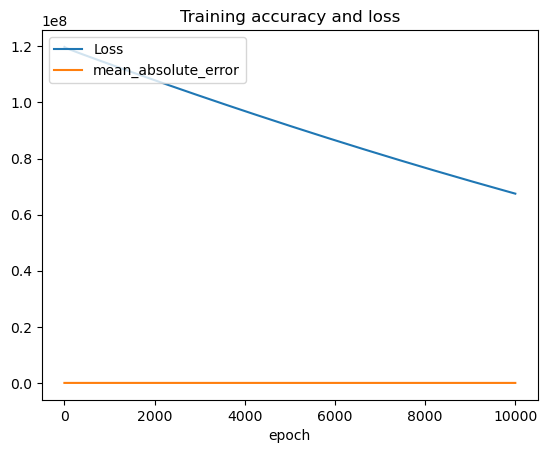

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Training accuracy and loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'mean_absolute_error'], loc='upper left')
plt.show()